# LendingClub - Case Study
### Team : 
   - Omkar Joshi           - joshi.omkaar@gmail.com     - +919592399547
   - Sameer Gadicherla - sameergadicherla@gmail.com - +918296492769
    
### Batch : <font color='Green'> 31st March 2021 </font>

In [1]:
## import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv("Data/loan.csv")
shape = df.shape
print("Shape of the dataset is: ", shape)
#getting sense of data values
df.head()

Shape of the dataset is:  (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- There are 111 columns in the given dataset

## 1. Data Cleaning

In [3]:
##find columns with 100% missing values
missing = 100*(df.isnull().sum()/df.shape[0]).to_frame()
missing = missing[missing[0]==100]
missing.shape

(54, 1)

In [4]:
## names of above 54 columns
list(missing.index)

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [5]:
#drop the above columns
df.drop(columns=list(missing.index),inplace=True)

In [6]:
#remaining columns
len(df.columns)

57

- We are now left with 57 columns after dropping 54 of columns with no data

In [7]:
## lets see the missing percentage values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.580507
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


In [8]:
#let's have a look at next_payment_date values
df.next_pymnt_d.describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

- since next_pymnt_d column is categorical column, we can replace nulls with mode i.e. Jun-16
- But it contains 97% of missing values. It is better to drop these columns. 

In [9]:
#let's have a look at mths_since_last_record values
df.mths_since_last_record.describe()


count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

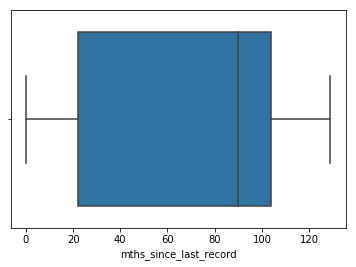

In [10]:
#let's check at outliers using boxplot
sns.boxplot(df.mths_since_last_record)


- we can see that there are no outliers. If nulls were to be replaced with representative value we could have gone with mean in this case.
- But column contains 92% of null values. It is better to drop them.

In [11]:
#lets look at distribution of values in mths_since_last_delinq
df.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

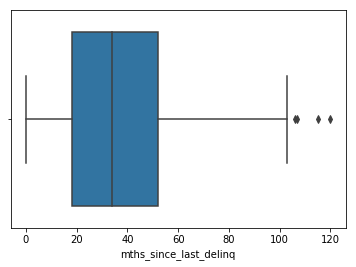

In [12]:
#lets check for outliers in mths_since_last_delinq through boxplot
sns.boxplot(df.mths_since_last_delinq)
plt.show()

- we can see that there are few outliers but mean and median are near to each other. We can replace nulls with either mean or median.
- But total nulls in the mths_since_last_delinq column constitute to 65%.It is better to drop it

In [13]:
#let's check emp_title column
df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

- we could have replaced nulls in emp_title with 'US Army' as it is most frequently occuring category.

In [14]:
#lets see top values for desc column
df.desc.describe()

count     26777
unique    26527
top            
freq        210
Name: desc, dtype: object

- we can see that desc column top values are blank and other values are only description related to loan. It cannot be analysed in EDA.
- So we better drop it

### Dropping below columns:
- Cannot predict **next_payment_date**, so it's better to **drop the column which has 97.129693% of missing data**
- **Months since last record**, this field has **92.985372% of missing data**. We do not know what NA means here. So dropping it.
- **mths_since_last_delinq** has **65% of missing data**, and this field isn't that relevant to work with only 35% available data.
- **desc**, its just description/reason for the loan.
- **emp_title** is not relevant here so dropping it

In [15]:
df.drop(columns=["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","mths_since_last_record","desc","emp_title"],inplace=True)

In [16]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195
title,0.027696
last_credit_pull_d,0.005036
total_rec_prncp,0.000000


In [17]:
#emp_length column has 2.7% missing data. Let's check at the values of employee's experiences 
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

- Since there is **no much difference in percentage between the emp_length values, we can consider nulls as separate value** and analyze them seperately.

In [18]:
## creating a new category for missing values of employment experience
df.emp_length.fillna("Not Available",inplace=True)

In [19]:
## bankruptcies vs loan_status to impute missing values, we assume if NA in pub_rec_bankruptcies then we will check 
## if the person has fully paid the loan or is paying we replace with 0, else drop, because though he is a defaulter he can still have 0 bankruptcies
temp = df.loc[:,["pub_rec_bankruptcies","loan_status"]]
temp.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [20]:
## checking the categories in missing bankrupties
temp[temp.pub_rec_bankruptcies.isnull()].loan_status.value_counts()

Fully Paid     579
Charged Off    118
Name: loan_status, dtype: int64

In [21]:
#lets check values in pub_rec_bankruptcies
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

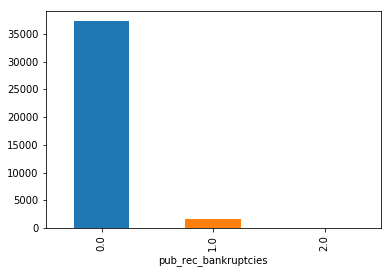

In [22]:
#Displaying pub_rec_bankruptcies values in a chart for better understanding
temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count().plot.bar()

In [23]:
## checking the number of fully paid people with respect to their bankruptcies
temp[(temp.pub_rec_bankruptcies == 1) | (temp.pub_rec_bankruptcies == 2)].loan_status.value_counts()

Fully Paid     1274
Charged Off     368
Current          39
Name: loan_status, dtype: int64

In [24]:
## can 0 be replaced for NAs if they have fully paid the loans? Get the count of majority
temp[(temp.pub_rec_bankruptcies == 0)].loan_status.value_counts()

Fully Paid     31097
Charged Off     5141
Current         1101
Name: loan_status, dtype: int64

- We will now **replace NAs where they have fully paid , with 0 bankrupties** as we saw above that majority of them with 0 bankrupties have paid their loans
- We will **drop the missing NAs in pub_rec_bankruptcies if they have been charged_off for their loans**. This is because, we dont want to deal with such data as there are no evident proofs to impute right values in pub_rec_bankruptcies.

In [25]:
## Replace/Drop based on above assumptions
def replace_na_pub_rec_bankruptcies(x,y):
    if np.isnan(y):
        if x == "Fully Paid":
            return 0
        else:
            return y
    else:
        return y


df_temp = df

##replace values
df_temp["pub_rec_bankruptcies"] = df_temp.apply(lambda x: replace_na_pub_rec_bankruptcies(x.loan_status,x.pub_rec_bankruptcies),axis=1)
print(df_temp.groupby("pub_rec_bankruptcies")["pub_rec_bankruptcies"].count())

##drop remaining
df_temp = df_temp[~df_temp.pub_rec_bankruptcies.isnull()]

df = df_temp


pub_rec_bankruptcies
0.0    37918
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [26]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
last_pymnt_d,0.179297
chargeoff_within_12_mths,0.128791
collections_12_mths_ex_med,0.128791
revol_util,0.126266
tax_liens,0.095962
title,0.027778
last_credit_pull_d,0.005051
total_rec_int,0.000000
total_acc,0.000000
initial_list_status,0.000000


In [27]:
#last_pymnt_d consists of .17% missing rows.Removing missing value row's will not loose much of the data.
#Removing all the rows with missing last payment due
df = df[~df.last_pymnt_d.isnull()]

In [28]:
##let's check types of values in chargeoff_within_12_mths 
df.chargeoff_within_12_mths.value_counts()

0.0    39477
Name: chargeoff_within_12_mths, dtype: int64

In [29]:
##let's check types of values in collections_12_mths_ex_med 
df.collections_12_mths_ex_med.value_counts()

0.0    39477
Name: collections_12_mths_ex_med, dtype: int64

In [30]:
#Dropping the above two column as it has only 0's 
df.drop(columns=["chargeoff_within_12_mths"],inplace=True)
df.drop(columns=["collections_12_mths_ex_med"],inplace=True)

In [31]:
#removing revol_util % to convert data to numeric values
temp = df[~df.revol_util.isnull()]
temp.revol_util = temp.revol_util.apply(lambda x: float(x[:-1]))


In [32]:
#let's understand revol_util column
temp.revol_util.describe()

count    39482.000000
mean        48.831837
std         28.330776
min          0.000000
25%         25.400000
50%         49.300000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

#### revol_util
- AS we see above that the **std is very high , we cannot replace the nulls with median**
- We can still replace the values with mean, but since **its just 0.1% data we can choose drop those rows**

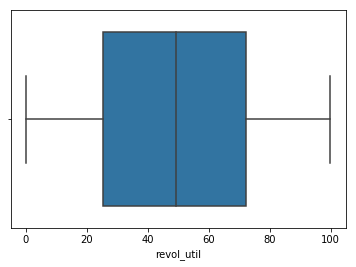

In [33]:
#plotting boxplot for revol_util column to display quartiles and understand data
sns.boxplot(temp.revol_util)

In [34]:
##remove missing rows of revol_util
df = df[~df.revol_util.isnull()]

In [35]:
#let's check for tax_liens values
df.tax_liens.value_counts()

0.0    39444
Name: tax_liens, dtype: int64

- **tax liens** has only **0's and NAs**, we can **drop** that column
- **Title** and **last_credit_pull_d** missing valued rows are **dropped as they are around 0.1% and 0.05%**

In [36]:
##drop tax_liens column
df.drop(columns=["tax_liens"],inplace=True)

## remove rows where title and last_credit_pull_d
df = df[~df.title.isnull()]
df = df[~df.last_credit_pull_d.isnull()]

In [37]:
## lets see the missing values within the left out columns
missing = (100* df.isnull().sum()/df.shape[0]).to_frame()
missing.sort_values(0,ascending=False)

,0
id,0.0
inq_last_6mths,0.0
pub_rec,0.0
revol_bal,0.0
revol_util,0.0
total_acc,0.0
initial_list_status,0.0
out_prncp,0.0
out_prncp_inv,0.0
total_pymnt,0.0


- we are now left with **0 null values** in any column

In [38]:
#checking no. of value_counts for column
df.initial_list_status.value_counts()

f    39469
Name: initial_list_status, dtype: int64

In [39]:
#checking no. of value_counts for policy_code column
df.policy_code.value_counts()

1    39469
Name: policy_code, dtype: int64

In [40]:
#checking no. of value_counts for application_type column
df.application_type.value_counts()

INDIVIDUAL    39469
Name: application_type, dtype: int64

In [41]:
#checking no. of value_counts for acc_now_delinq column
df.acc_now_delinq.value_counts()

0    39469
Name: acc_now_delinq, dtype: int64

In [42]:
#checking no. of value_counts for delinq_amnt column
df.delinq_amnt.value_counts()

0    39469
Name: delinq_amnt, dtype: int64

In [43]:
#checking no. of value_counts for pymnt_plan column
df.pymnt_plan.value_counts()

n    39469
Name: pymnt_plan, dtype: int64

In [44]:
#lets find out co-relation between out_prncp and out_prncp_inv columns
df[['out_prncp','out_prncp_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 99% positive co-relation. So we can drop any one column

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999827
out_prncp_inv,0.999827,1.000000


In [45]:
#lets find out co-relation between total_pymnt and total_pymnt_inv columns
df[['total_pymnt','total_pymnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 97% positive co-relation. So we can drop any one column



,total_pymnt,total_pymnt_inv
total_pymnt,1.000000,0.971624
total_pymnt_inv,0.971624,1.000000


In [46]:
#lets find out co-relation between funded_amnt and funded_amnt_inv columns
df[['funded_amnt','funded_amnt_inv']].corr(method='pearson')
#we can see that these two columns are highly co-related with 96% positive co-relation. So we can drop any one column

,funded_amnt,funded_amnt_inv
funded_amnt,1.000000,0.962914
funded_amnt_inv,0.962914,1.000000


#### list of columns to keep based on assumptions below
- id : loan_id
- pub_rec: We can analyze effect of loan status on derogatry public record.
- revol_bal: we can check credit effect on loan_defaulters
- revol_util: we can check whether deafulters behaviour toward credit utilization
- total_acc: we are expecting positive co-relation between defaulting and  total number of credit lines
- out_prncp : co-relation between out_prncp_inv and out_prncp is very high. So keeping out_prncp.
- total_pymnt : co-relation between total_pymnt_inv and total_pymnt is very high. So keeping total_pymnt.
- term : loans are given in two terms i.e. 3years or 5years. So, we can analyse effect of loan terms on defaulters
- int_rate : it is key factor in any loans purchase.
- installment : it is also key factor in any loan process
- total_rec_int : it is also key factor in any loan process
- total_rec_late_fee : it is also known key factor in any loan process
- last_pymnt_d : we can derive another column using issue_d and last_pymnt_d to get probable time period of defaulting 
- issue_d : important for above requirement
- open_acc : to check if credit lines are affecting default rate
- earliest_cr_line : We can find how quick a person is to default after he is given a credit line
- delinq_2yrs : We can see behaviour of a defaulter in the last two years over his alloted credit  
- loan_amnt: Main criteria to decide the defaulting rate
- grade: We can check the relation between level of loan given and the defaulting behaviour
- sub_grade: We can check the relation between subgrade of LC and the defaulting behaviour. And also which subgrades within a grade are more susciptable for defaulting
- emp_length : Will help in work experience v/s defaulting comparision
- home_ownership: The home ownership usually gives confidence to get a loan. Good metric for comparision
- annual_inc : Good metric to evaluate on this front.
- verification_status : income verification plays a key role in defaulting behaviour usually.
- loan_status: A kind of target variable for this EDA
- purpose: good metric to see the reason of loan and eventual defaulting behavior if any.
- state: origin state behaviour on defaulting can be checked
- dti - debt to income is a ratio if more , chances of defaulting are more. But we will indulge later based on data for this.
- pub_rec_bankruptcies: relation between this and defaulting is an intersting insight.

#### list of columns to drop
- inq_last_6mths : Since person's enquiry process is what we are not concerned about.
- initial_list_status : There is only one value in entire column.
- out_prncp_inv : co-relation between out_prncp_inv and out_prncp is very high. So dropping out_prncp_inv.
- total_pymnt_inv : co-relation between total_pymnt_inv and total_pymnt is very high. So dropping total_pymnt_inv
- funded_amnt : amount of loan amount committed when approved at that time, we are focussing more on what is approved.
- total_rec_prncp : its the difference of loan approved and outstanding principal. We are choosing out_prncp
- recoveries : since this is post loan application process, we are not concerned about it.
- collection_recovery_fee : this column values amount to recovery fees required for collection through third party agencies or any other means. So, we can ignore this column as it is post charge off process.
- last_pymnt_amnt: As this amount refers to last month's payment, no insight can be drawn from this column. It is better to drop it.
- last_credit_pull_d : This colum values are last month's credit line pulled for this loan. So, not much meaningful insight can be drawn from it.
- policy_code : There is only one value throught column. Hence we can drop it.
- application_type : There is only one value throught column. Hence we can drop it. 
- acc_now_delinq : There is only one value throught column. Hence we can drop it.
- delinq_amnt : There is only one value throught column. Hence we can drop it.
- member_id: we can eliminate, just keeping id is enough because both were unique
- funded_amnt_inv : co-relation between funded_amnt_inv and funded_amnt is very high. So dropping funded_amnt_inv
- pymnt_plan: There is only one value throught column. Hence we can drop it.
- url: We can remove this as its the url of the loan which looks like https://lendingclub.com/browse/loanDetail.action?loan_id=1077501 and we are anyways keeping the id column.
- title: we can ignore this column, as we are looking at purpose column. Going indepth for this column requires more processing like clustering etc..
- zip_code :  Doesn't have significant value to decide defaulter behaviour based on his origin place, doing on state level is better
 
    ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt","funded_amnt","total_rec_prncp"]

In [47]:
#dropping above listed columns
df = df.drop(columns = ["inq_last_6mths", "initial_list_status" , "out_prncp_inv" , "total_pymnt_inv" , "recoveries", "collection_recovery_fee" ,"last_pymnt_amnt", "last_credit_pull_d" , "policy_code" , "application_type","member_id","funded_amnt_inv","pymnt_plan","url","title","zip_code","acc_now_delinq","delinq_amnt","funded_amnt","total_rec_prncp"])

In [48]:
##Lets check the type of values in loan_status
df.loan_status.value_counts()

Fully Paid     32906
Charged Off     5423
Current         1140
Name: loan_status, dtype: int64

#### Since people who are currently paying will not add any insight on their defaulting behaviour, let's drop those rows
#### Since these values are just two and we are focussing more on defaulters, lets convert them to numeric categorical into 0's and 1's

In [49]:
#dropping current category in above columns based on above reasons.
df = df[df.loan_status!="Current"]

In [50]:
#converting loan_status categories to numerical values : 1- defaulter 0-fully paid
df.loan_status = df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

In [51]:
#lets find out shape after dropping above rows.
after_dropping = df.shape
after_dropping

(38329, 29)

In [52]:
#let's check how many rows and columns we dropped
print("Number of rows dropped: " + str(shape[0] - after_dropping[0]) + "(" + str((shape[0] - after_dropping[0])*100/shape[0]) + " %)")
print("Number of columns dropped: " + str(shape[1] - after_dropping[1]) + "(" + str((shape[1] - after_dropping[1])*100/shape[1]) + " %)")


Number of rows dropped: 1388(3.4947251806531208 %)
Number of columns dropped: 82(73.87387387387388 %)


In [53]:
## saving the cleaned data to a csv for faster reading in future
df.to_csv("Data/loan_cleaned.csv")
df = pd.read_csv("Data/loan_cleaned.csv",index_col=[0])

### Let's check the proportion of defaulters before comparing with any variable

In [54]:
## Checking loan_status variable
df.loan_status.describe()

count    38329.000000
mean         0.141486
std          0.348526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [55]:
##get percentage of loans which are defaulted
loan_status_perc = (100*(df.loan_status.value_counts())/df.shape[0]).to_frame()
loan_status_perc.reset_index(inplace=True)
loan_status_perc

,index,loan_status
0,0,85.851444
1,1,14.148556


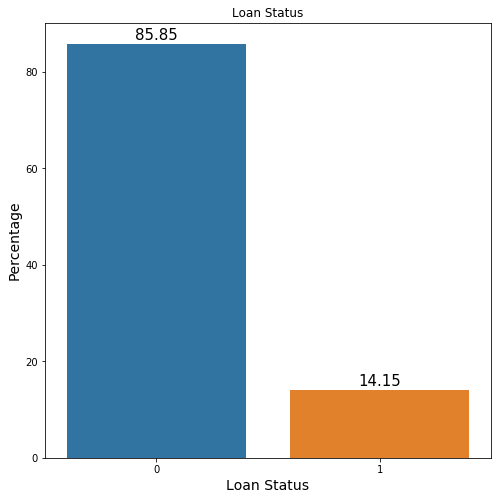

In [56]:
# Defining the plot size
plt.figure(figsize=(8,8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="index", y="loan_status", data=loan_status_perc)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Loan Status", size=14)
  
# Setting the label for y-axis
plt.ylabel("Percentage", size=14)
  
# Setting the title for the graph
plt.title("Loan Status")
  
# Fianlly showing the plot
plt.show()

- There are 14.15 percent of defaulters amongst all of them

# 2. UniVariate Analysis

In [57]:
#gets plot with percentage count for defaulter and non-defaulter loan status against other columns
def plot_loan_default_nondefault_percentage_univariate(dataframe,variable1=None,variable2=None,figsize=(20,10),
                                           plottype="barplot",xlabel="Xlabel",xlabel_size=18,
                                           ylabel="Ylabel",ylabel_size=18,plot_title="Plot Title",
                                           plot_title_size=20,perc_fontsize=10,n_categories=2,show_count_label= False):
    
    ''' 
        dataframe        : data 
        variable1        : main category
        variable2        : sub/other category 
        plottype         : countplot -> if looking for countplotplot under each subcategory within a category
        figsize          : tuple (x,y) with plot size
        xlabel           : xlabel of the plot
        xlabel_size      : fontsize of xlabel
        ylabel           : ylabel of the plot
        ylabel_size      : fontsize of ylabel
        plot_title       : Title of the graph
        plot_title_size  : fontsize of the plot_title
        perc_fontsize    : size of the percentage labels on each bar
        show_count_label : show counts with percentage 

    '''

    # Defining the plot size
    plt.figure(figsize=figsize)

    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    if plottype == "countplot":
        plots = sns.countplot(data = dataframe, x = variable1,hue = variable2)
        # Iterrating over the bars one-by-one
        bar_lengths = []
        for bar in plots.patches:
            bar_lengths.append(bar.get_height())

        bars_0 = bar_lengths[0:n_categories]
        bars_1 = bar_lengths[n_categories:]
        # print(bars_0,bars_1)
        for i,bar in enumerate(plots.patches):
        #     print(bar.get_height())
            if i<n_categories:
                perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
            else:
                perc = 100*(bar.get_height()/(bars_0[i-n_categories]+bars_1[i-n_categories]))

            if show_count_label:   
                plots.annotate(str(format(bar.get_height(),'.0f'))+'  ('+str(format(perc, '.2f'))+"%)", 
                               (bar.get_x() + bar.get_width() / 2, 
                                bar.get_height()), ha='center', va='center',
                               size=perc_fontsize, xytext=(0, 8),
                               textcoords='offset points')
            else:
                plots.annotate(str(format(perc, '.2f'))+"%", 
                               (bar.get_x() + bar.get_width() / 2, 
                                bar.get_height()), ha='center', va='center',
                               size=perc_fontsize, xytext=(0, 8),

                               textcoords='offset points')

        
    elif plottype == "barplot":
        plots=sns.barplot(data=dataframe,x=variable1,y=variable2)
        # Iterrating over the bars one-by-one
        for bar in plots.patches:
            plots.annotate(str(format(bar.get_height(), '.2f'))+"%", 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')


        
    # Setting the label for x-axis
    plt.xlabel(xlabel, size=xlabel_size)

    # Setting the label for y-axis
    plt.ylabel(ylabel, size=ylabel_size)

    # Setting the title for the graph
    plt.title(plot_title , size = plot_title_size)

    # Fianlly showing the plot
    plt.show()



In [58]:
## Let us define a function which will return defaulting percentages for given category variable1
def defaulting_percentages_univariate(variable1):
    x = pd.DataFrame(df.groupby(by=[variable1])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(df.groupby(by=[variable1])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values(by='def_perc')
    return z



## Let us define a function which will return a minimum and maximum differencef with defaulting percentages for given category variable1
def defaulting_range_univariate(variable1):
    x = pd.DataFrame(df.groupby(by=[variable1])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(df.groupby(by=[variable1])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values(by='def_perc')
    diff=z.def_perc.iloc[-1]-z.def_perc.iloc[0]
    return diff

## defining a map of all the key factors with their range of defaulting variation
default_map = {}

### 1) loan_amnt

In [59]:
#check datatype
df.loan_amnt.dtype

dtype('int64')

In [60]:
#let's find out distribution of loan_amnt column
df.loan_amnt.describe()

count    38329.000000
mean     11055.722169
std       7346.652882
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

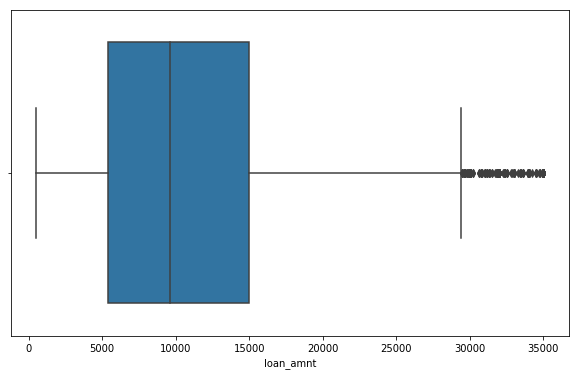

In [61]:
## draw a box  plot of loan_amount
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = "loan_amnt")

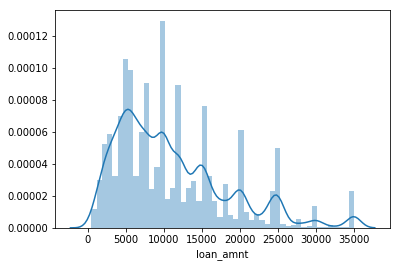

In [62]:
#checking histogram to get some insights
sns.distplot(df.loan_amnt)

- **median loan_amount is 9600**. Choosing this because of outliers
- std deviation doesn't matter, because loan amounts differ based on requirements. 
- Most of the loans are **ranging in between 5300 to 15000**
- Its left skewed as post **15000** the **number of loans is decreasing and the max value is 35000**

#### Let's bucket the borrowers into 7 buckets from 0-35000 amount and check the defaulters

In [63]:
#dividing loan_amnt into 7 buckets
df['loan_amnt_bucket'] = df.loan_amnt.apply(lambda x: (x//5000)+1 if (x%5000) > 0 else (x//5000))

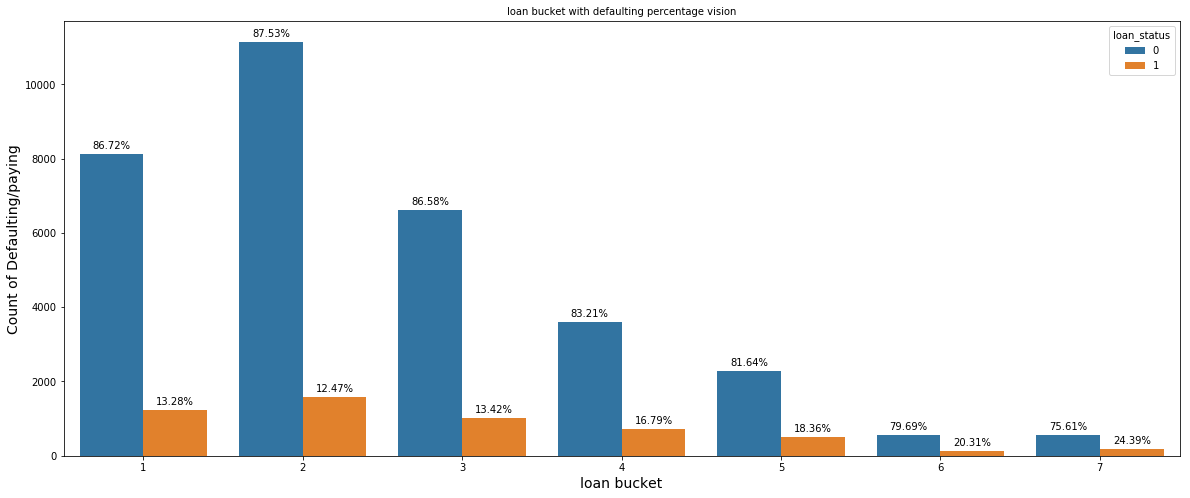

Difference between min and max defaulting percentages = 11.92


In [64]:
## lets plot the number of defaulters and non-defaulters in each bucket of loan-amount
plot_loan_default_nondefault_percentage_univariate(df,"loan_amnt_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="loan bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="loan bucket with defaulting percentage vision",
                                           plot_title_size=10,perc_fontsize=10,n_categories=7,show_count_label=False)
default_map["loan_amnt_bucket"] = round(defaulting_range_univariate("loan_amnt_bucket"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("loan_amnt_bucket"),2))

- **Above 15,000** i.e., from bucket 4 we see that **defualting rate is increasing**.
- in the buckets **0-5k , 5-10k and 10-15k** we see **similar defaulting rate around 13%**
- difference between **min and max defaulting rates** is pretty high with **11.10%**.
### We can infere here that , if the loan amounts are high, defaulting rate is increasing and paying fully is decreasing.

### 2) annual_inc

In [65]:
#taking describe to understand the data better
df.annual_inc.describe()

count    3.832900e+04
mean     6.884397e+04
std      6.426461e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [66]:
#finding upper and lower extremes of the values
q1=df.annual_inc.quantile(.25)
q3=df.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value =",upper_extreme)
print("lower extreme value =",lower_extreme)

upper extreme value = 145000.0
lower extreme value = 0


- since there are **no outliers on the lower side** we can **focus** on the **outliers above upper extreme**.
- **mean and standard deviation** are very **near** to each other. It signifies there are **lot of outliers on the upper side** as seen above.

In [67]:
## lets focus on defaulter and non-defaulters separately
def_inc = df[df.loan_status == 1]
ndef_inc = df[df.loan_status == 0]

In [68]:
#describe defaulters
def_inc.annual_inc.describe().to_frame()

,annual_inc
count,5.423000e+03
mean,6.252366e+04
std,4.756885e+04
min,4.080000e+03
25%,3.744000e+04
50%,5.300000e+04
75%,7.500000e+04
max,1.250000e+06


In [69]:
##describe non_defaulters
ndef_inc.annual_inc.describe().to_frame()

,annual_inc
count,3.290600e+04
mean,6.988558e+04
std,6.655870e+04
min,4.000000e+03
25%,4.130000e+04
50%,6.000000e+04
75%,8.400000e+04
max,6.000000e+06


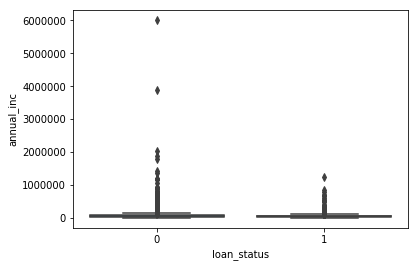

In [70]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="annual_inc")

- **Above 12,50000 we don't see any borrowers defaulting when seen at the box plot of 0 and 1**

In [71]:
## lets check non-defaulter iqr and upper and lower limits
q1=ndef_inc.annual_inc.quantile(.25)
q3=ndef_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value for non-defaulters=",upper_extreme)
print("lower extreme value for non-defaulters=",lower_extreme)

upper extreme value for non-defaulters= 148050.0
lower extreme value for non-defaulters= 0


In [72]:
## lets check non-defaulter iqr and upper and lower limits
q1=def_inc.annual_inc.quantile(.25)
q3=def_inc.annual_inc.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value for defaulters=",upper_extreme)
print("lower extreme value for defaulters=",lower_extreme)

upper extreme value for defaulters= 131340.0
lower extreme value for defaulters= 0


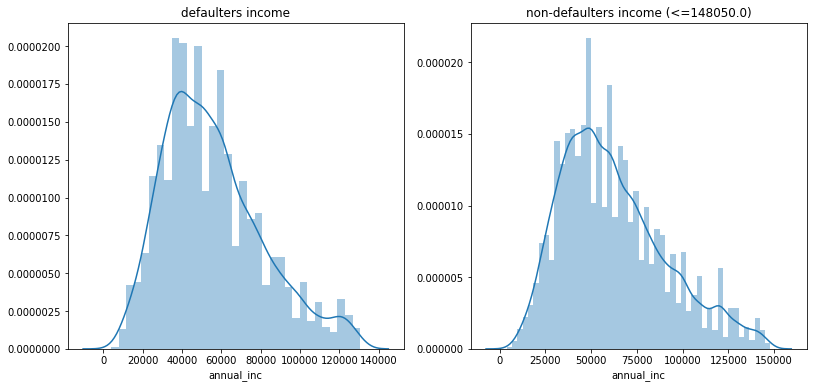

In [73]:
#plot the income within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters income")
ax[1].title.set_text("non-defaulters income (<=148050.0)")
sns.distplot(def_inc[def_inc.annual_inc<=131340.0].annual_inc,ax=ax[0])
sns.distplot(ndef_inc[ndef_inc.annual_inc<=148050].annual_inc,ax=ax[1])
fig.show()

- We see similar normal distribution for both the types within 3 standard devialtions data(till upper whisker length)
- Both of them have salaries ranging below 150000 itself. 

### Lets bucket the salaries on the main dataframe itself and check the defaulting percentages
    - Let'split into six buckets of 50000 difference till 150000
           - 1 -> 0-25000
           - 2 -> 25001 - 50000
           - 3 -> 50001 - 75000
           - 4 -> 75001-100000
           - 5 -> 100001 - 125000
           - 6 -> 125001 - 150000
           - 7 -> >150000

In [74]:
#code for dividing annual_inc into 7 buckets
def income_buckets(x):
    if x> 150000:
        return 7
    else:
        if (x%25000) > 0:
            return (x//25000)+1
        else:
            return x//25000
df['income_bucket'] = df.annual_inc.apply(lambda x:  income_buckets(x))

In [75]:
#checking value counts of buckets
df.income_bucket.value_counts().to_frame()

,income_bucket
2.0,12750
3.0,11607
4.0,6010
5.0,2682
1.0,2504
7.0,1482
6.0,1294


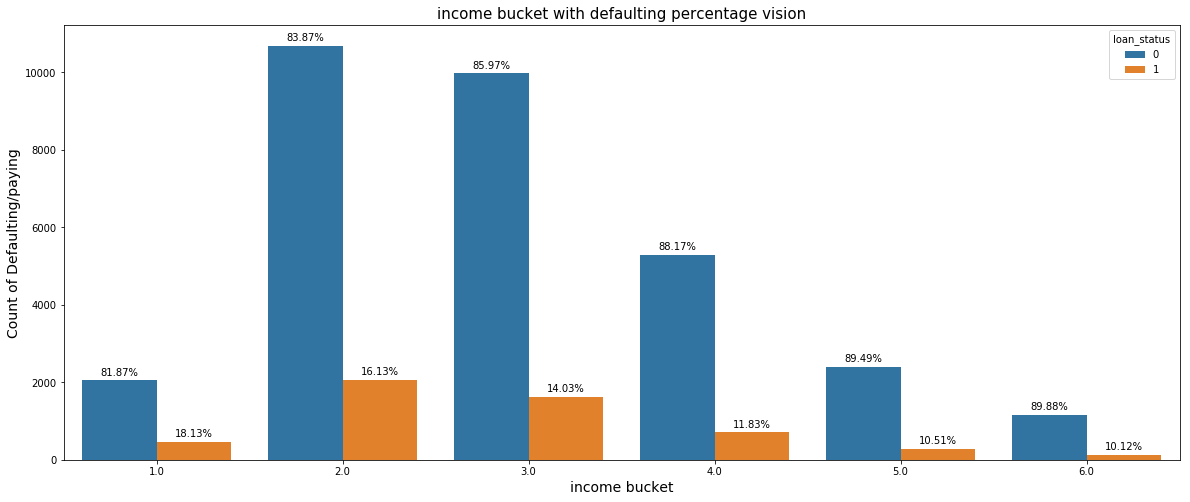

Difference between min and max defaulting percentages = 8.01


In [76]:
## lets plot the number of defaulters and non-defaulters in each bucket of income until 1500000
plot_loan_default_nondefault_percentage_univariate(df[df.annual_inc<=150000],"income_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="income bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="income bucket with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=6,show_count_label=False)

default_map["income_bucket"] = round(defaulting_range_univariate("income_bucket"),2)
print("Difference between min and max defaulting percentages =",abs(round(defaulting_range_univariate("income_bucket"),2)))

- we can see that difference between **min and max defaulting percentages is 8.01**. 
#### We can observe above that defaulting rate decreases as the income increases. The number went down from 18.13% to 10.12% accross 6 buckets of annual income til 150000. 

### 3) int_rate

In [77]:
##check the type of value for int_rate
df.dtypes['int_rate']

dtype('O')

In [78]:
##convert to float
df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]))

In [79]:
##check the stats 
df.int_rate.describe()

count    38329.000000
mean        11.924646
std          3.694249
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

- We see that **mean rate** is around **12%** 
- We see more of a near to **normal distribution of rates** , which might be based on other factors like reason, amount_loan,policy of company etc..
- **Most of the loans in IQR are between 8.9% - 14.4%** which is generally seen in most of the real life loans.

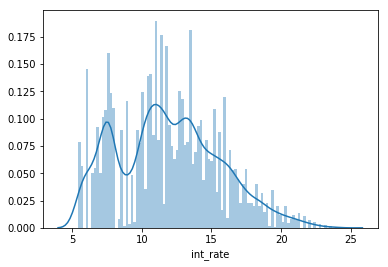

In [80]:
##lets check how is it spread accross loans
sns.distplot(df.int_rate,bins=100)

- As we saw we see more density from 9 - 14 around

In [81]:
## lets focus on defaulter and non-defaulters separately
def_df = df[df.loan_status == 1]
ndef_df = df[df.loan_status == 0]

In [82]:
##spread of int_rate accross defaulters
def_df.int_rate.describe().to_frame()

,int_rate
count,5423.000000
mean,13.861169
std,3.674305
min,5.420000
25%,11.360000
50%,13.610000
75%,16.450000
max,24.400000


In [83]:
##spread of int_rate accross non-defaulters
ndef_df.int_rate.describe().to_frame()

,int_rate
count,32906.000000
mean,11.605501
std,3.598917
min,5.420000
25%,8.490000
50%,11.490000
75%,13.990000
max,24.110000


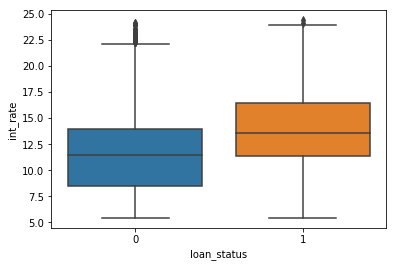

In [84]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="int_rate")

- **Defaulters** have **higher interest rates with 13.5** and **non-defaulters having 11.5% median** in the data

In [85]:
#let's bin interest rates and check if we can get better insight
df.int_rate.describe()

count    38329.000000
mean        11.924646
std          3.694249
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

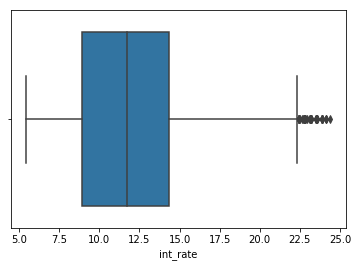

In [86]:
#let's check at boxplot to find binsize
sns.boxplot(df.int_rate)

### we can divide int_rates into 3 bins. 
    - Low -> 0-10% 
    - Normal -> 10-15%
    - High > 15%
 We are doing this wy based on the box plot above we can see the normal range is around 10-15


In [87]:
## lets create a new column called int_rate bucket based on the above cutoffs

def int_bucket_func(x):
    if x < 10 :
        return "Low"
    elif x>=10 and x<=15:
        return "Normal"
    else:
        return "High"
df["interest_bucket"] = df.int_rate.apply(lambda x: int_bucket_func(x))

In [88]:
df.interest_bucket.value_counts()

Normal    18360
Low       12031
High       7938
Name: interest_bucket, dtype: int64

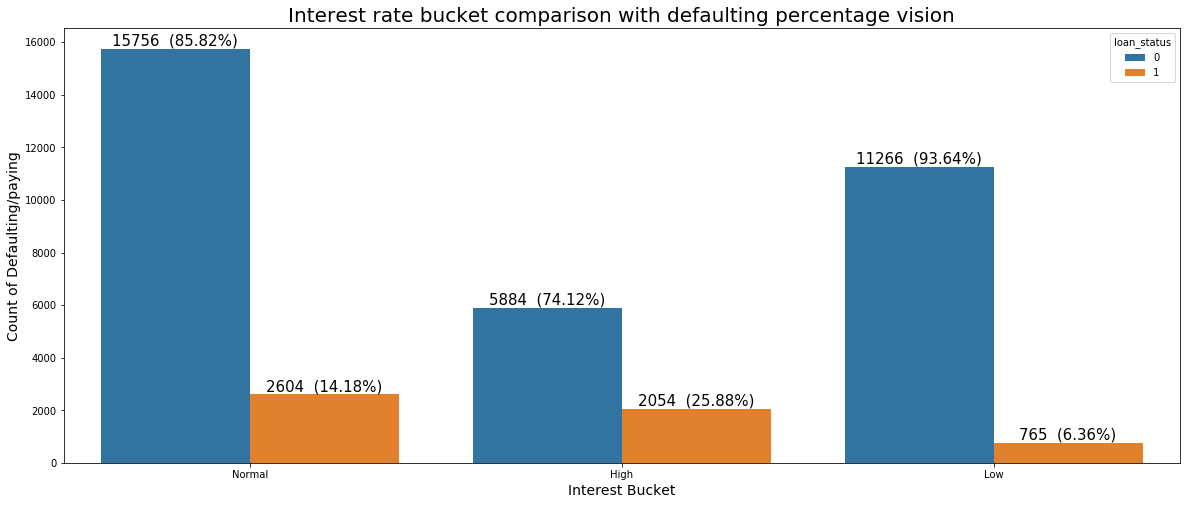

Difference between min and max defaulting percentages = 19.52


In [89]:
## lets plot the number of defaulters and non-defaulters in each type of interest rate
plot_loan_default_nondefault_percentage_univariate(df,"interest_bucket","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="Interest Bucket",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Interest rate bucket comparison with defaulting percentage vision",
                                           plot_title_size=20,perc_fontsize=15,n_categories=3,show_count_label=True)
default_map["interest_bucket"] = round(defaulting_range_univariate("interest_bucket"),2)
print("Difference between min and max defaulting percentages =",abs(round(defaulting_range_univariate("interest_bucket"),2)))

- Now we can clearly see that defaulting percentage **increases** a lot from one bucket to the other bucket of interest rate
- - we can see that difference between **min and max defaulting percentages is 19.52%**.

### 4) term 

In [90]:
# types of tenures
tenure = df.term.value_counts().to_frame()
tenure

,term
36 months,28872
60 months,9457


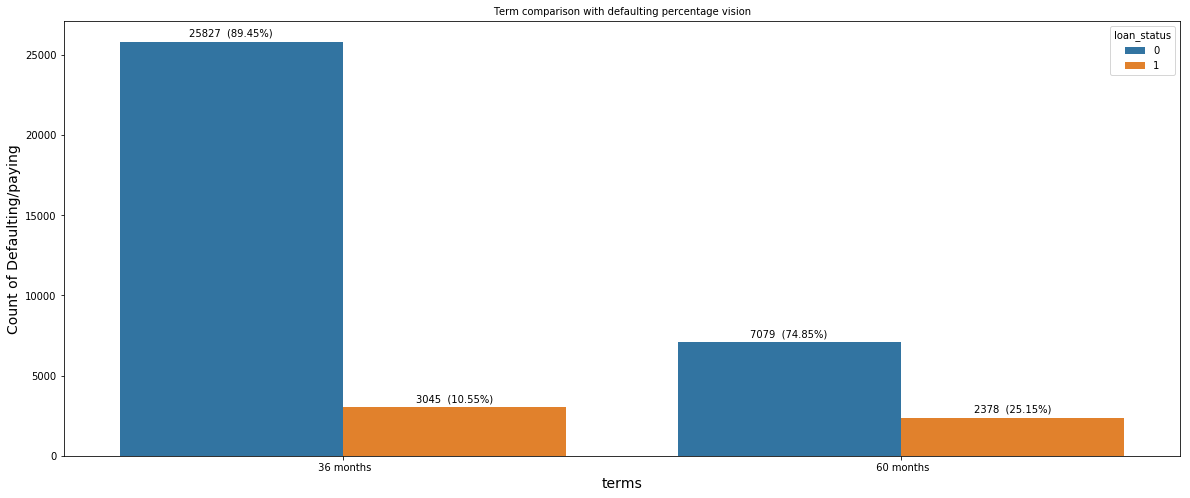

Difference between min and max defaulting percentages = 14.6


In [91]:
## lets plot the number of defaulters and non-defaulters in each type of term
plot_loan_default_nondefault_percentage_univariate(df,"term","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="terms",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Term comparison with defaulting percentage vision",
                                           plot_title_size=10,perc_fontsize=10,n_categories=2,show_count_label=True)
default_map["term"] = round(defaulting_range_univariate("term"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("term"),2))

- we observe based on above plot, that **defaulting rate has increased around 14.35% from 10.55 to 25.15 when the term changed from 3years to 5years.** 
- **Giving loans for lesser tenure sounds better!**

### 5) Installment

In [92]:
#describing the installment column
df.installment.describe()

count    38329.000000
mean       322.547583
std        208.421669
min         15.690000
25%        165.820000
50%        278.070000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

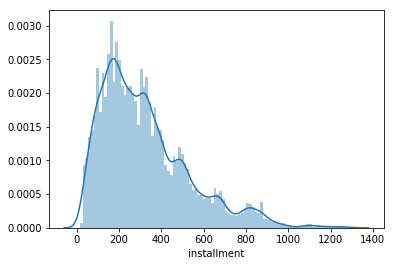

In [93]:
#lets take histogram to know behaviour of installment
sns.distplot(df.installment,bins=100)
plt.show()

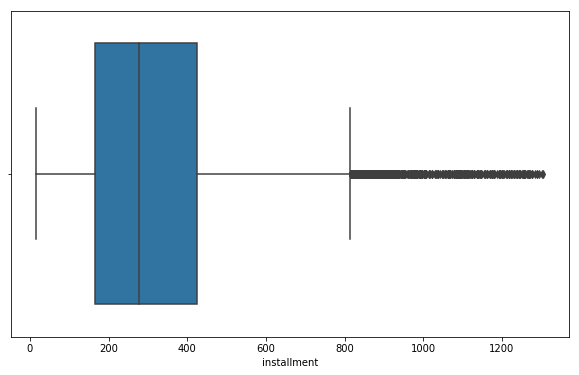

In [94]:
#There is lot of difference between 3rd quartile and max value. 
#Lets see outliers in the installment column through boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = "installment")
plt.show()

- it contains lot of outliers above upper whisker. It might be due to the people with higher salary taking higher loans
- IQR range is very less

In [95]:
##spread of installments accross defaulters
def_df.installment.describe().to_frame()

,installment
count,5423.000000
mean,336.001073
std,215.821954
min,22.790000
25%,169.720000
50%,294.370000
75%,456.195000
max,1305.190000


In [96]:
##spread of installments accross non-defaulters
ndef_df.installment.describe().to_frame()

,installment
count,32906.00000
mean,320.33041
std,207.09622
min,15.69000
25%,165.38000
50%,275.80500
75%,421.15000
max,1295.21000


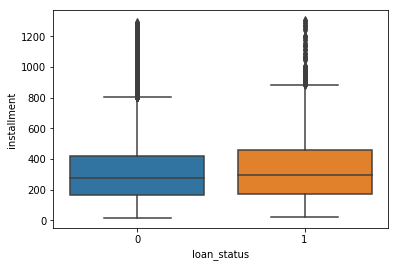

In [97]:
##checking outliers
sns.boxplot(data = df, x = "loan_status", y="installment")

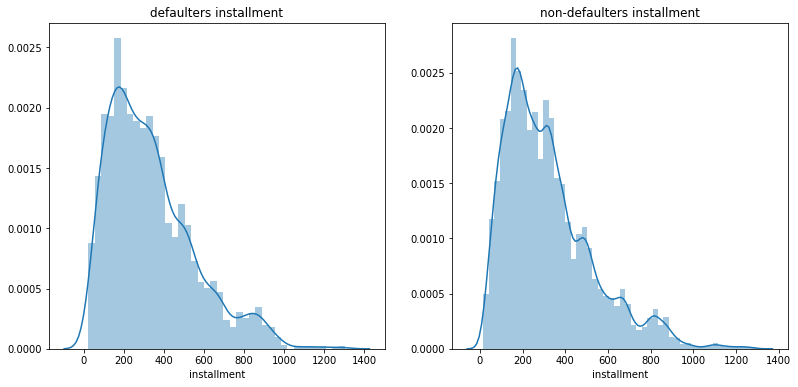

In [98]:
#plot the income within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters installment")
ax[1].title.set_text("non-defaulters installment")
sns.distplot(def_df.installment,ax=ax[0])
sns.distplot(ndef_df.installment,ax=ax[1])
fig.show()

In [99]:
## lets check defaulter iqr and upper and lower limits
q1=def_df.installment.quantile(.25)
q3=def_df.installment.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value of installment for defaulters=",upper_extreme)
print("lower extreme value of installment for defaulters=",lower_extreme)

upper extreme value of installment for defaulters= 885.9075
lower extreme value of installment for defaulters= 0


In [100]:
## lets check non-defaulter iqr and upper and lower limits
q1=ndef_df.installment.quantile(.25)
q3=ndef_df.installment.quantile(.75)
iqr=q3-q1
upper_extreme=q3+1.5*(iqr)
lower_extreme=max(q1-1.5*(iqr),0)
print("upper extreme value of installment for non-defaulters=",upper_extreme)
print("lower extreme value of installment for non-defaulters=",lower_extreme)

upper extreme value of installment for non-defaulters= 804.805
lower extreme value of installment for non-defaulters= 0


- **Installments are similar to both the categories** as its obvious that they will receive installements based on the loan amount approved.
- **Both def and non-def have significant outliers** due to high std.dev
- **no significant difference in IQR** as well for these both
- Similar behaviour to that of loan_amnt as installment is dependent on loan amnt and interest rate

### 6) verification_status 

In [101]:
#desribing total_pymnt column
df.verification_status .value_counts()

Not Verified       16505
Verified           12175
Source Verified     9649
Name: verification_status, dtype: int64

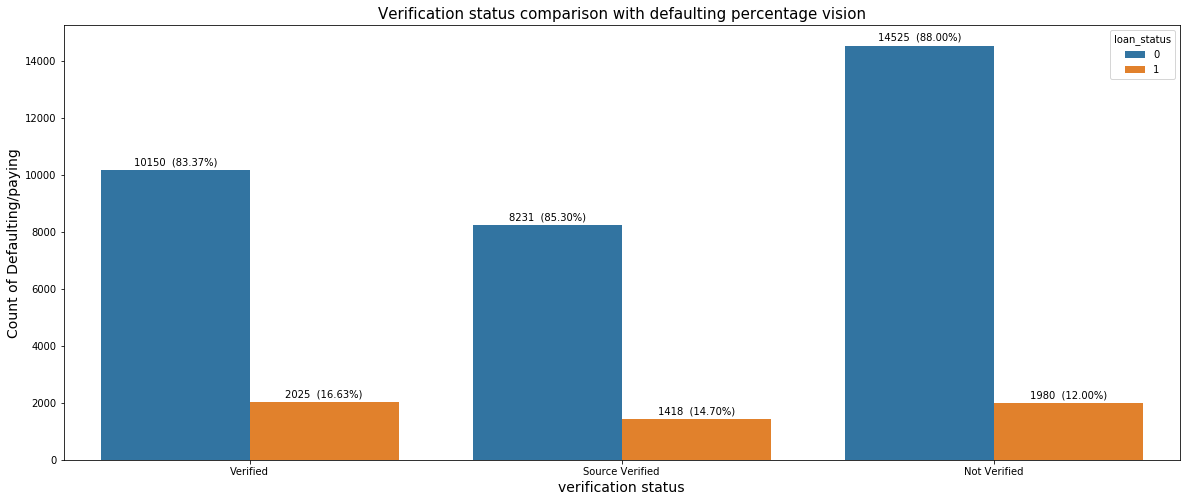

Difference between min and max defaulting percentages = 4.64


In [102]:
## lets plot the number of defaulters and non-defaulters based on verification status
plot_loan_default_nondefault_percentage_univariate(df,"verification_status","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="verification status",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Verification status comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=3,show_count_label=True)

default_map["verification_status"] = round(defaulting_range_univariate("verification_status"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("verification_status"),2))

In [103]:
## lets check the types of verification_status for defaulters category
verification_status = def_df.verification_status.value_counts().to_frame()
verification_status.reset_index(inplace=True)
verification_status = verification_status.rename(columns={'index':'verification_status','verification_status':'count'})
verification_status

,verification_status,count
0,Verified,2025
1,Not Verified,1980
2,Source Verified,1418


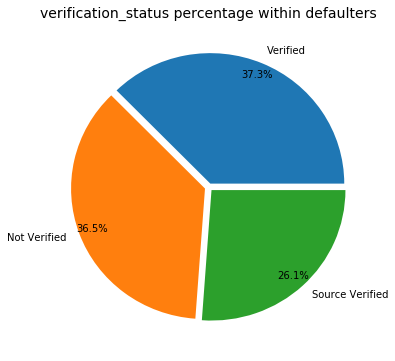

In [104]:
#lets draw a pie chart to get the percentage proportions for defaulters among verification_status
pie, ax = plt.subplots(figsize=[6,6])
labels = list(verification_status.verification_status)
# print(labels)
plt.pie(x=verification_status['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("verification_status percentage within defaulters", fontsize=14);
pie.savefig("verification_statusepie.png")

- Based on data we see that **non-verified loans end up getting less defaulted than verified and source verified**
- Even **within only defaulters verified and non-verified are very close**.

### 7) grade

In [105]:
## let's look at the type of grades in whole df
df.grade.value_counts()

B    11626
A    10031
C     7760
D     5020
E     2634
F      963
G      295
Name: grade, dtype: int64

In [106]:
#let's check the percentage wise distribution of grades
perc_df=100*(df.grade.value_counts()/shape[0]).to_frame()
perc_df.reset_index(inplace=True)
perc_df

,index,grade
0,B,29.272100
1,A,25.256188
2,C,19.538233
3,D,12.639424
4,E,6.631921
5,F,2.424654
6,G,0.742755


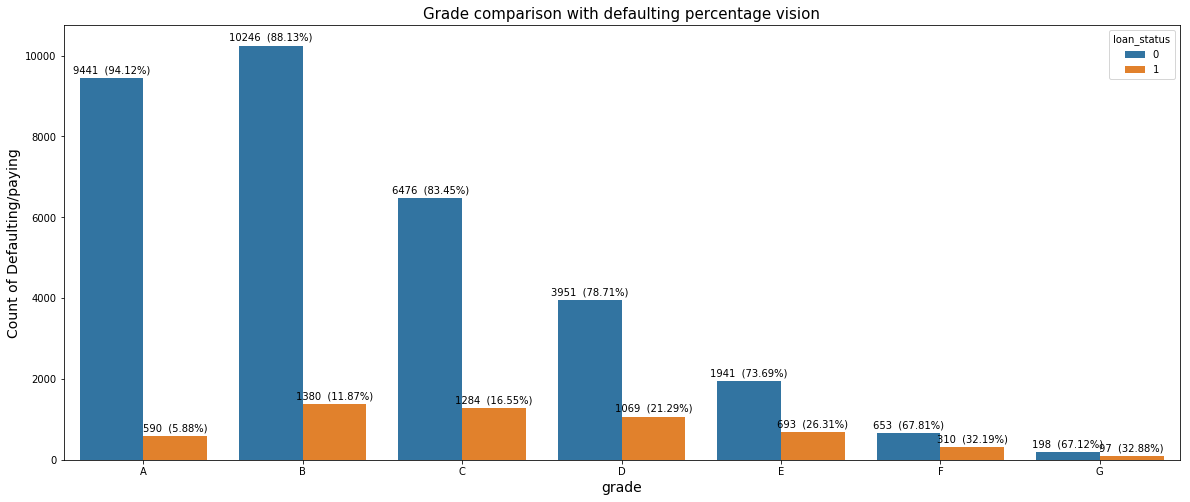

Difference between min and max defaulting percentages = 27.0


In [107]:
## lets plot the number of defaulters and non-defaulters based on grade
plot_loan_default_nondefault_percentage_univariate(df.sort_values("grade"),"grade","loan_status",figsize=(20,8),
                                           plottype="countplot",xlabel="grade",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="Grade comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=7,show_count_label=True)
default_map["grade"] = round(defaulting_range_univariate("grade"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("grade"),2))

- Looking at the Grades 
    - We can see that **A type loan has very less defaulting rate of 5.8%**
    - As we go from **A to G , the defaulting rate is decreasing**

In [108]:
## lets check the types of grades for defaulters category only
grades = def_df.grade.value_counts().to_frame()
grades.reset_index(inplace=True)
grades = grades.rename(columns={'index':'grades','grade':'count'})
grades

,grades,count
0,B,1380
1,C,1284
2,D,1069
3,E,693
4,A,590
5,F,310
6,G,97


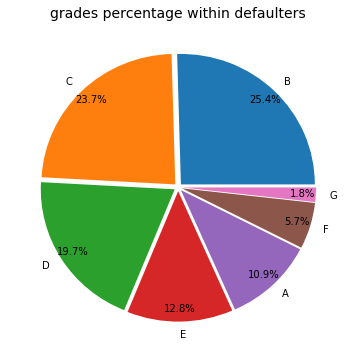

In [109]:
#lets draw a pie chart to get the percentage proportions for defaulters among grades
pie, ax = plt.subplots(figsize=[6,6])
labels = list(grades.grades)
# print(labels)
plt.pie(x=grades['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("grades percentage within defaulters", fontsize=14);
pie.savefig("gradespie.png")

- When looked only at defaulters , **there are less defaulters in G and highest in B**

### 8) subgrade

In [110]:
## types of subgrades
df.sub_grade.value_counts()

A4    2872
B3    2820
A5    2710
B5    2605
B4    2422
C1    2039
B2    1990
C2    1912
A3    1805
B1    1789
A2    1506
C3    1474
D2    1270
C4    1195
C5    1140
A1    1138
D3    1104
D1     916
D4     905
D5     825
E1     719
E2     604
E3     509
E4     421
E5     381
F1     302
F2     230
F3     172
F4     148
F5     111
G1      91
G2      76
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

- We see that every grade has 5 subgrades with a suffix from 1-5

,sub_grade,def_perc,ndef_perc
0,A1,2.636204,97.363796
1,A2,4.780876,95.219124
2,A3,5.484765,94.515235
3,A4,6.162953,93.837047
4,A5,7.822878,92.177122


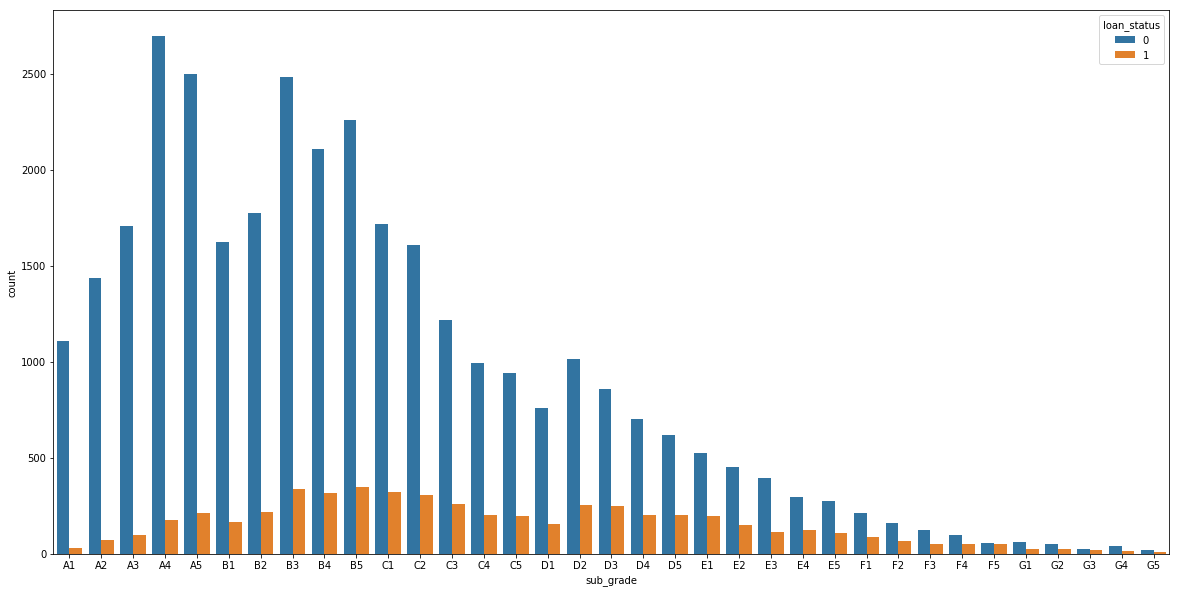

In [111]:
## lets plot the barplot of defaulters and non-defaulters based on sub_grade
plt.figure(figsize=(20,10))
plots=sns.countplot(x="sub_grade", hue="loan_status",data=df.sort_values("sub_grade"))
# Iterrating over the bars one-by-one
bar_lengths = []
for bar in plots.patches:
    bar_lengths.append(bar.get_height())
# print(bar_lengths)
n_buckets = 35
bars_0 = bar_lengths[0:n_buckets]
bars_1 = bar_lengths[n_buckets:]

percentages = []
# print(bars_0,bars_1)
for i,bar in enumerate(plots.patches):
#     print(bar.get_height())
    if i<n_buckets:
        perc = 100*(bar.get_height()/(bars_0[i]+bars_1[i]))
    else:
        perc = 100*(bar.get_height()/(bars_0[i-n_buckets]+bars_1[i-n_buckets]))
    percentages.append(perc) ##append to percentage list

def_perc = percentages[35:]
sg_names = sorted(df.sub_grade.unique())
ndef_perc  = percentages[0:35]
new_df = pd.DataFrame({'sub_grade':sg_names,'def_perc':def_perc,'ndef_perc':ndef_perc})
new_df.head()

### Based on barplot its tough to understand the pattern in each subgrade of a grade, lets plot the percentages separately.
#### 1) Using the above code we have saved the percentages into a separate list for defaulters and non-defaulters grouped by sub_grade

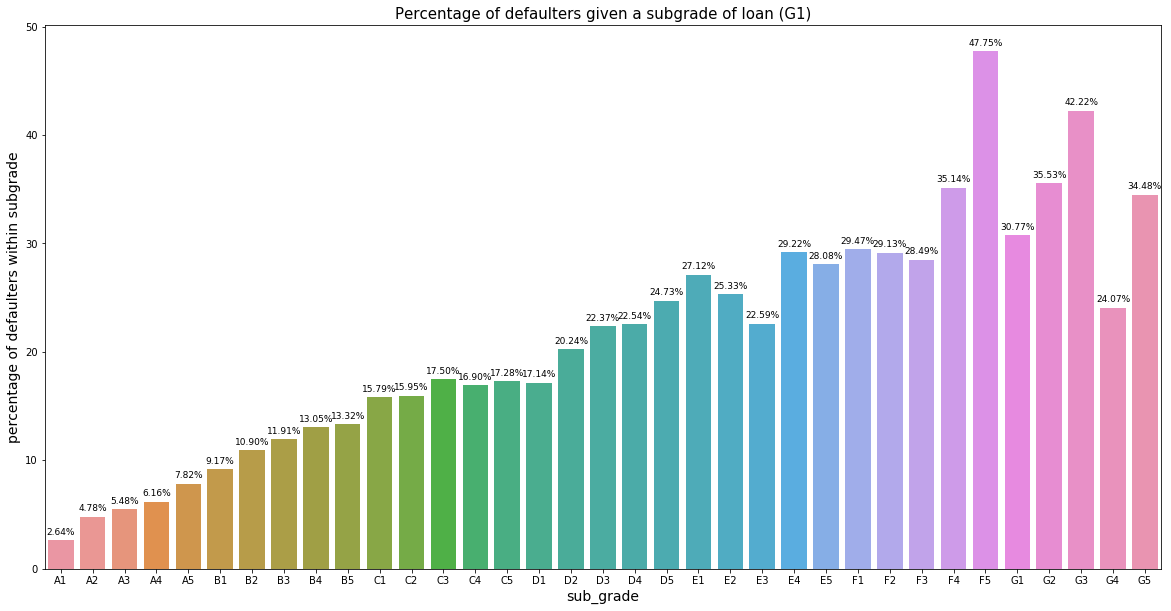

Difference between min and max defaulting percentages = 45.11


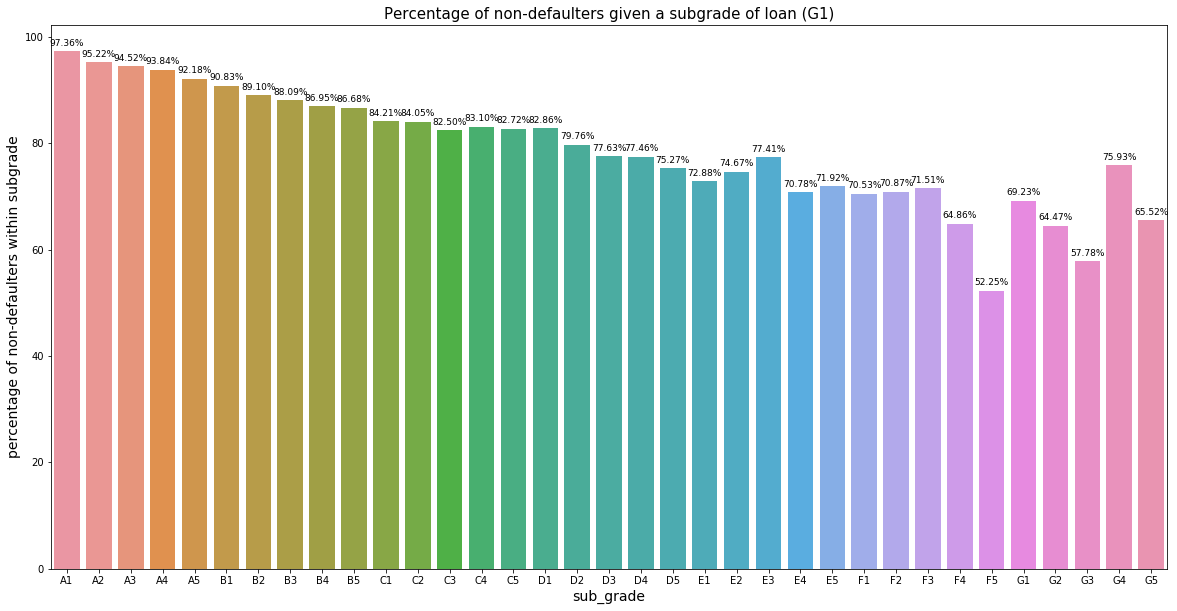

In [112]:
# ploting the bar chart with count will give us more insight on which sub_grade is high amongst all
plot_loan_default_nondefault_percentage_univariate(new_df,"sub_grade","def_perc",figsize=(20,10),
                                           plottype="barplot",xlabel="sub_grade",xlabel_size=14,
                                           ylabel="percentage of defaulters within subgrade",ylabel_size=14,
                                           plot_title="Percentage of defaulters given a subgrade of loan (G1)",
                                           plot_title_size=15,perc_fontsize=9,n_categories=6,show_count_label=False)\
#storing variation in the defaulter map
default_map["sub_grade"] = round(defaulting_range_univariate("sub_grade"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("sub_grade"),2))
plot_loan_default_nondefault_percentage_univariate(new_df,"sub_grade","ndef_perc",figsize=(20,10),
                                           plottype="barplot",xlabel="sub_grade",xlabel_size=14,
                                           ylabel="percentage of non-defaulters within subgrade",ylabel_size=14,
                                           plot_title="Percentage of non-defaulters given a subgrade of loan (G1)",
                                           plot_title_size=15,perc_fontsize=9,n_categories=6,show_count_label=False)


- Lets interpret the above graphs**(G1 and G2)** like this. For example if a borrower chooses A1 as his loan sub_grade, then there is 2.64% chances of him defaulting and 97.36% paying the whole loan. **Bar1 in G1 + Bar2 in G2 = 100%**
- Observations
    - We see that **sub grades in F and G have high default rates above 25%**
    - **F5** records the **highest default rate** in all of the sub grades
    - **all the subgrades in A are having very less default rates**

### 9) home_ownership

In [113]:
#lets look at value distribution accroess different categories
df.home_ownership.value_counts()

RENT        18335
MORTGAGE    16946
OWN          2949
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

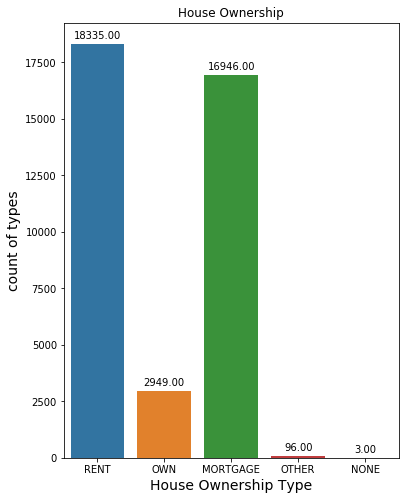

In [114]:
# lets look at data distribution of home_ownership
plt.figure(figsize=(6,8))
plots=sns.countplot(data=df,x='home_ownership')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("House Ownership Type", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of types", size=14)
  
# Setting the title for the graph
plt.title("House Ownership")
  
# Fianlly showing the plot
plt.show()

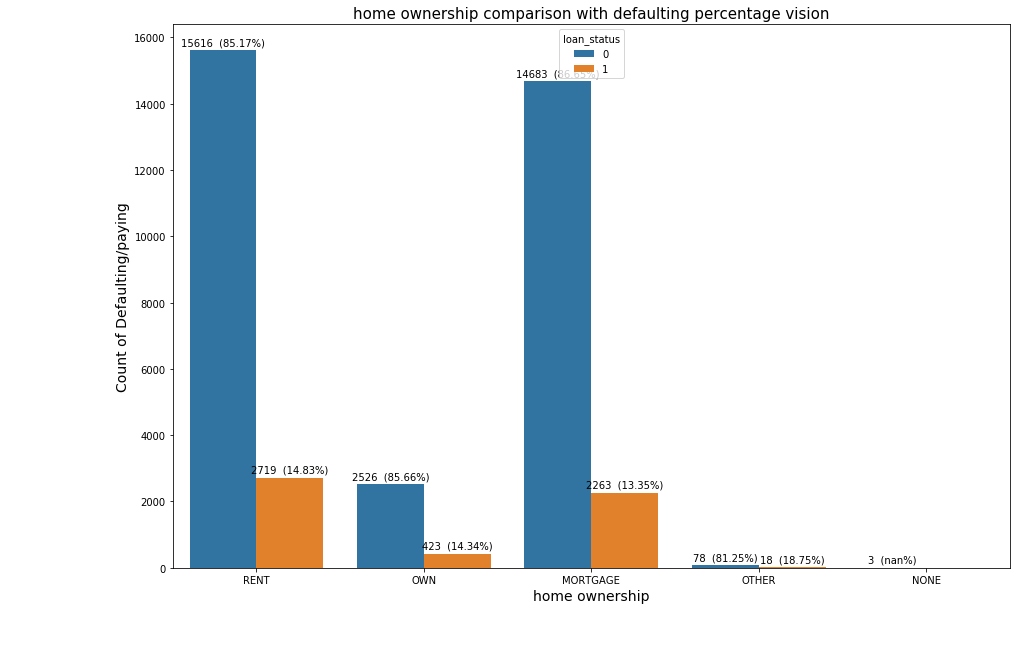

Difference between min and max defaulting percentages = 18.75


In [115]:
plot_loan_default_nondefault_percentage_univariate(df,"home_ownership","loan_status",figsize=(15,10),
                                           plottype="countplot",xlabel="home ownership",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="home ownership comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=5,show_count_label=True)

default_map["home_ownership"] = round(defaulting_range_univariate("home_ownership"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("home_ownership"),2))

- we can see that **defaulting percentage is independent of house_ownership type.**
- Above data can be read as, **among rented 14.83% are defaulters, so are other categories similarly**

  home_ownership  count
0           RENT   2719
1       MORTGAGE   2263
2            OWN    423
3          OTHER     18


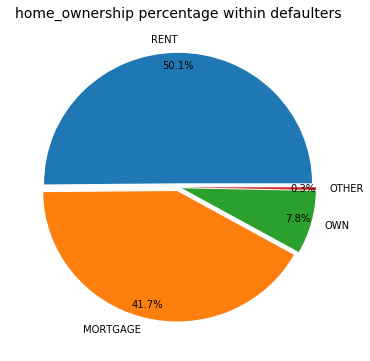

In [116]:
## lets check the percentages of home ownership for defaulters category only
home_ownership = def_df.home_ownership.value_counts().to_frame()
home_ownership.reset_index(inplace=True)
home_ownership = home_ownership.rename(columns={'index':'home_ownership','home_ownership':'count'})
print(home_ownership)
#lets draw a pie chart to get the percentage proportions for defaulters among home_ownership
pie, ax = plt.subplots(figsize=[6,6])
labels = list(home_ownership.home_ownership)
# print(labels)
plt.pie(x=home_ownership['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("home_ownership percentage within defaulters", fontsize=14);
pie.savefig("home_ownershipspie.png")

- **Among the defaulters 50% of them are renting a home**
- **just 7.8% are owning one**
- we can also see that **41.7% of the people have homes at mortag**, which means its already kept as surity for something else.

### 10) emp_length


In [117]:
#lets look at value distribution of emp_length
df.emp_length.value_counts()

10+ years        8449
< 1 year         4460
2 years          4269
3 years          3995
4 years          3314
5 years          3174
1 year           3139
6 years          2157
7 years          1701
8 years          1427
9 years          1220
Not Available    1024
Name: emp_length, dtype: int64

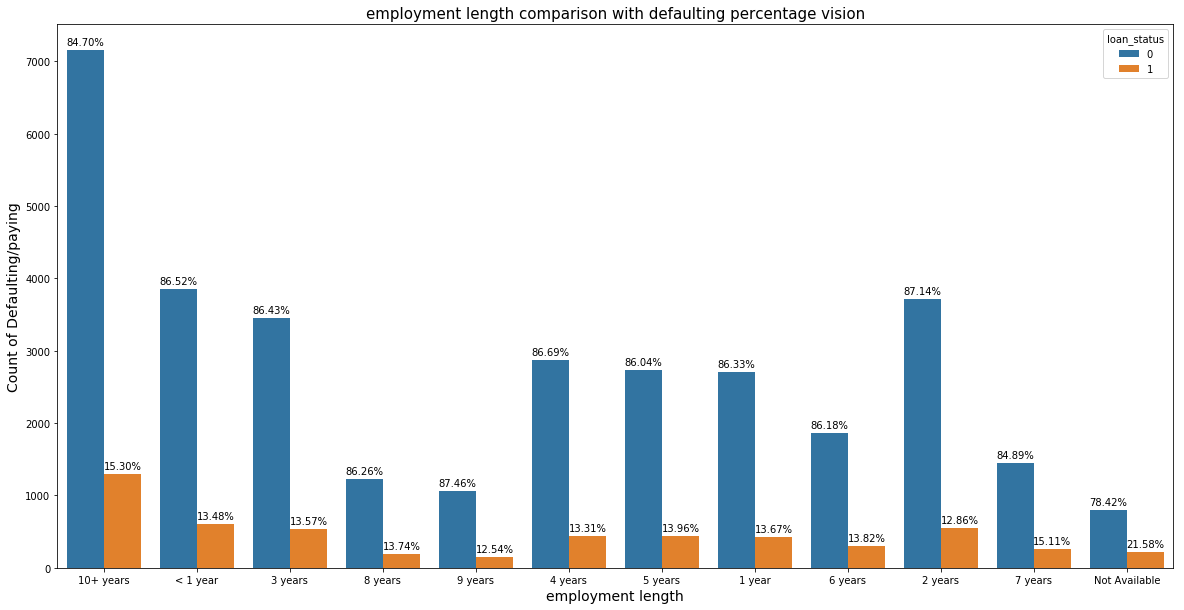

Difference between min and max defaulting percentages = 9.04


In [118]:
## lets plot the number of defaulters and non-defaulters based on employment length
plot_loan_default_nondefault_percentage_univariate(df,"emp_length","loan_status",figsize=(20,10),
                                           plottype="countplot",xlabel="employment length",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="employment length comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=10,n_categories=12,show_count_label=False)
#storing variation in the defaulter map
default_map["emp_length"] = round(defaulting_range_univariate("emp_length"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("emp_length"),2))

- defaulting percentage in 10 out of 12 categories is almost near to 13%.
- nothing insightful above

       emp_length  count
0       10+ years   1293
1        < 1 year    601
2         2 years    549
3         3 years    542
4         5 years    443
5         4 years    441
6          1 year    429
7         6 years    298
8         7 years    257
9   Not Available    221
10        8 years    196
11        9 years    153


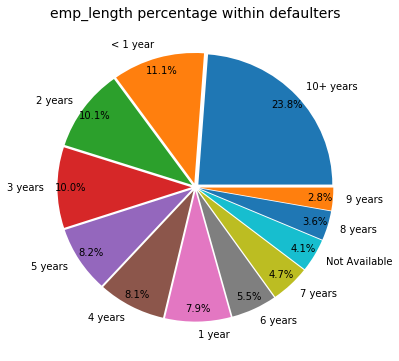

In [119]:
## lets check the types of emp_length for defaulters category only
emp_length = def_df.emp_length.value_counts().to_frame()
emp_length.reset_index(inplace=True)
emp_length = emp_length.rename(columns={'index':'emp_length','emp_length':'count'})
print(emp_length)
#lets draw a pie chart to get the percentage proportions for defaulters among emp_length
pie, ax = plt.subplots(figsize=[6,6])
labels = list(emp_length.emp_length)
# print(labels)
plt.pie(x=emp_length['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("emp_length percentage within defaulters", fontsize=14);
pie.savefig("emp_lengthpie.png")

- When looked at **% of categories within defaulters only**, we see that **24% of the borrowers have more than 10 years of experience.**
- Something quite interesting here is the **borrowers within 1 year of experience are defaulting more than people with higher experience.**

### 11) purpose


In [120]:
#lets look at value distribution of emp_length
df.purpose.value_counts()

debt_consolidation    17961
credit_card            5013
other                  3827
home_improvement       2858
major_purchase         2134
small_business         1724
car                    1494
wedding                 916
medical                 678
moving                  571
vacation                374
house                   364
educational             314
renewable_energy        101
Name: purpose, dtype: int64

In [121]:


## lets plot the number of defaulters and non-defaulters based on purpose
new_df = defaulting_percentages_univariate("purpose")
new_df


,purpose,count1,sum1,def_perc,ndef_perc
13,wedding,916,87,9.497817,90.502183
6,major_purchase,2134,212,9.934396,90.065604
0,car,1494,156,10.441767,89.558233
1,credit_card,5013,530,10.572511,89.427489
4,home_improvement,2858,332,11.616515,88.383485
12,vacation,374,53,14.171123,85.828877
2,debt_consolidation,17961,2682,14.932353,85.067647
7,medical,678,104,15.339233,84.660767
5,house,364,56,15.384615,84.615385
8,moving,571,89,15.586690,84.413310


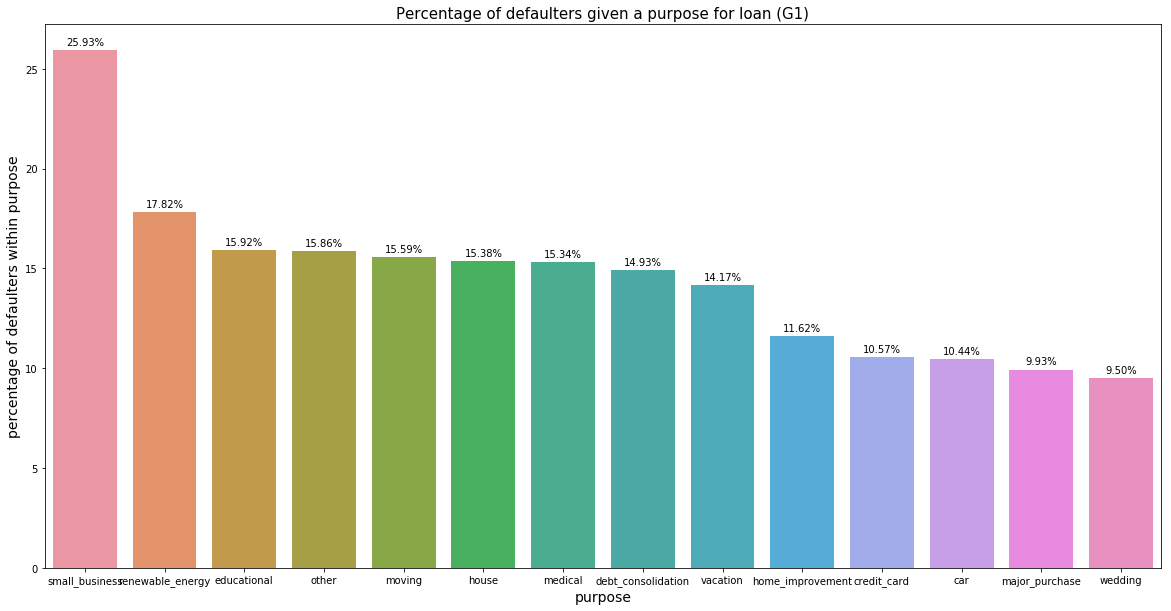

Difference between min and max defaulting percentages = 16.43


In [122]:
# ploting the bar chart with count will give us more insight on which purpose is high amongst all
plot_loan_default_nondefault_percentage_univariate(new_df.sort_values('def_perc',ascending=False),"purpose","def_perc",figsize=(20,10),
                                           plottype="barplot",xlabel="purpose",xlabel_size=14,
                                           ylabel="percentage of defaulters within purpose",ylabel_size=14,
                                           plot_title="Percentage of defaulters given a purpose for loan (G1)",
                                           plot_title_size=15,perc_fontsize=10,show_count_label=False)

#storing variation in the defaulter map
default_map["purpose"] = round(defaulting_range_univariate("purpose"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("purpose"),2))

- the above plot shows percentage of defaulters within a given purpose.
- we can see that **defaulting percentage is higher for small_businesses borrowers i.e. 26%**

In [123]:
## lets check the types of purposes for defaulters category
purpose = def_df.purpose.value_counts().to_frame()
purpose.reset_index(inplace=True)
purpose = purpose.rename(columns={'index':'purpose','purpose':'count'})
purpose

,purpose,count
0,debt_consolidation,2682
1,other,607
2,credit_card,530
3,small_business,447
4,home_improvement,332
5,major_purchase,212
6,car,156
7,medical,104
8,moving,89
9,wedding,87


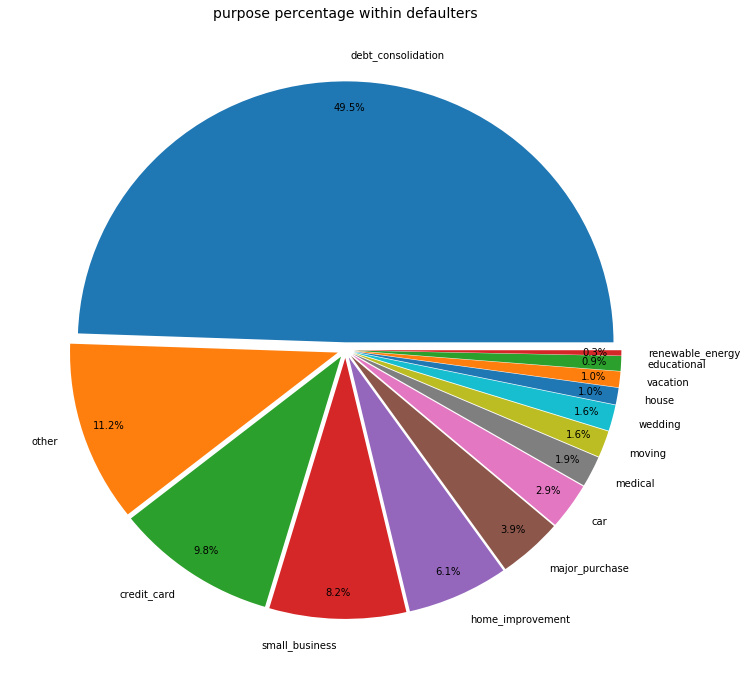

In [124]:
#lets draw a pie chart to get the percentage proportions for defaulters among all purposes
pie, ax = plt.subplots(figsize=[12,12])
labels = list(purpose.purpose)
# print(labels)
plt.pie(x=purpose['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("purpose percentage within defaulters", fontsize=14);
pie.savefig("purposepie.png")

- **purpose field** seems to be the **key factor in determining loan defaulter**
- we can see that  **people buying loan for debt_consolidation** are **very much likely to default which accounts to almost 50% of purpose for loan buying**


### 12) dti 
- debt to income ratio.
- less it is, more reliable a borrower will be

In [125]:
#checking the type of dtype
df.dti.dtype

dtype('float64')

In [126]:
#let's describe the dti
df.dti.describe()

count    38329.000000
mean        13.282998
std          6.669388
min          0.000000
25%          8.150000
50%         13.380000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [127]:
## lets see how the defaulter spread looks like
def_df.dti.describe()

count    5423.000000
mean       14.071175
std         6.564164
min         0.000000
25%         9.180000
50%        14.350000
75%        19.330000
max        29.850000
Name: dti, dtype: float64

In [128]:
## lets see how the defaulter spread looks like
ndef_df.dti.describe()

count    32906.000000
mean        13.153104
std          6.677746
min          0.000000
25%          7.990000
50%         13.200000
75%         18.400000
max         29.990000
Name: dti, dtype: float64

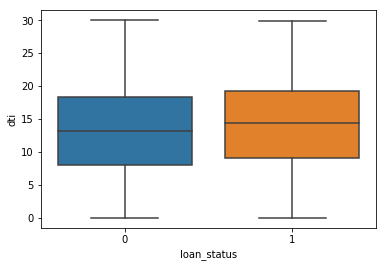

In [129]:
#let's compare values with boxplot
sns.boxplot(data = df,y="dti",x='loan_status')

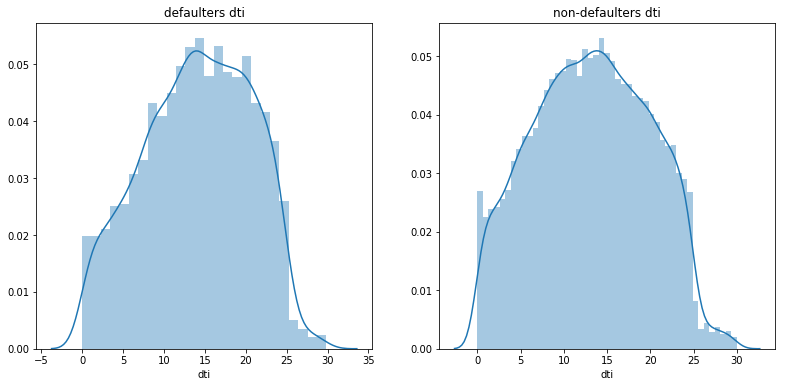

In [130]:
#plot the dti within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters dti")
ax[1].title.set_text("non-defaulters dti")
sns.distplot(def_df.dti,ax=ax[0])
sns.distplot(ndef_df.dti,ax=ax[1])
fig.show()

- we can see that non-defaulters have good spread on both the sides of the mean
- defaulters have less spread on the left, which says that they have little more dti in general than non-defaulters
- even non defaulters have high dti on the right of mean, similar to defaulters. So not a great indicator for defaulting.

### 13) open_acc
- Number of open credit lines.

In [131]:
## lets check no of open credit lines
def_open_acc = df[df.loan_status == 1].open_acc.value_counts().to_frame()
def_open_acc.reset_index(inplace=True)
def_open_acc = def_open_acc.rename(columns={'index':'def_open_acc','open_acc':'count'})
top5 = def_open_acc.head()
top5

,def_open_acc,count
0,7,532
1,8,530
2,6,527
3,9,501
4,10,455


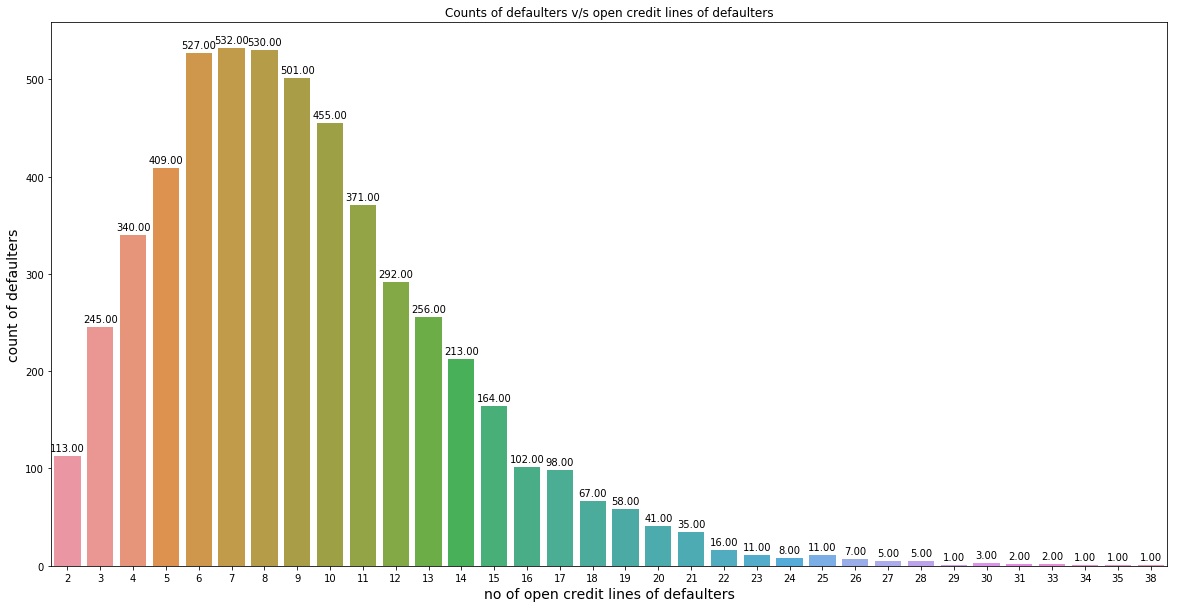

In [132]:
# lets get the distribution of credit lines for defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=def_open_acc,x='def_open_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of open credit lines of defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of defaulters v/s open credit lines of defaulters")
  
# Fianlly showing the plot
plt.show()

- We can see that lines between 5-10 have more number of defaulters

In [133]:
## lets check no of open credit lines
ndef_open_acc = df[df.loan_status == 0].open_acc.value_counts().to_frame()
ndef_open_acc.reset_index(inplace=True)
ndef_open_acc = ndef_open_acc.rename(columns={'index':'ndef_open_acc','open_acc':'count'})
top5 = ndef_open_acc.head()
top5

,ndef_open_acc,count
0,7,3350
1,6,3299
2,8,3265
3,9,3086
4,5,2684


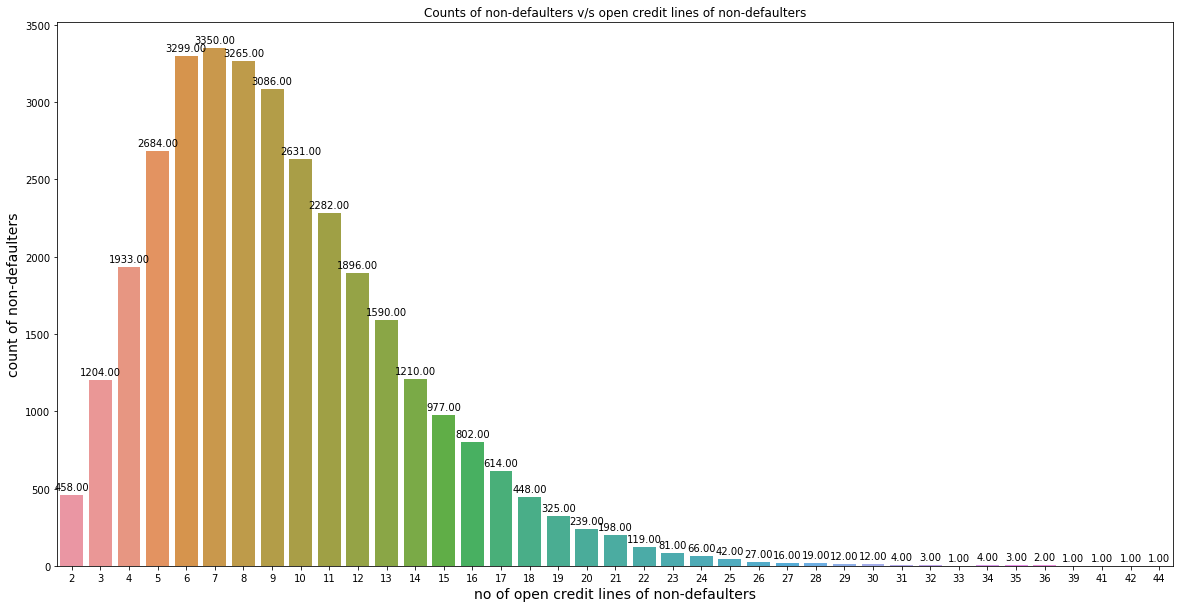

In [134]:
# lets get the distribution of credit lines for non-defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=ndef_open_acc,x='ndef_open_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of open credit lines of non-defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of non-defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of non-defaulters v/s open credit lines of non-defaulters")
  
# Fianlly showing the plot
plt.show()

- Even non-defaulters have similar number of credit lines. If looked together for defaulters and non-defaulters, then the number of credit lines doesn't make much value.

In [135]:
def_df.open_acc.describe()

count    5423.000000
mean        9.210769
std         4.501323
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        38.000000
Name: open_acc, dtype: float64

In [136]:
ndef_df.open_acc.describe()

count    32906.000000
mean         9.296633
std          4.378615
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

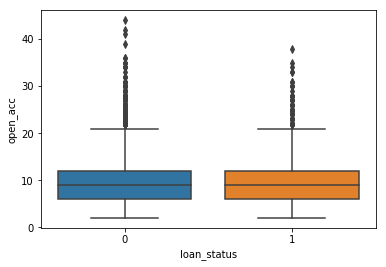

In [137]:
#lets see the box plots
sns.boxplot(data = df,y="open_acc",x='loan_status')


- When looked numerically, both the categories are distributed very similarly.
- The values of mean and median are also almost close. 
- Its better, we donot work with this column and drop it

In [138]:
#dropping open_acc column for all dataframes
df.drop(columns=['open_acc'],inplace = True)
def_df.drop(columns=['open_acc'],inplace = True)
ndef_df.drop(columns=['open_acc'],inplace = True)

### 14) pub_rec_bankruptcies

In [139]:
## lets check the types of bankruptcies
bankruptcies = df.pub_rec_bankruptcies.value_counts().to_frame()
bankruptcies.reset_index(inplace=True)
bankruptcies = bankruptcies.rename(columns={'index':'no_bankruptcies','pub_rec_bankruptcies':'count'})
bankruptcies

,no_bankruptcies,count
0,0.0,36694
1,1.0,1630
2,2.0,5


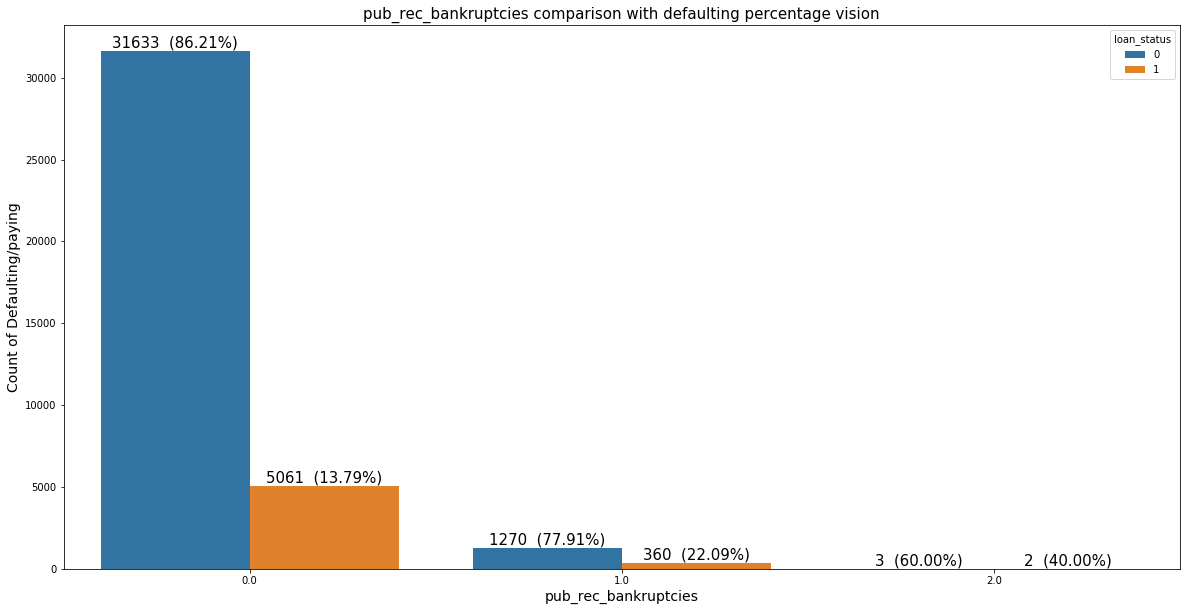

Difference between min and max defaulting percentages = 26.21


In [140]:
## lets plot the number of defaulters and non-defaulters based on pub_rec_bankruptcies
plot_loan_default_nondefault_percentage_univariate(df,"pub_rec_bankruptcies","loan_status",figsize=(20,10),
                                           plottype="countplot",xlabel="pub_rec_bankruptcies",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="pub_rec_bankruptcies comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=15,n_categories=3,show_count_label=True)

#storing variation in the defaulter map
default_map["pub_rec_bankruptcies"] = round(defaulting_range_univariate("pub_rec_bankruptcies"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("pub_rec_bankruptcies"),2))


- As number of bankruptcies are increasing, the defaulting rate is also increasing

   pub_rec_bankruptcies  count
0                   0.0   5061
1                   1.0    360
2                   2.0      2


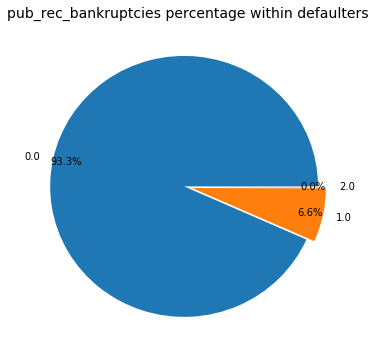

In [141]:
## lets check the types of pub_rec_bankruptcies for defaulters category only
pub_rec_bankruptcies = def_df.pub_rec_bankruptcies.value_counts().to_frame()
pub_rec_bankruptcies.reset_index(inplace=True)
pub_rec_bankruptcies = pub_rec_bankruptcies.rename(columns={'index':'pub_rec_bankruptcies','pub_rec_bankruptcies':'count'})
print(pub_rec_bankruptcies)
#lets draw a pie chart to get the percentage proportions for defaulters among pub_rec_bankruptcies
pie, ax = plt.subplots(figsize=[6,6])
labels = list(pub_rec_bankruptcies.pub_rec_bankruptcies)
# print(labels)
plt.pie(x=pub_rec_bankruptcies['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("pub_rec_bankruptcies percentage within defaulters", fontsize=14);
pie.savefig("pub_rec_bankruptciespie.png")

- **Among the defaulters, there are 93% with 0 bankruptcies**

### 15) revol_utilization

In [142]:
#check the values
df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [143]:
## lets convert it from percentage to float value for analysis
df.revol_util = df.revol_util.apply(lambda x: float(x[:-1]))

##do the same onto these dependent dataframes
def_df.revol_util =def_df.revol_util.apply(lambda x: float(x[:-1]))
ndef_df.revol_util = ndef_df.revol_util.apply(lambda x: float(x[:-1]))
df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [144]:
#lets see the spread of defaulters in revol_util
def_df.revol_util.describe()

count    5423.000000
mean       55.809701
std        27.843808
min         0.000000
25%        34.750000
50%        58.900000
75%        79.150000
max        99.900000
Name: revol_util, dtype: float64

In [145]:
#lets see the spread of non-defaulters in revol_util
ndef_df.revol_util.describe()

count    32906.000000
mean        47.532397
std         28.274710
min          0.000000
25%         23.900000
50%         47.600000
75%         70.800000
max         99.900000
Name: revol_util, dtype: float64

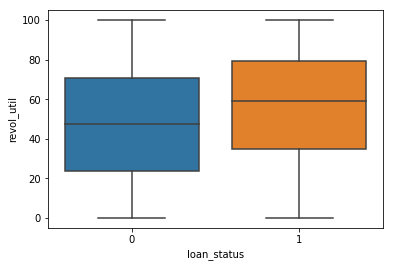

In [146]:
#boxplot of defaulters and non-defaulters for revol_util
sns.boxplot(data = df,x='loan_status',y='revol_util')


- There are no outliers present
- **defaulters have higher credit utilization with a mean utilization of 55% around, than non-defaulters who have around 47%**

### 16) total_acc

In [147]:
## lets check no of  credit lines for defaulters
def_total_acc = df[df.loan_status == 1].total_acc.value_counts().to_frame()
def_total_acc.reset_index(inplace=True)
def_total_acc = def_total_acc.rename(columns={'index':'total_acc','total_acc':'count'})
top5 = def_total_acc.head()
top5

,total_acc,count
0,14,224
1,16,215
2,17,195
3,15,194
4,13,188


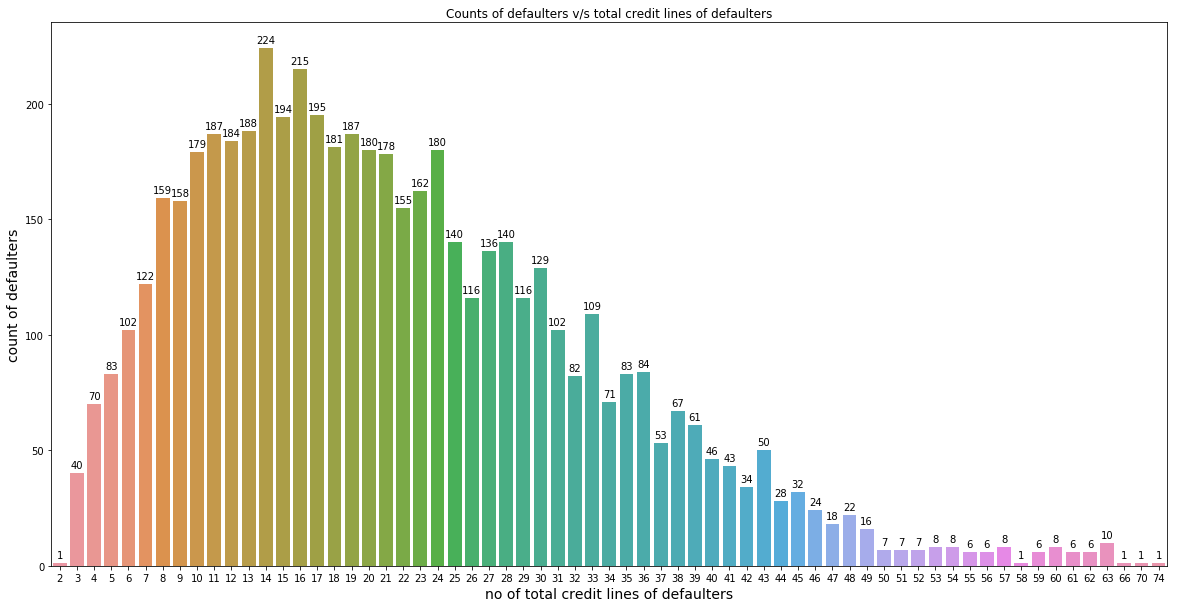

In [148]:
# lets get the distribution of total credit lines for defaulters
plt.figure(figsize=(20,10))
plots=sns.barplot(data=def_total_acc,x='total_acc',y='count')
# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("no of total credit lines of defaulters", size=14)
  
# Setting the label for y-axis
plt.ylabel("count of defaulters", size=14)
  
# Setting the title for the graph
plt.title("Counts of defaulters v/s total credit lines of defaulters")
  
# Fianlly showing the plot
plt.show()

- count of defaulters has a normal graph
- lets work numerically

In [149]:
def_df.total_acc.describe()

count    5423.000000
mean       21.574405
std        11.426329
min         2.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        74.000000
Name: total_acc, dtype: float64

In [150]:
ndef_df.total_acc.describe()

count    32906.000000
mean        22.172370
std         11.415433
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

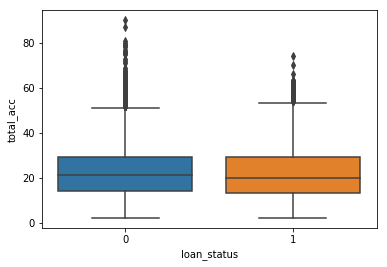

In [151]:
#boxplot of defaulters and non-defaulters for total_acc
sns.boxplot(data = df,x='loan_status',y='total_acc')

- We can see that both the categories have same kind of distribution in box plot.
- We cannot conclude anything on defaulting here due to its similar distributions on non defaulting
- Let's drop this column

In [152]:
df.drop(columns=['total_acc'],inplace = True)
def_df.drop(columns=['total_acc'],inplace = True)
ndef_df.drop(columns=['total_acc'],inplace = True)

### 17) pub_rec


In [153]:
## lets check the types of public degrogatories
deg = df.pub_rec.value_counts().to_frame()
deg.reset_index(inplace=True)
deg = deg.rename(columns={'index':'no_pub_rec','pub_rec':'count'})
deg

,no_pub_rec,count
0,0,36274
1,1,1998
2,2,48
3,3,7
4,4,2


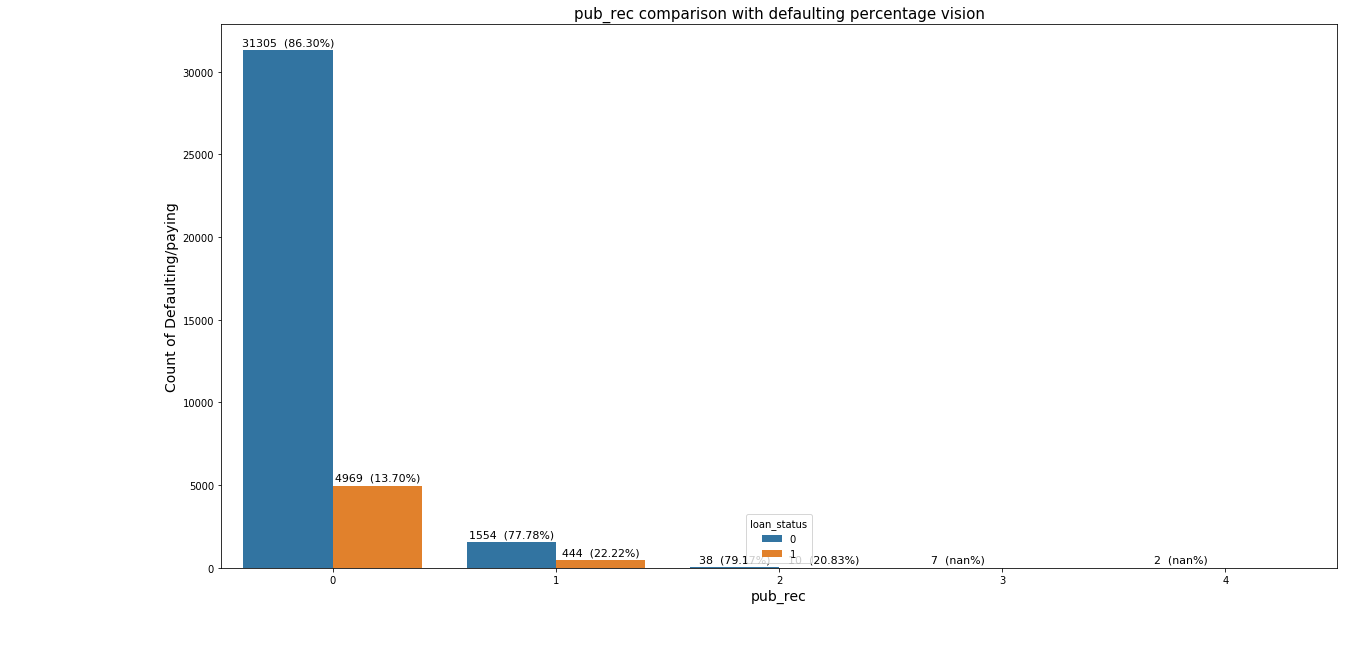

Difference between min and max defaulting percentages = 22.22


In [154]:

## lets plot the number of defaulters and non-defaulters based on pub_rec_bankruptcies
plot_loan_default_nondefault_percentage_univariate(df,"pub_rec","loan_status",figsize=(20,10),
                                           plottype="countplot",xlabel="pub_rec",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="pub_rec comparison with defaulting percentage vision",
                                           plot_title_size=15,perc_fontsize=11,n_categories=5,show_count_label=True)

#storing variation in the defaulter map
default_map["pub_rec"] = round(defaulting_range_univariate("pub_rec"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("pub_rec"),2))




   pub_rec  count
0        0   4969
1        1    444
2        2     10


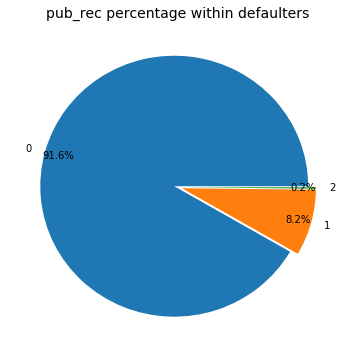

In [155]:
## lets check the types of pub_rec for defaulters category only
pub_rec = def_df.pub_rec.value_counts().to_frame()
pub_rec.reset_index(inplace=True)
pub_rec = pub_rec.rename(columns={'index':'pub_rec','pub_rec':'count'})
print(pub_rec)
#lets draw a pie chart to get the percentage proportions for defaulters among pub_rec
pie, ax = plt.subplots(figsize=[6,6])
labels = list(pub_rec.pub_rec)
# print(labels)
plt.pie(x=pub_rec['count'], autopct="%.1f%%", explode=[0.03]*len(labels), labels=labels, pctdistance=0.9)
plt.title("pub_rec percentage within defaulters", fontsize=14);
pie.savefig("pub_recpie.png")

- We see that **91.6%** of them within the **defaulters** are with **0 records.** 
- Nothing insightful out of this column, because non-defaulters also will have the similar prop

### 18) delinq_2yrs

In [156]:
## lets check the types of public degrogatories
delq = df.delinq_2yrs.value_counts().to_frame()
delq.reset_index(inplace=True)
delq = delq.rename(columns={'index':'no_delinq_2yrs','delinq_2yrs':'count'})
delq

,no_delinq_2yrs,count
0,0,34177
1,1,3181
2,2,668
3,3,206
4,4,58
5,5,21
6,6,10
7,7,4
8,8,2
9,11,1


In [157]:
## lets check the no. of delinqacies in 2yrs only in defualters
def_delq = def_df.delinq_2yrs.value_counts().to_frame()
def_delq.reset_index(inplace=True)
def_delq = def_delq.rename(columns={'index':'no_delinq_2yrs','delinq_2yrs':'count'})
def_delq.sort_values('no_delinq_2yrs',inplace=True)
def_delq

,no_delinq_2yrs,count
0,0,4768
1,1,483
2,2,125
3,3,29
4,4,12
5,5,3
7,6,1
6,7,1
8,8,1


In [158]:
## lets check the number of delinqacies only in non-defualters
ndef_delq = ndef_df.delinq_2yrs.value_counts().to_frame()
ndef_delq.reset_index(inplace=True)
ndef_delq = ndef_delq.rename(columns={'index':'no_delinq_2yrs','delinq_2yrs':'count'})
ndef_delq.sort_values('no_delinq_2yrs',inplace=True)
ndef_delq

,no_delinq_2yrs,count
0,0,29409
1,1,2698
2,2,543
3,3,177
4,4,46
5,5,18
6,6,9
7,7,3
10,8,1
9,9,1


- We can see that within defaulters highest are 0 delinquecies like in non-defaulters

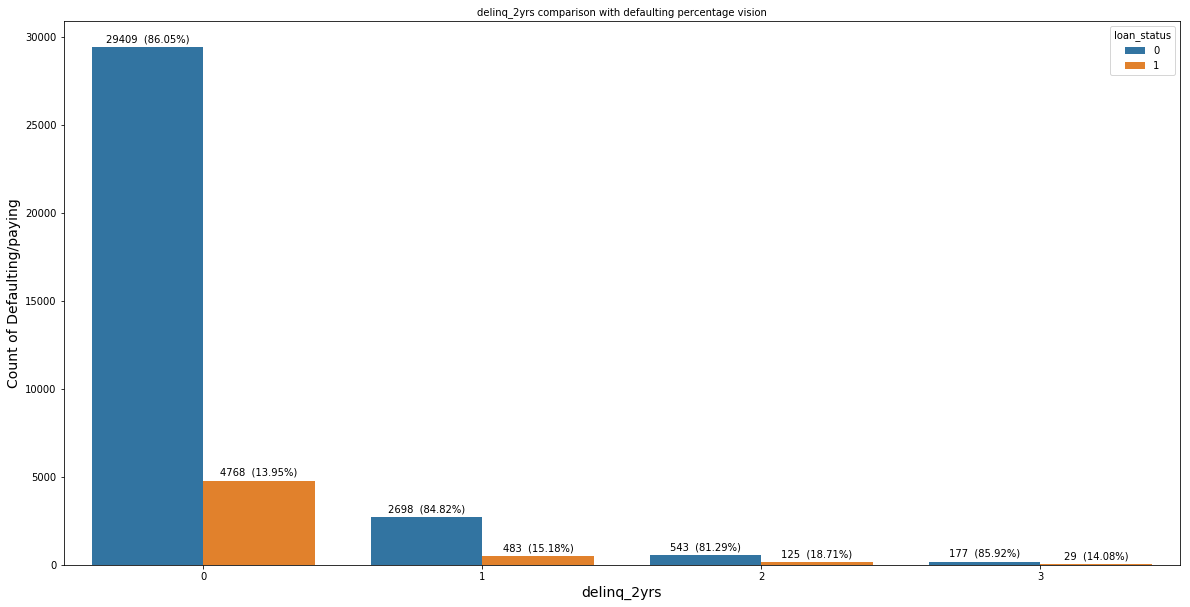

Difference between min and max defaulting percentages = 50.0


In [159]:
## lets plot the number of defaulters and non-defaulters based on no_of_delinquecies ranging till 3

plot_loan_default_nondefault_percentage_univariate(df[df.delinq_2yrs<=3],"delinq_2yrs","loan_status",figsize=(20,10),
                                           plottype="countplot",xlabel="delinq_2yrs",xlabel_size=14,
                                           ylabel="Count of Defaulting/paying",ylabel_size=14,
                                           plot_title="delinq_2yrs comparison with defaulting percentage vision",
                                           plot_title_size=10,perc_fontsize=10,n_categories=4,show_count_label=True)

#storing variation in the defaulter map
default_map["delinq_2yrs"] = round(defaulting_range_univariate("delinq_2yrs"),2)
print("Difference between min and max defaulting percentages =",round(defaulting_range_univariate("delinq_2yrs"),2))

#### We can above that if we consider all the borrowers with a given number of delinquecies, we can see that as the delinquecies are increasing , the defaulting is also increasing. We donot see that trend beyond 2 delinquecies as  the datapoints are less for more than 2 delinq.

### 3) Derived Metrics

### 1. tenure_paid
    - % of months paid to the committed tenure

In [160]:
# lets check the dtypes of issue_d , last_pymnt_d
print(df.issue_d.dtype)
print(df.last_pymnt_d.dtype)

object
object


Formula = (((last paid date - last received date) - 1(because he will pay from next month))/ term)  x 100

In [161]:
import datetime

## lets convert these below columns to datetime objects
df.issue_d =  pd.to_datetime(df.issue_d,format="%b-%y")
df.last_pymnt_d =  pd.to_datetime(df.last_pymnt_d,format="%b-%y")


In [162]:
## lets convert the term column to just integer months
df.term = df.term.apply(lambda x: int(x.split(' ')[1]))

In [163]:
##applying the formula
df['tenure_paid'] = 100*((((df.last_pymnt_d - df.issue_d)/np.timedelta64(1, 'M'))-1)/df.term)

In [164]:
df.tenure_paid

0        100.076262
1         25.000548
2         80.545859
3        100.076262
5        100.076262
6         86.658213
7        100.076262
8          5.013826
9         16.732068
10        28.340794
11        55.630905
12        16.661362
13       100.076262
14        58.368812
15       100.076262
16       100.076262
17        44.405486
18       102.905433
19        16.661362
20        71.654483
21        55.630905
22       100.076262
23        58.368812
24        25.057610
25        22.319703
27        18.374813
28        41.667579
29        97.247092
30       100.076262
31        52.801734
            ...    
39686     97.247092
39687     94.417921
39689     97.247092
39690     22.319703
39691     97.247092
39692     97.247092
39693     52.801734
39694     14.014719
39695     97.247092
39696     94.509185
39697     97.247092
39698     97.247092
39699     88.942107
39700     97.247092
39701     97.247092
39702     97.247092
39703     97.247092
39704     97.247092
39705     97.247092


In [165]:
df.tenure_paid.describe()

count    38329.000000
mean        67.275888
std         31.478337
min         -0.222398
25%         41.667579
50%         74.994730
75%         97.247092
max        191.613620
Name: tenure_paid, dtype: float64

In [166]:
## lets create new defaulter and non-defaulter dataframes with above changes

def_df = df[df.loan_status == 1]
ndef_df = df[df.loan_status == 0]

In [167]:
# lets look at the spread of defaulters' paid tenure percentage
def_df.tenure_paid.describe()

count    5423.000000
mean       40.682635
std        25.378371
min        -0.222398
25%        19.490533
50%        36.718790
75%        60.045757
max       169.254046
Name: tenure_paid, dtype: float64

In [168]:
# lets look at the spread of non defaulters' paid tenure percentage
ndef_df.tenure_paid.describe()

count    32906.000000
mean        71.658529
std         30.204374
min         -0.222398
25%         49.881300
50%         83.283766
75%         97.247092
max        191.613620
Name: tenure_paid, dtype: float64

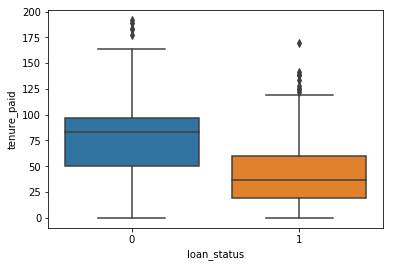

In [169]:
#boxplot of defaulters and non-defaulters for tenure_paid
sns.boxplot(data = df,x='loan_status',y='tenure_paid')

- we can clearly see that **defaulter has very less paid tenure percentage(36.7%)** as compared to **non-defaulters(83%)** in terms of **median.**
- This variable is a **strong indicator if** we are **analysing post a borrowers payment cycle**

### 2. total_prncp_paid_perc
 - (total payment received /  loan amount) x 100

In [170]:
### let's look at a borrower who has fully paid with some late fee
bor = df[(df.loan_status == 0) & (df.total_rec_late_fee > 0)].iloc[0]
bor

id                                  1076863
loan_amnt                             10000
term                                     36
int_rate                              13.49
installment                          339.31
grade                                     C
sub_grade                                C1
emp_length                        10+ years
home_ownership                         RENT
annual_inc                            49200
verification_status         Source Verified
issue_d                 2011-12-01 00:00:00
loan_status                               0
purpose                               other
addr_state                               CA
dti                                      20
delinq_2yrs                               0
earliest_cr_line                     Feb-96
pub_rec                                   0
revol_bal                              5598
revol_util                               21
out_prncp                                 0
total_pymnt                     

In [171]:
# total amount received includes interest and late fee
(bor.loan_amnt + bor.total_rec_int + bor.total_rec_late_fee) == bor.total_pymnt

True

In [172]:
## lets get the principal paid perc derived column
df['total_prncp_paid_perc'] = round(100*((df.total_pymnt - df.total_rec_late_fee - df.total_rec_int) / df.loan_amnt),2)

In [173]:
df.total_prncp_paid_perc

0        100.00
1         22.94
2        100.00
3        100.00
5        100.00
6         99.79
7        100.00
8          6.27
9         17.54
10       100.00
11       100.00
12        18.89
13       100.00
14        60.79
15       100.00
16       100.00
17       100.00
18       100.00
19       100.00
20       100.00
21        50.93
22       100.00
23       100.00
24        26.25
25       100.00
27        17.80
28       100.00
29       100.00
30       100.00
31       100.00
          ...  
39686    100.00
39687    100.00
39689    100.00
39690    100.00
39691    100.00
39692    100.00
39693    100.00
39694    100.00
39695    100.00
39696    100.00
39697    100.00
39698    100.00
39699    100.00
39700    100.00
39701    100.00
39702    100.00
39703    100.00
39704    100.00
39705    100.00
39706    100.00
39707    100.00
39708    100.00
39709    100.00
39710    100.00
39711    100.00
39712    100.00
39713    100.00
39714    100.00
39715    100.00
39716    100.00
Name: total_prncp_paid_p

In [174]:
## lets add this to def and ndef dataframes as well 
def_df = df[df.loan_status == 1]
ndef_df = df[df.loan_status == 0]

In [175]:
df.total_prncp_paid_perc.describe()

count    38329.000000
mean        90.431587
std         23.287630
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        111.830000
Name: total_prncp_paid_perc, dtype: float64

In [176]:
#lets describe the spread of total principal paid percentage in non-defaulters 
ndef_df.total_prncp_paid_perc.describe()

count    32906.000000
mean        98.648624
std          6.823193
min         10.120000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: total_prncp_paid_perc, dtype: float64

- We can see that there are **few borrowers who are shown as fully paid, but the principal percentage is not 100**
- This might be due to some other factors like surity, loan_waiver, house_disposal etc.. which is out of the scope of dataset

In [177]:
#lets describe the spread of total principal paid percentage in non-defaulters 
def_df.total_prncp_paid_perc.describe()

count    5423.000000
mean       40.571765
std        25.589635
min         0.000000
25%        18.830000
50%        35.940000
75%        59.670000
max       111.830000
Name: total_prncp_paid_perc, dtype: float64

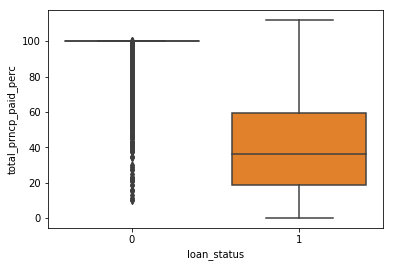

In [178]:
#boxplot of defaulters and non-defaulters for tenure_paid
sns.boxplot(data = df,x='loan_status',y='total_prncp_paid_perc')

### Its clearly evident that the median of defaulters is near 36% prncp paid, but the non defaulters have paid 100% of the principal
    - This is not a strong factor as its a post loan insight.

### 3) revol_bal_mult
    - This will give us how many times the emi is borrower's revol_bal
    - This will give us an insight if he can use his existing revol_bal to clear the current loan line.
    - Formula: revol_bal/installment

In [179]:
#lets apply the formula and get the derived column
df['revol_bal_mult'] = df.revol_bal / df.installment

In [180]:
## lets add this to def and ndef dataframes as well 
def_df = df[df.loan_status == 1]
ndef_df = df[df.loan_status == 0]

In [181]:
#let's describe revol_bal_mult for all values
df.revol_bal_mult.describe()

count    38329.000000
mean        52.861057
std         89.493497
min          0.000000
25%         15.766093
50%         31.229837
75%         55.435027
max       4068.034826
Name: revol_bal_mult, dtype: float64

In [182]:
#let's describe revol_bal_mult for defaulters
def_df.revol_bal_mult.describe()

count    5423.000000
mean       52.970698
std        86.947201
min         0.000000
25%        16.049472
50%        31.260603
75%        57.488457
max      2179.148125
Name: revol_bal_mult, dtype: float64

In [183]:
#let's describe revol_bal_mult for non-defaulters
ndef_df.revol_bal_mult.describe()

count    32906.000000
mean        52.842988
std         89.907490
min          0.000000
25%         15.713524
50%         31.227932
75%         55.060123
max       4068.034826
Name: revol_bal_mult, dtype: float64

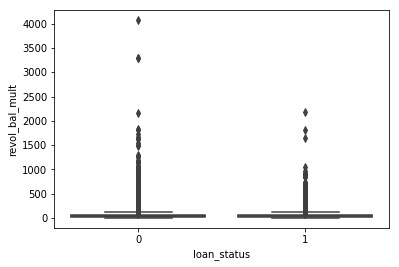

In [184]:
#boxplot of defaulters and non-defaulters for revol_bal_mult
sns.boxplot(data = df,x='loan_status',y='revol_bal_mult')

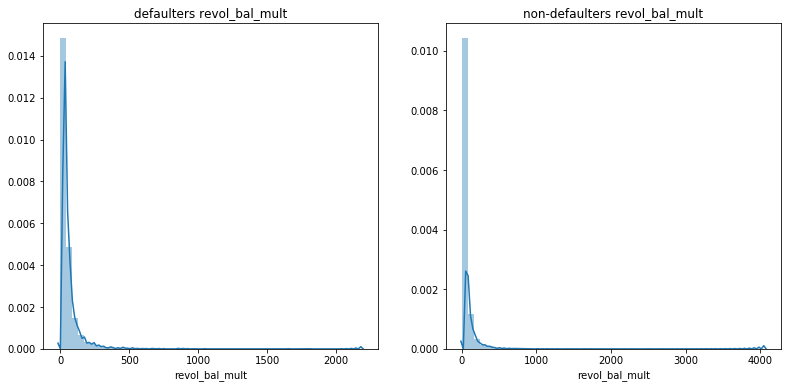

In [185]:
#plot the dti within the upper whisker ignoring outliers for both the categories
fig, ax =plt.subplots(1,2,figsize=(12,6))
fig.subplots_adjust(right = 0.98)
ax[0].title.set_text("defaulters revol_bal_mult")
ax[1].title.set_text("non-defaulters revol_bal_mult")
sns.distplot(def_df.revol_bal_mult,ax=ax[0])
sns.distplot(ndef_df.revol_bal_mult,ax=ax[1])
fig.show()

- We can see that both defaulters and non defaulters have the same spread of values in terms of the amount revolving to their emi

### 4) Bivariate Analysis

### Grade Analysis
    - checking how each subgrade is affecting the defaulting rate within a grade

In [186]:
## Let us define a function which will return a dataframe with defaulting percentages given two categories variable1 and variable 2
def loan_default_percentage_bivariate(variable1,variable2):
    x = pd.DataFrame(df.groupby(by=[variable1,variable2])["loan_status"].count()) ## get counts of borrowers in each category in variable 2 under a each category in variable 1
    y = pd.DataFrame(df.groupby(by=[variable1,variable2])["loan_status"].sum())   ## get no of defaulters
    x = x.rename(columns = {"loan_status" : 'count1'})
    y = y.rename(columns = {"loan_status" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["def_perc"] = 100 * z['sum1']/z.count1 ## get the percentages of defaulting
    z["ndef_perc"] = 100 - z.def_perc ## get the percentages of non_ defaulting
    z.reset_index(inplace=True)
    z = z.sort_values("def_perc")
    return z

## Let us define a function which takes the df returned by above function and averages the percentages accross main category variable 1
def defaulting_range_bivariate(df,variable1):
    x = pd.DataFrame(df.groupby(by=[variable1])["def_perc"].count()) ## get counts of borrowers in each category in variable 1
    y = pd.DataFrame(df.groupby(by=[variable1])["def_perc"].sum())   ## get no of defaulters
    x = x.rename(columns = {"def_perc" : 'count1'})
    y = y.rename(columns = {"def_perc" : 'sum1'})
    z = pd.merge(x,y,left_index=True, right_index=True, how = "inner") ## merge these dataframes
    z["avg_def_perc"] = z['sum1']/z.count1 ## get the percentages of defaulting
    z.reset_index(inplace=True)
    z = z.sort_values("avg_def_perc")
    return z.iloc[-1].avg_def_perc - z.iloc[0].avg_def_perc


In [187]:
## Let us define a function to plot the defaulting percentages across a subcategory in variable 2 under a category in variable 1
def plot_loan_default_percentage_bivariate(dataframe,variable1=None,variable2=None,figsize=(20,10),
                                           plottype="barplot",xlabel="Xlabel",xlabel_size=18,
                                           ylabel="Ylabel",ylabel_size=18,plot_title="Plot Title",
                                           plot_title_size=20,perc_fontsize=10,show_perc_label= False,
                                          perc_precision=2):
    ''' 
        dataframe      : data 
        variable1      : main category
        variable2      : sub/other category 
        plottype           : barplot -> if looking for barplot under each subcategory within a category
                         meanplot -> if looking for average of all default percentages of subcategories within a category
        figsize        : tuple (x,y) with plot size
        xlabel         : xlabel of the plot
        xlabel_size    : fontsize of xlabel
        ylabel         : ylabel of the plot
        ylabel_size    : fontsize of ylabel
        plot_title     : Title of the graph
        plot_title_size: fontsize of the plot_title
        perc_fontsize  : size of the percentage labels on each bar
        show_perc_label: Bool to show the % suffix on perc label
        perc_precision : no.of decimal points precision for bar label
        
    '''
    
    # Defining the plot size
    plt.figure(figsize=figsize)

    # Defining the values for x-axis, y-axis
    # and from which datafarme the values are to be picked
    if plottype == "barplot":
        plots = sns.barplot(data = dataframe, x = variable1,hue = variable2,y="def_perc")
    elif plottype == "meanplot":
        plots = dataframe.groupby(by=[variable1])["def_perc"].mean().sort_values().plot.bar()

    # Iterrating over the bars one-by-one
    for bar in plots.patches:
        if show_perc_label:
            plots.annotate(str(format(bar.get_height(), '.'+str(perc_precision)+'f'))+"%", 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')
        else:
            plots.annotate(format(bar.get_height(), '.'+str(perc_precision)+'f'), 
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()), ha='center', va='center',
                           size=perc_fontsize, xytext=(0, 8),
                           textcoords='offset points')
    # Setting the label for x-axis
    plt.xlabel(xlabel, size=xlabel_size)

    # Setting the label for y-axis
    plt.ylabel(ylabel, size=ylabel_size)

    # Setting the title for the graph
    plt.title(plot_title , size = plot_title_size)

    # Fianlly showing the plot
    plt.show()

In [188]:
##creating a new dataframe with defaulting percentages in each sub_grade within a grade

def_percs = loan_default_percentage_bivariate("grade","sub_grade")
def_percs.sub_grade = def_percs.sub_grade.apply(lambda x: int(x[1])) ##rename_grades to 1,2,3,4,5 istead of A1 G2 etc.,
def_percs

,grade,sub_grade,count1,sum1,def_perc,ndef_perc
0,A,1,1138,30,2.636204,97.363796
1,A,2,1506,72,4.780876,95.219124
2,A,3,1805,99,5.484765,94.515235
3,A,4,2872,177,6.162953,93.837047
4,A,5,2710,212,7.822878,92.177122
5,B,1,1789,164,9.167132,90.832868
6,B,2,1990,217,10.904523,89.095477
7,B,3,2820,336,11.914894,88.085106
8,B,4,2422,316,13.047069,86.952931
9,B,5,2605,347,13.320537,86.679463


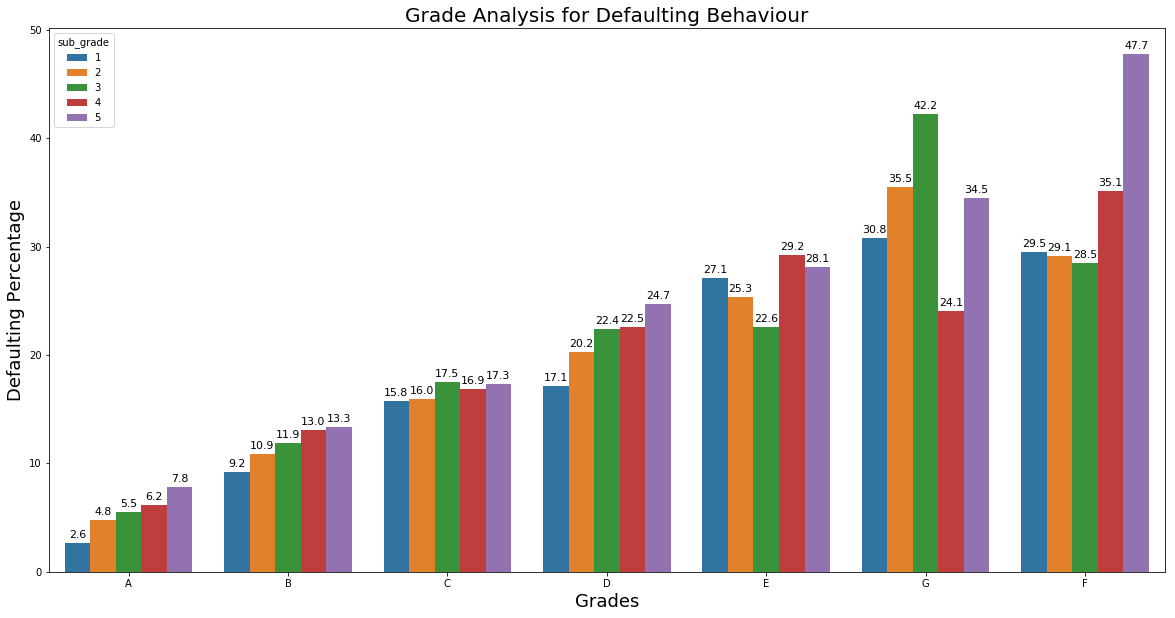

In [189]:
##drawing a neat barplot of defaulting percentages for each sub-grade within a grade
plot_loan_default_percentage_bivariate(def_percs,"grade","sub_grade",xlabel="Grades",ylabel="Defaulting Percentage",
                                       plot_title="Grade Analysis for Defaulting Behaviour",perc_fontsize=11,perc_precision=1)

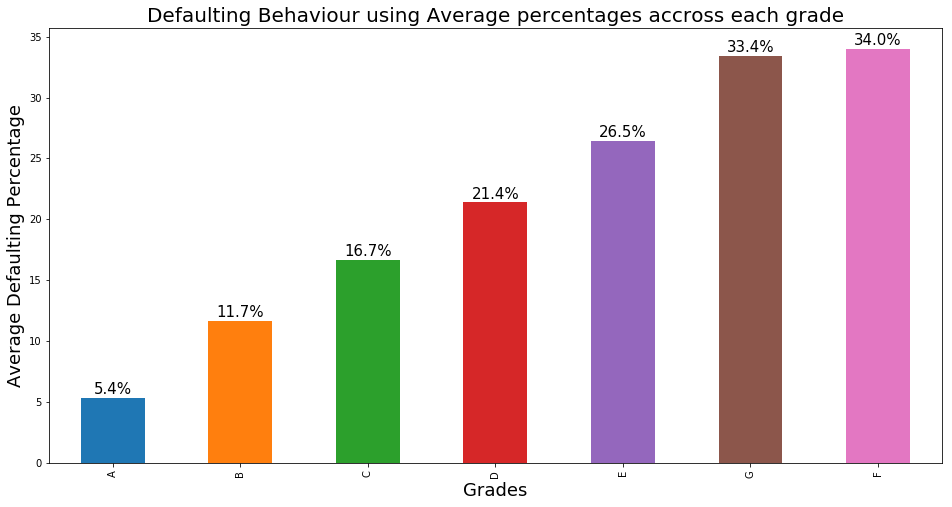

Difference between min and max avg.defaulting percentages = 28.62


In [190]:
## lets draw a mean defaulting percentage of all the sub-grades in a grade 
plot_loan_default_percentage_bivariate(def_percs,"grade",xlabel="Grades",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages accross each grade",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)
#storing variation in the defaulter map
default_map["grade_subgrades"] = round(defaulting_range_bivariate(def_percs,"grade"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"grade"),2))

- We can observe here that **Grade F** has the highest average defaulting percentage accross all the grades
- G is also close by F in avg defaulting percentage
- When seen at subgrade level, **A** has its sub grades recording the **least** defaulting percentage
- **F5** records **highest** defaulting rate of 47.7%
- As the grade increases, any subgrade we might choose within that grade, we will end up with higher defaulting rate than the previous grade

## 2) Purpose Analysis

### i) loan amount bucket v/s defaulting in each purpose

In [191]:
##listing all the types of purposes
purposes = list(df.purpose.unique())
purposes

['credit_card',
 'car',
 'small_business',
 'other',
 'wedding',
 'debt_consolidation',
 'home_improvement',
 'major_purchase',
 'medical',
 'moving',
 'vacation',
 'house',
 'renewable_energy',
 'educational']

In [192]:

##creating a new dataframe with defaulting percentages in each loan_amnt_bucket within a purpose

def_percs = loan_default_percentage_bivariate("purpose","loan_amnt_bucket")
def_percs

,purpose,loan_amnt_bucket,count1,sum1,def_perc,ndef_perc
85,vacation,6,1,0,0.000000,100.000000
59,moving,7,4,0,0.000000,100.000000
91,wedding,6,4,0,0.000000,100.000000
72,renewable_energy,7,1,0,0.000000,100.000000
5,car,6,2,0,0.000000,100.000000
45,major_purchase,7,15,1,6.666667,93.333333
50,medical,5,29,2,6.896552,93.103448
55,moving,3,42,3,7.142857,92.857143
86,wedding,1,231,17,7.359307,92.640693
6,credit_card,1,876,73,8.333333,91.666667


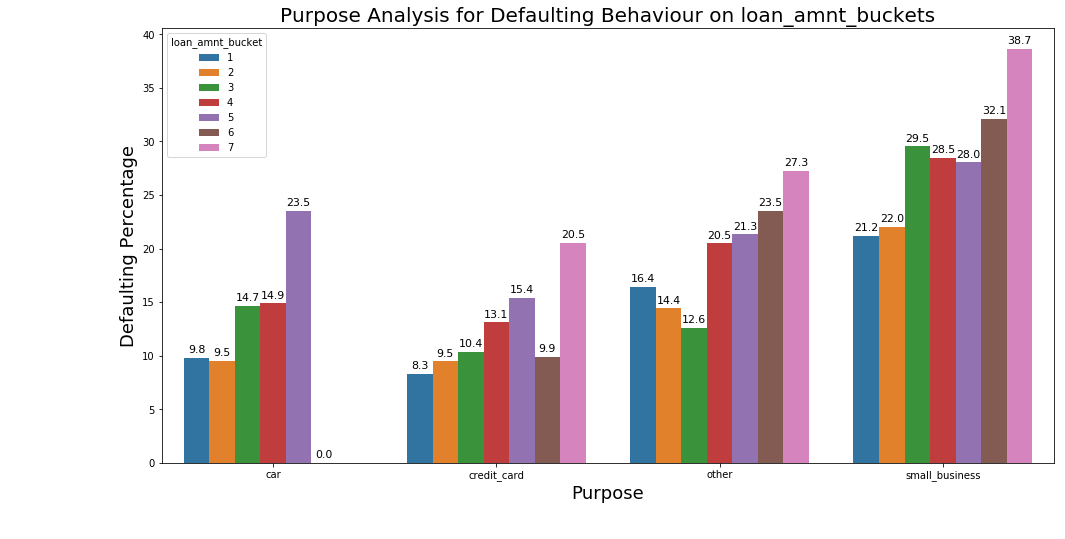

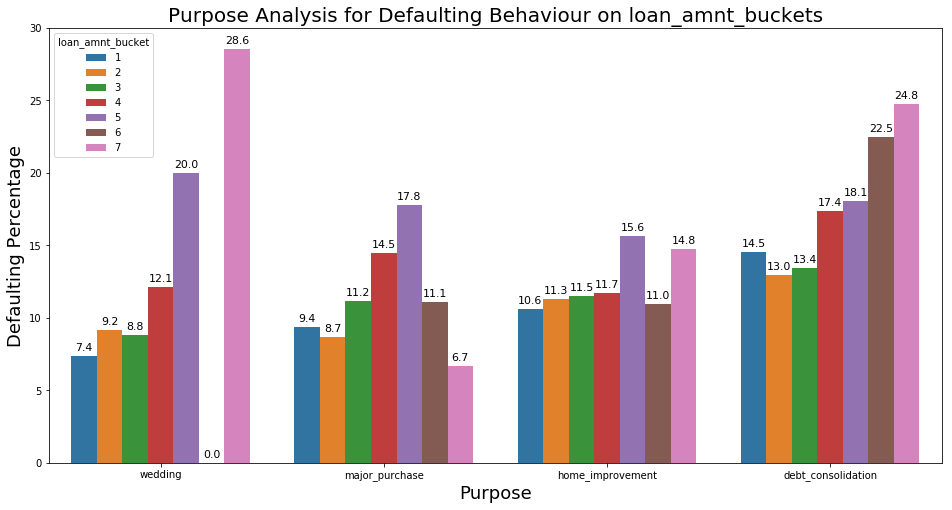

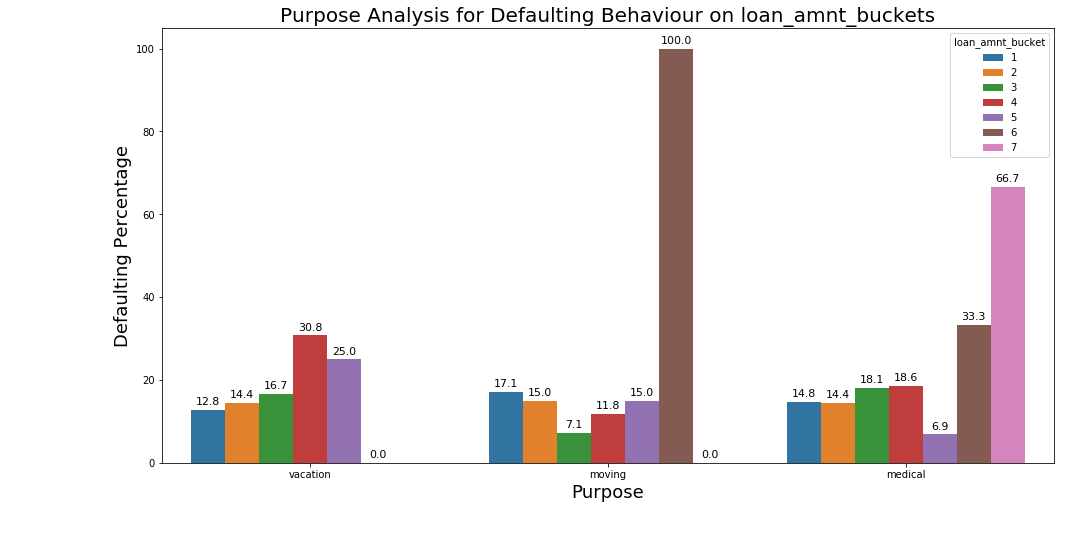

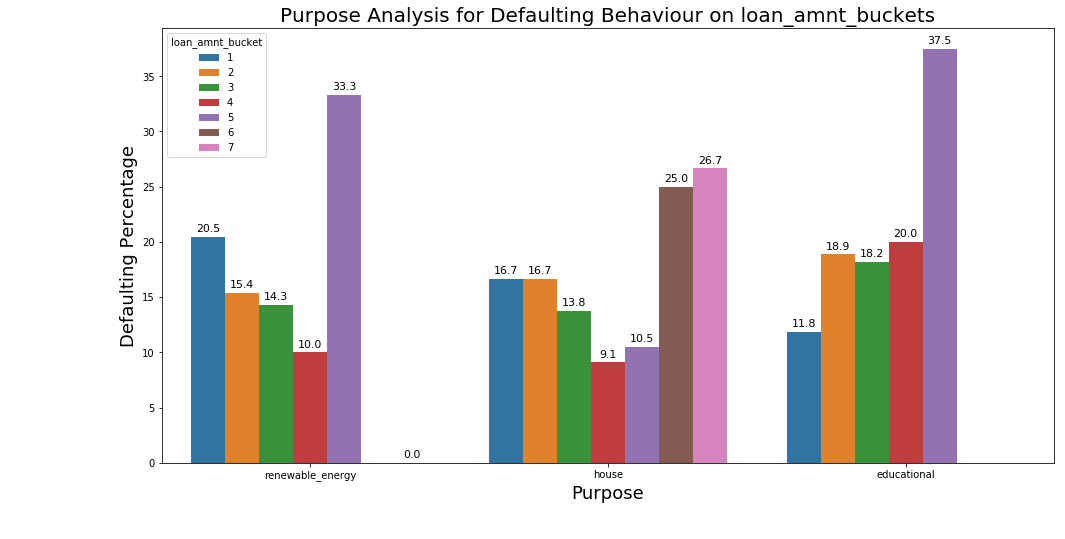

In [193]:

##drawing a neat barplot of defaulting percentages for each loan_amount_bucket within a purpose

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[0:4])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[4:8])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[8:11])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[11:])],"purpose","loan_amnt_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on loan_amnt_buckets",perc_fontsize=11,
                                           perc_precision=1)



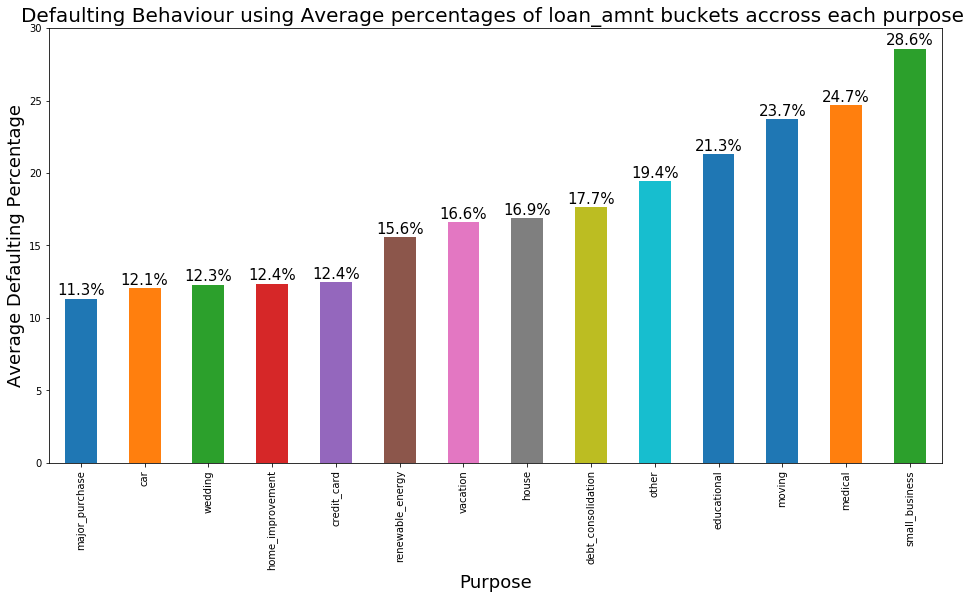

Difference between min and max avg.defaulting percentages = 17.25


In [194]:
## lets draw a mean defaulting percentage of all the loan_buckets in a purpose 
plot_loan_default_percentage_bivariate(def_percs,"purpose",xlabel="Purpose",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of loan_amnt buckets accross each purpose ",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)

#storing variation in the defaulter map
default_map["purpose_loan_buckets"] = round(defaulting_range_bivariate(def_percs,"purpose"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"purpose"),2))



- The definiton of Average defaulting, we will get the percentage of defaulters per loan_amnt_bucket and further average for all of them in each purpose. 
- there is overall **less probability** of defaulting in _major_purchase_.
- **small_businesses** tend to **default more** than any other purpose. Even **Medical** looks a good area to catch defaulters.
- One interesting insight is there are **100% defaulters** in who take loan in range of **30-35k** (bucket 7) under **"moving"** purpose
- In **wedding**, loan_amnt bucket 6(25000-30000) we can see a **0% defaulting**
- When we did univariate analysis, we observed that half the defaulters were from debt_consolidation. But when done along with loan bucket we see a different trend.

### ii) income v/s defaulting in each purpose

In [195]:
df.income_bucket.value_counts()

2.0    12750
3.0    11607
4.0     6010
5.0     2682
1.0     2504
7.0     1482
6.0     1294
Name: income_bucket, dtype: int64

In [196]:
##creating a new dataframe with defaulting percentages in each income_bucket within a purpose

def_percs = loan_default_percentage_bivariate("purpose","income_bucket")
def_percs

,purpose,income_bucket,count1,sum1,def_perc,ndef_perc
26,educational,6.0,2,0,0.000000,100.000000
75,renewable_energy,6.0,2,0,0.000000,100.000000
6,car,7.0,34,1,2.941176,97.058824
55,medical,7.0,29,1,3.448276,96.551724
61,moving,6.0,25,1,4.000000,96.000000
47,major_purchase,6.0,66,3,4.545455,95.454545
5,car,6.0,40,2,5.000000,95.000000
88,vacation,5.0,20,1,5.000000,95.000000
45,major_purchase,4.0,301,16,5.315615,94.684385
32,home_improvement,5.0,290,16,5.517241,94.482759


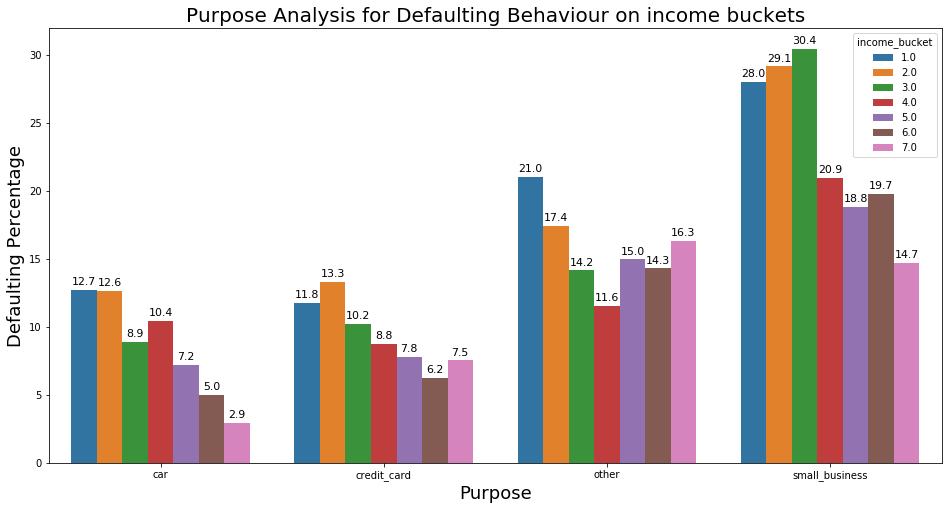

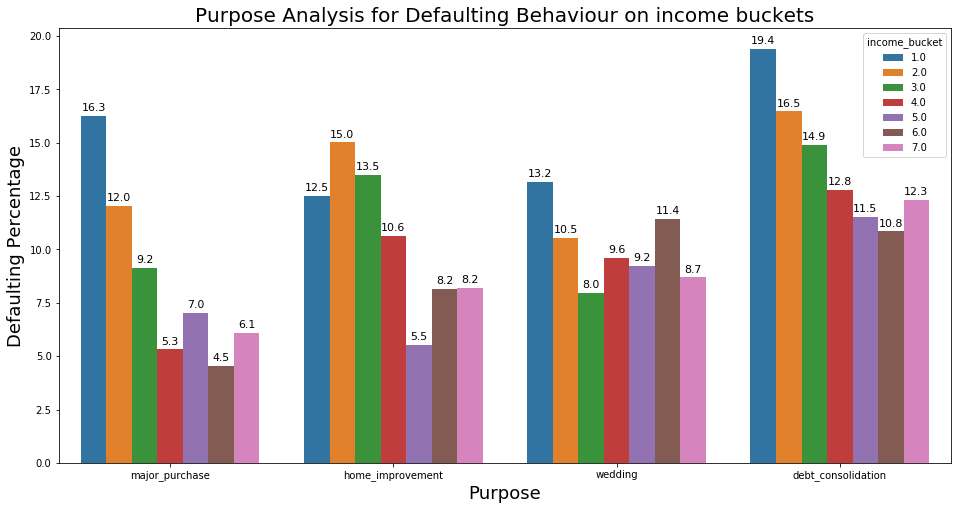

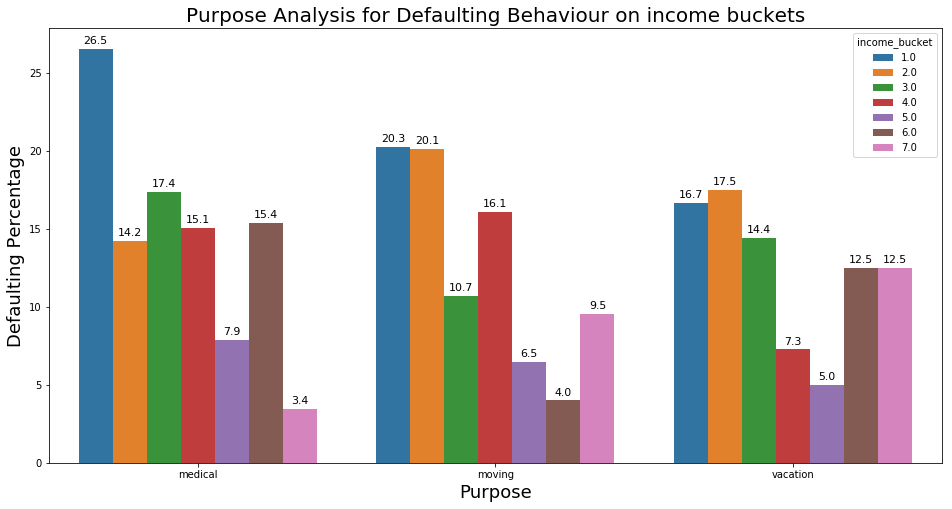

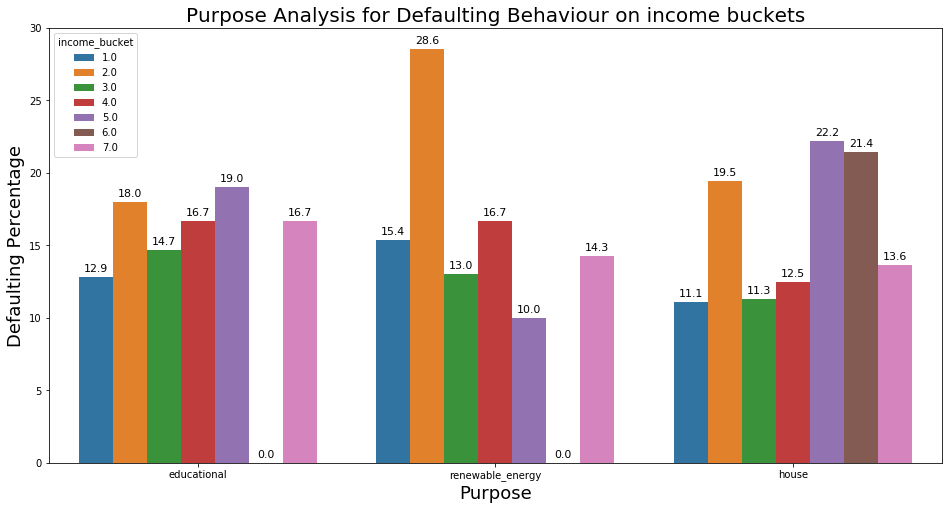

In [197]:

##drawing a neat barplot of defaulting percentages for each income_bucket within a purpose

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[0:4])],"purpose","income_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on income buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[4:8])],"purpose","income_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on income buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[8:11])],"purpose","income_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on income buckets",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[11:])],"purpose","income_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on income buckets",perc_fontsize=11,
                                           perc_precision=1)






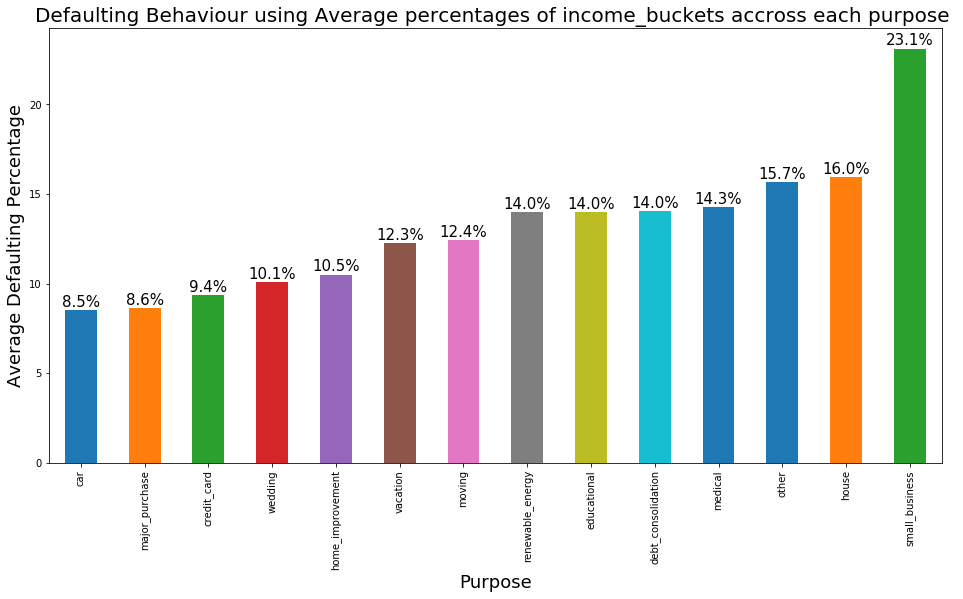

Difference between min and max avg.defaulting percentages = 14.57


In [198]:
## lets draw a mean defaulting percentage of all the income_buckets in a purpose 
plot_loan_default_percentage_bivariate(def_percs,"purpose",xlabel="Purpose",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of income_buckets accross each purpose ",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)

#storing variation in the defaulter map
default_map["purpose_income"] = round(defaulting_range_bivariate(def_percs,"purpose"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"purpose"),2))


- The definiton of Average defaulting, we will get the percentage of defaulters per income_bucket and further average for all of them in each purpose.
- **small businesses** tend to **default more** on an average accross all the income buckets with 23% average.
- **car** loan borrowers **default less** on an average on all the income ranges
- In the field of **Medical**, we see that the least income bucket people that is **0-5K** have the **highest defaulting** percentage
- In **small businesses** we see that the defaulting percentage **increases** for income **0-15K** and then goes on decreasing in further income buckets. This might be due to higher income.
- In **renewable energy** we observe that borrowers with income in **5-10K** range **default way more** than other income brackets.
- Even here observe that **debt_consolidation is way  below** few other purposes in defaulting rate based on income.

### iii) interest v/s defaulting in each purpose

purpose
car                   11.88
credit_card           13.35
debt_consolidation    14.26
educational           12.53
home_improvement      13.19
house                 15.46
major_purchase        13.08
medical               13.36
moving                11.83
other                 13.49
renewable_energy      11.06
small_business        14.11
vacation              11.49
wedding               13.35
Name: int_rate, dtype: float64


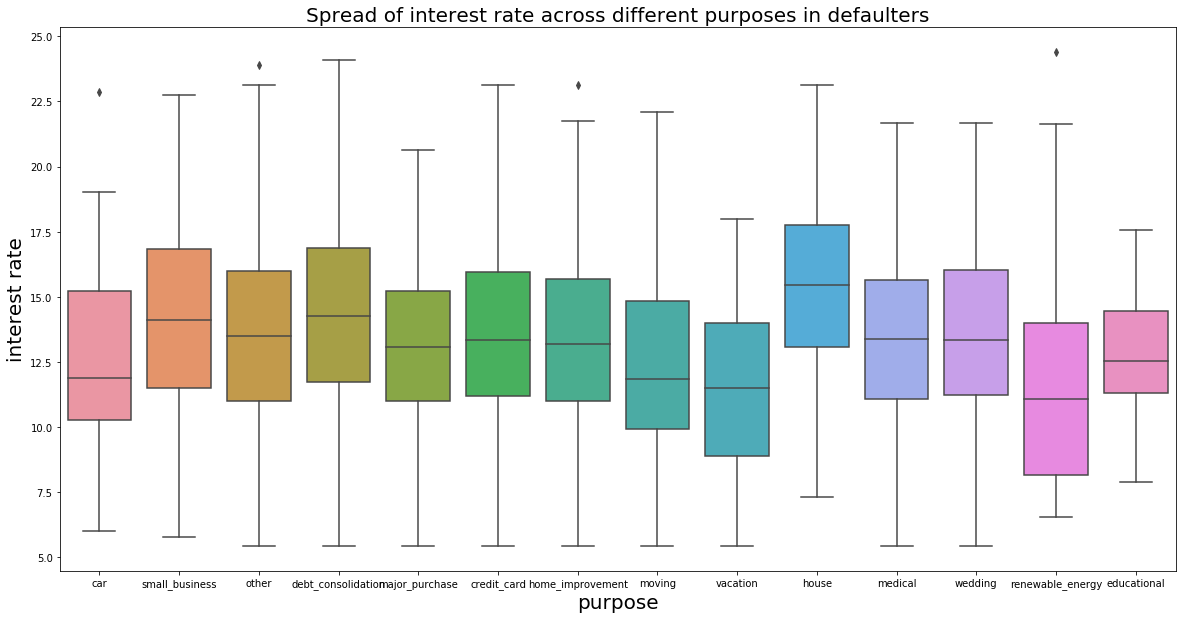

purpose
car                   10.00
credit_card           11.12
debt_consolidation    11.86
educational           11.49
home_improvement      10.95
house                 11.48
major_purchase        10.38
medical               10.99
moving                11.05
other                 11.36
renewable_energy      10.99
small_business        12.21
vacation              10.59
wedding               11.49
Name: int_rate, dtype: float64


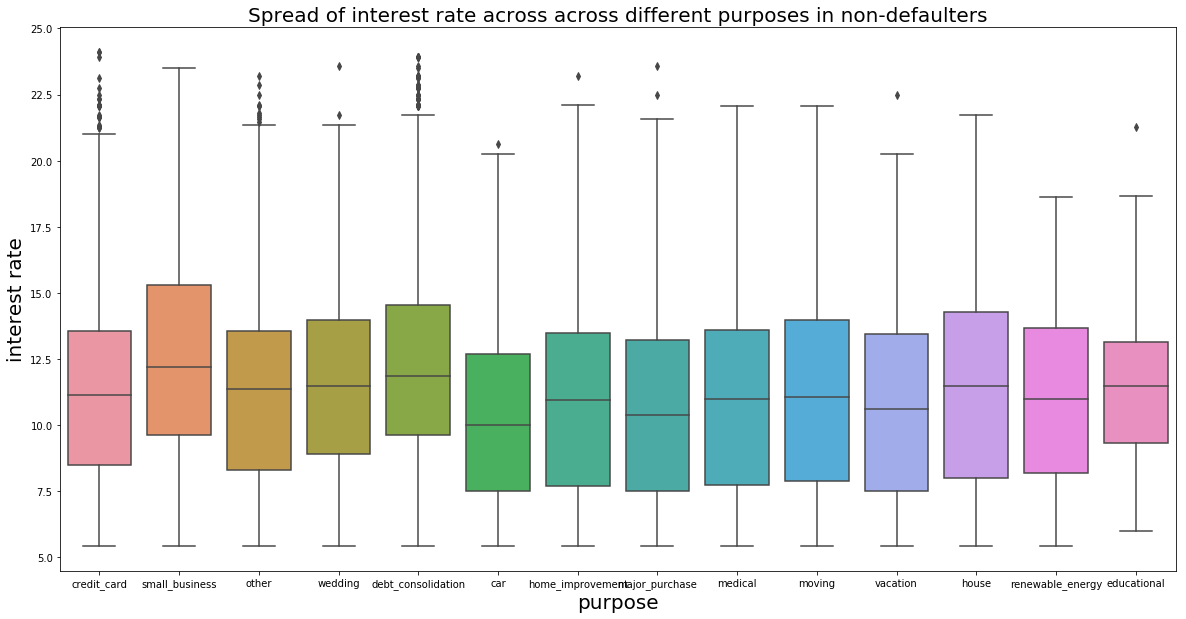

In [199]:
## lets plot box plots across each purpose in defaulters for percentage of interest
medians = round(def_df.groupby(['purpose'])['int_rate'].median(),2)
print(medians)

plt.figure(figsize=(20,10))
sns.boxplot(data=def_df,x="purpose",y="int_rate")
plt.title("Spread of interest rate across different purposes in defaulters",fontsize=20)
plt.xlabel("purpose",fontsize=20)
plt.ylabel("interest rate",fontsize=20) 
plt.show()


nmedians = round(ndef_df.groupby(['purpose'])['int_rate'].median(),2)
print(nmedians)

## lets plot box plots across each purpose in non-defaulters for percentage of interest
plt.figure(figsize=(20,10))
sns.boxplot(data=ndef_df,x="purpose",y="int_rate")
plt.title("Spread of interest rate across across different purposes in non-defaulters",fontsize=20)
plt.xlabel("purpose",fontsize=20)
plt.ylabel("interest rate",fontsize=20) 
plt.show()

- We see that among the defaulters, **median interest rate for house was 15.46%** but amongst the non-defaulters it was around **11%**, which significantly says due to **high interest rate** on house loans, there were **more defaulters**.
- Lets plot the median interest rates below for more insight

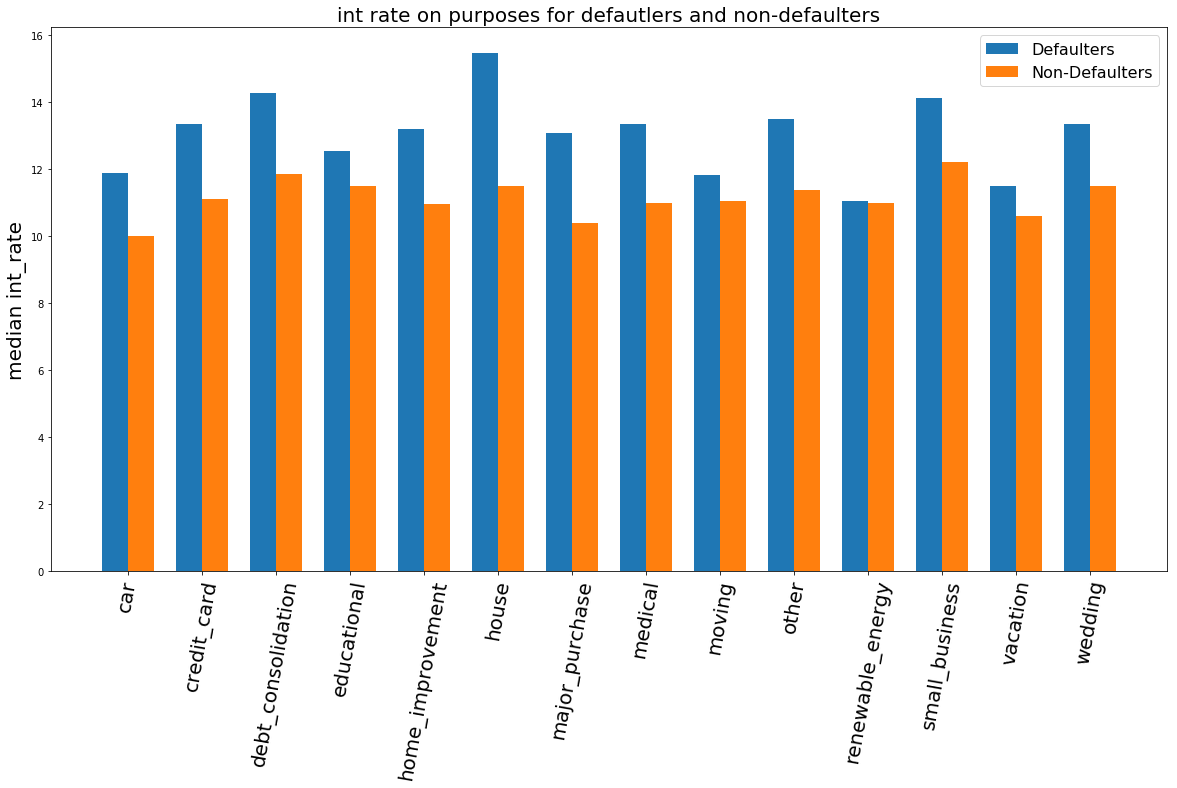

In [200]:
medians = round(def_df.groupby(['purpose'])['int_rate'].median(),2)
nmedians = round(ndef_df.groupby(['purpose'])['int_rate'].median(),2)

x = medians.to_frame()
y = nmedians.to_frame()
xy = pd.merge(x,y,how="inner",left_index=True,right_index=True)


purposes = xy.index

defaulter_median = xy.int_rate_x
ndefaulter_median = xy.int_rate_y

x = np.arange(len(purposes))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,10))
rects1 = ax.bar(x - width/2, defaulter_median, width, label='Defaulters')
rects2 = ax.bar(x + width/2, ndefaulter_median, width, label='Non-Defaulters')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('median int_rate',size=20)
ax.set_title('int rate on purposes for defautlers and non-defaulters',size=20)
ax.set_xticks(x)
ax.set_xticklabels(purposes,size = 20,rotation = 80)
ax.legend(prop={'size': 16})


plt.show()

- We can clearly see above that **defaulters are usually having higher median interest rates** in almost all the purpose categories, which can be a deciding factor as well. Especially in house loans, we can see it more evidently.

#### Now if we check the interest rates categorically, lets see what insight we might get

In [201]:
df.interest_bucket.value_counts()

Normal    18360
Low       12031
High       7938
Name: interest_bucket, dtype: int64

In [202]:
##creating a new dataframe with defaulting percentages in each interest_bucket within a purpose

def_percs = loan_default_percentage_bivariate("purpose","interest_bucket")
def_percs

,purpose,interest_bucket,count1,sum1,def_perc,ndef_perc
16,house,Low,120,4,3.333333,96.666667
40,wedding,Low,296,10,3.378378,96.621622
19,major_purchase,Low,946,42,4.439746,95.560254
4,credit_card,Low,1695,81,4.778761,95.221239
13,home_improvement,Low,1108,55,4.963899,95.036101
1,car,Low,700,36,5.142857,94.857143
22,medical,Low,250,16,6.400000,93.600000
10,educational,Low,93,6,6.451613,93.548387
7,debt_consolidation,Low,4751,313,6.588087,93.411913
28,other,Low,1250,105,8.400000,91.600000


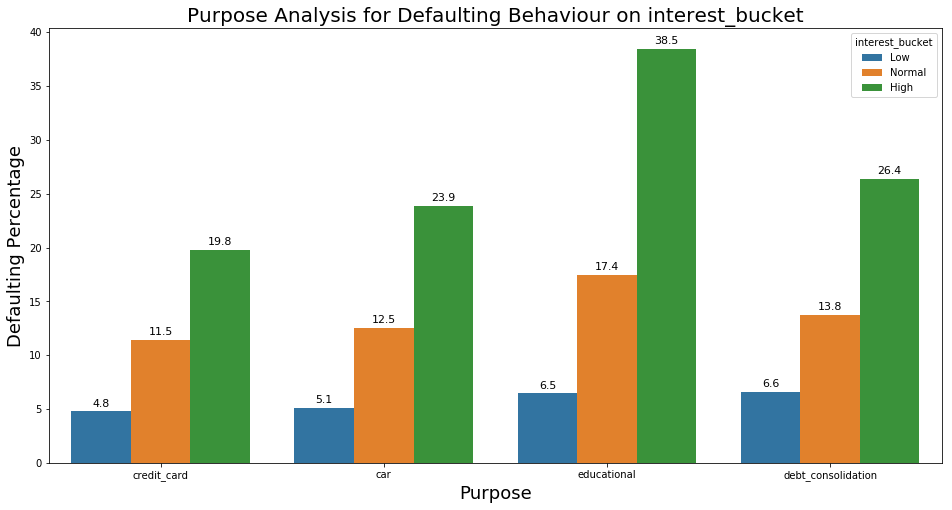

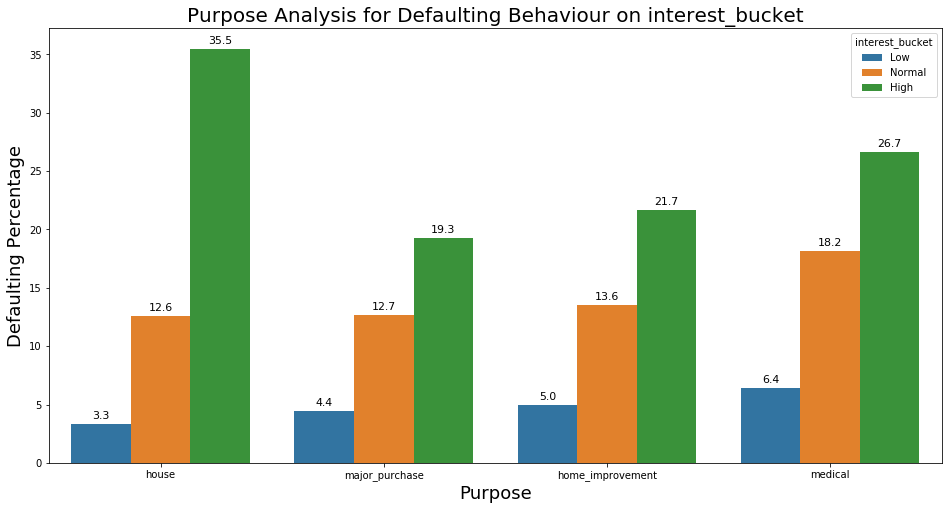

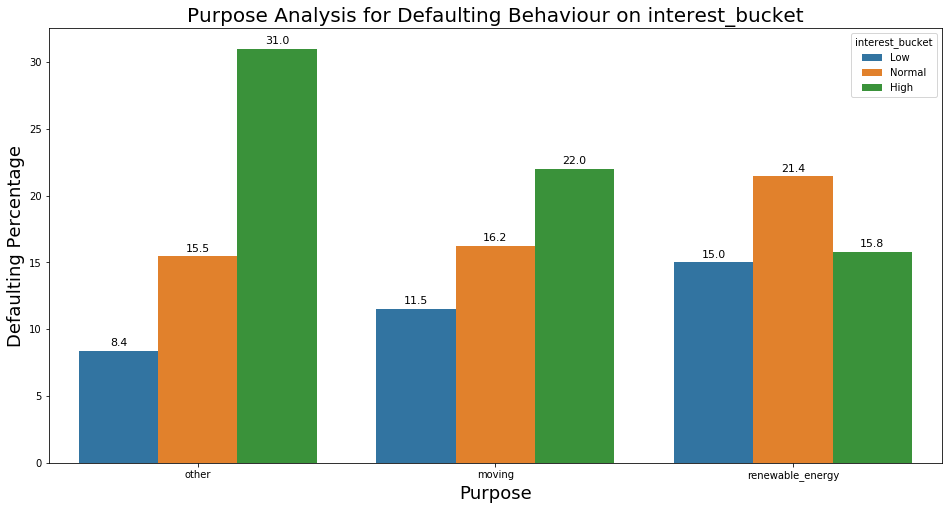

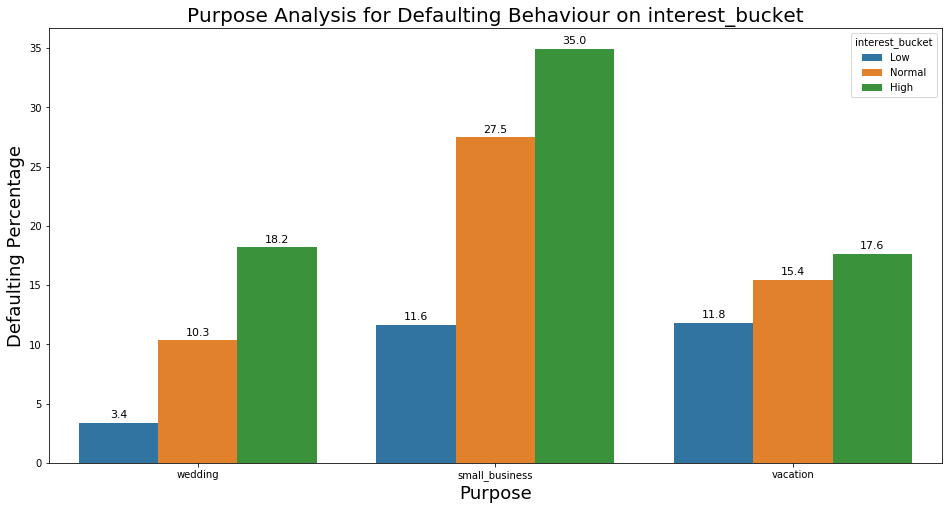

In [203]:
##drawing a neat barplot of defaulting percentages for each interest_bucket within a purpose

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[0:4])],"purpose","interest_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[4:8])],"purpose","interest_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[8:11])],"purpose","interest_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[11:])],"purpose","interest_bucket",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)

##### Apart from renewable energy we observe that higher interest buckets have higher default percentages. And low interest rates are having less default percentages everywhere

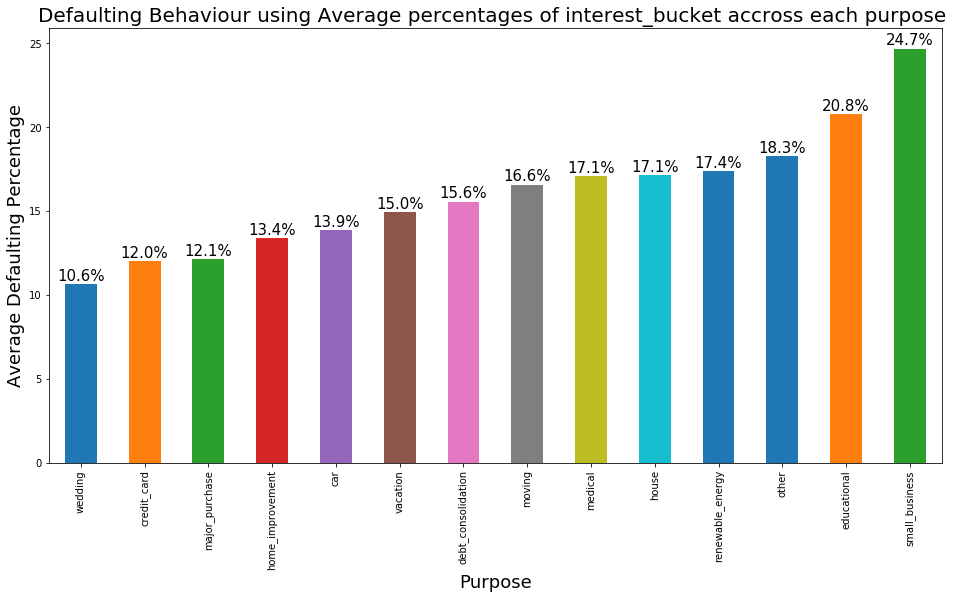

Difference between min and max avg.defaulting percentages = 14.06


In [204]:
## lets draw a mean defaulting percentage of all the interest_bucket in a purpose 
plot_loan_default_percentage_bivariate(def_percs,"purpose",xlabel="Purpose",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of interest_bucket accross each purpose ",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)

#storing variation in the defaulter map
default_map["purpose_interest"] = round(defaulting_range_bivariate(def_percs,"purpose"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"purpose"),2))

- We can see above that there is around **14.1%** difference between the least average and the highest average default percentage based on the interest buckets.
- We can see that **small businesses end up with higher default rates and wedding ones with the lower default rates**

### iv) verification v/s defaulting in each purpose

In [205]:
df.verification_status.value_counts()

Not Verified       16505
Verified           12175
Source Verified     9649
Name: verification_status, dtype: int64

In [206]:
##creating a new dataframe with defaulting percentages in each verification_status within a purpose

def_percs = loan_default_percentage_bivariate("purpose","verification_status")
def_percs

,purpose,verification_status,count1,sum1,def_perc,ndef_perc
39,wedding,Not Verified,366,23,6.284153,93.715847
0,car,Not Verified,786,64,8.142494,91.857506
3,credit_card,Not Verified,2234,192,8.594449,91.405551
18,major_purchase,Not Verified,1031,91,8.826382,91.173618
40,wedding,Source Verified,286,28,9.790210,90.209790
10,educational,Source Verified,30,3,10.000000,90.000000
31,renewable_energy,Source Verified,39,4,10.256410,89.743590
26,moving,Verified,133,14,10.526316,89.473684
19,major_purchase,Source Verified,588,64,10.884354,89.115646
20,major_purchase,Verified,515,57,11.067961,88.932039


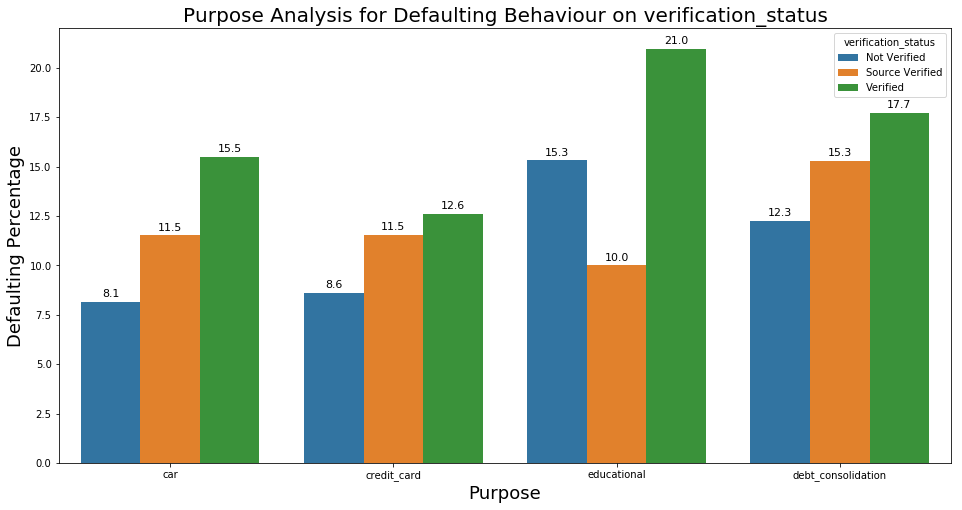

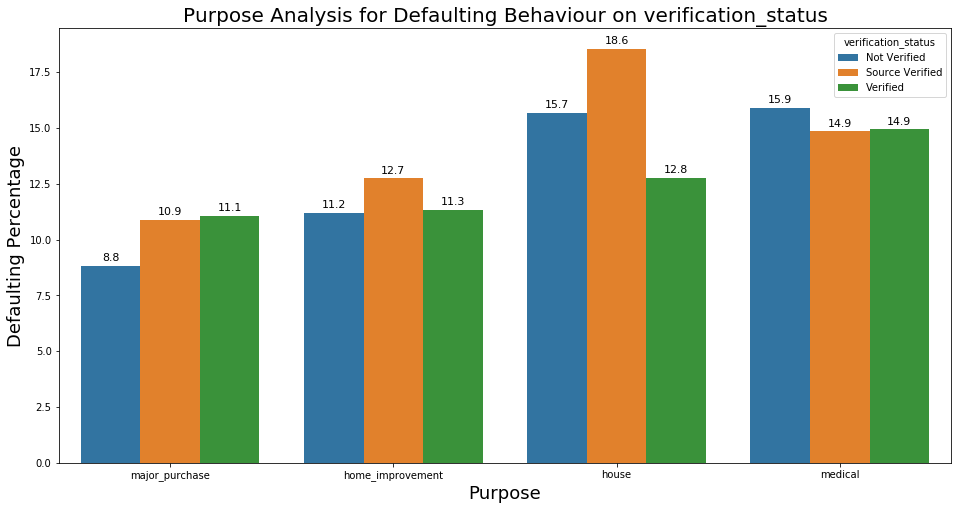

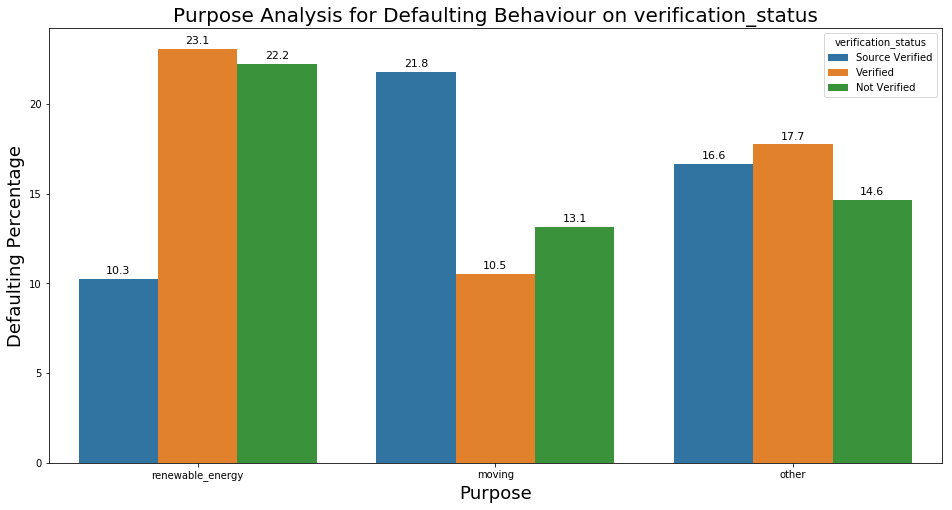

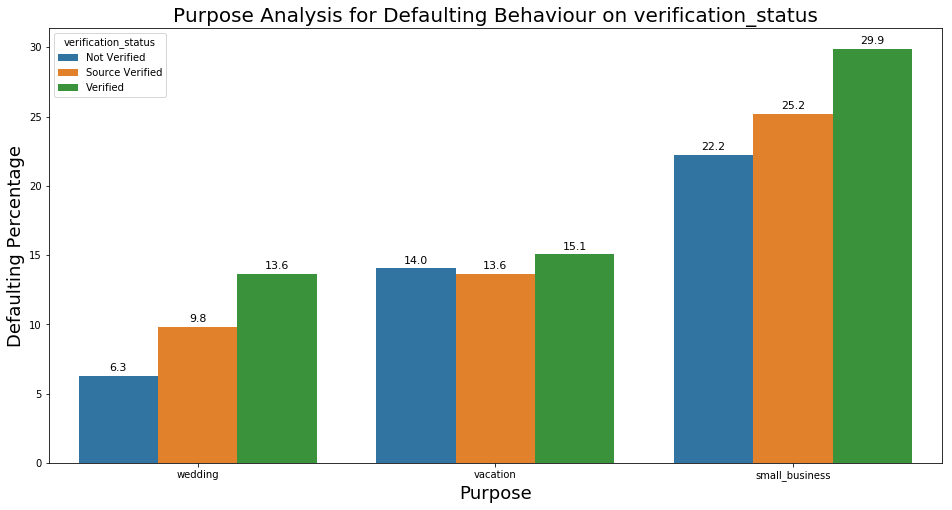

In [207]:
##drawing a neat barplot of defaulting percentages for each verification_status within a purpose

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[0:4])],"purpose","verification_status",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on verification_status",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[4:8])],"purpose","verification_status",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on verification_status",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[8:11])],"purpose","verification_status",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on verification_status",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.purpose.isin(purposes[11:])],"purpose","verification_status",xlabel="Purpose",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Purpose Analysis for Defaulting Behaviour on verification_status",perc_fontsize=11,
                                           perc_precision=1)


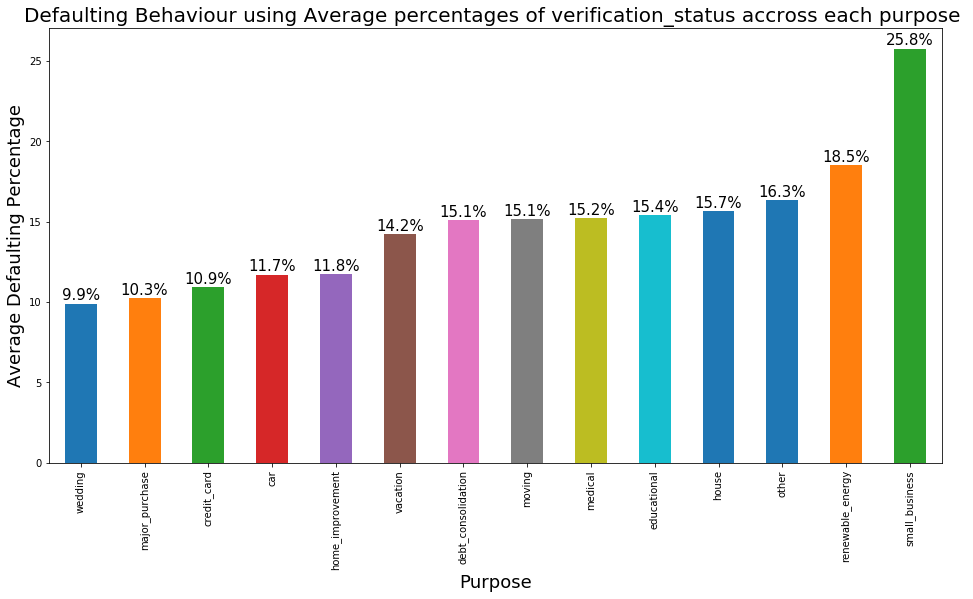

Difference between min and max avg.defaulting percentages = 15.86


In [208]:
## lets draw a mean defaulting percentage of all the verification_status in a purpose 
plot_loan_default_percentage_bivariate(def_percs,"purpose",xlabel="Purpose",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of verification_status accross each purpose ",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)


#storing variation in the defaulter map
default_map["purpose_verification"] = round(defaulting_range_bivariate(def_percs,"purpose"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"purpose"),2))

- In **car,debt_consolidation,credit_card,small_businesses,educational** we see **more default percentage** in **verified** borrowers than non-verified borrowers.
- On an average, defaulting percentage is **less in wedding purpose** around **10%** for all the types of verification_status and **highest for small businesses** which is around **25.8%**
- In **moving purpose**, we see there is **lot of defaulting perecentage in Source Verified type** around 21.8%.

## 3) Income Bucket analysis

### i) Income v/s loan bucket on defaulting

In [209]:
df.income_bucket.value_counts()

2.0    12750
3.0    11607
4.0     6010
5.0     2682
1.0     2504
7.0     1482
6.0     1294
Name: income_bucket, dtype: int64

In [210]:
##creating a new dataframe with defaulting percentages in each loan_amnt_bucket within a income_bucket

def_percs = loan_default_percentage_bivariate("income_bucket","loan_amnt_bucket")
def_percs

,income_bucket,loan_amnt_bucket,count1,sum1,def_perc,ndef_perc
35,6.0,4,170,10,5.882353,94.117647
25,5.0,1,318,20,6.289308,93.710692
26,5.0,2,665,46,6.917293,93.082707
34,6.0,3,281,20,7.117438,92.882562
39,7.0,1,110,8,7.272727,92.727273
27,5.0,3,573,46,8.027923,91.972077
18,4.0,1,861,70,8.130081,91.869919
41,7.0,3,273,23,8.424908,91.575092
37,6.0,6,78,7,8.974359,91.025641
19,4.0,2,1708,154,9.016393,90.983607


In [211]:
income_buckets = list(df.income_bucket.unique())

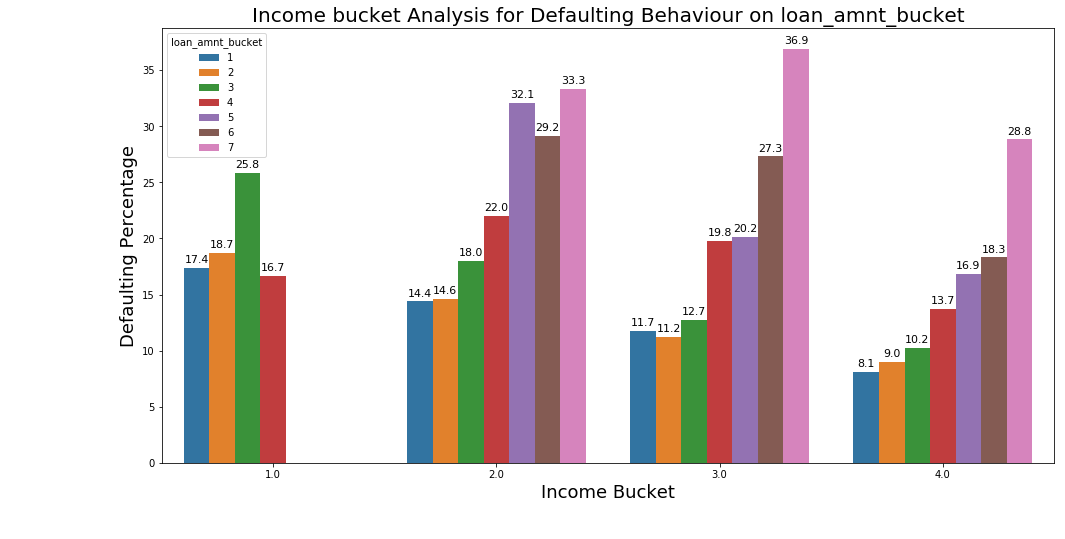

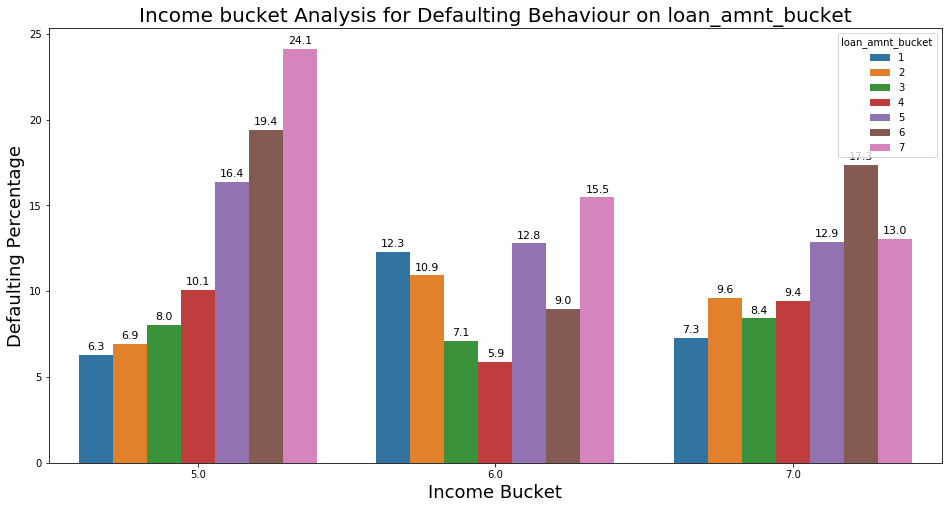

In [212]:
##drawing a neat barplot of defaulting percentages for each loan_amnt_bucket within a income_bucket

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.income_bucket.isin(income_buckets[0:4])],"income_bucket","loan_amnt_bucket",
                                       xlabel="Income Bucket",ylabel="Defaulting Percentage",figsize=(16,8),
                                       plot_title="Income bucket Analysis for Defaulting Behaviour on loan_amnt_bucket",
                                       perc_fontsize=11,perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.income_bucket.isin(income_buckets[4:])],"income_bucket","loan_amnt_bucket",
                                       xlabel="Income Bucket",ylabel="Defaulting Percentage",figsize=(16,8),
                                       plot_title="Income bucket Analysis for Defaulting Behaviour on loan_amnt_bucket",
                                       perc_fontsize=11,perc_precision=1)


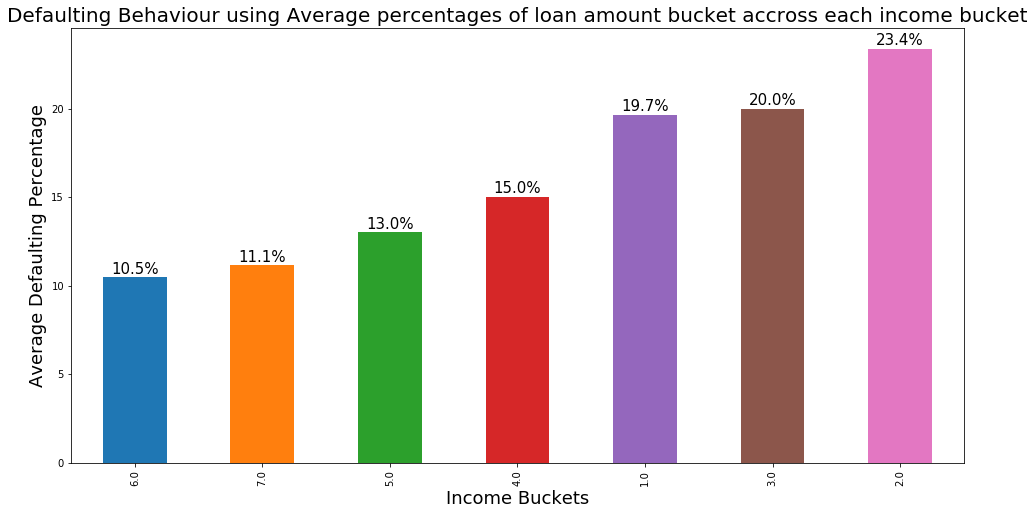

Difference between min and max avg.defaulting percentages = 12.88


In [213]:
## lets draw a mean defaulting percentage of all the loan_amnt_buckets in a income_bucket 
plot_loan_default_percentage_bivariate(def_percs,"income_bucket",xlabel="Income Buckets",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of loan amount bucket accross each income bucket",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)

#storing variation in the defaulter map
default_map["income_loanamnt"] = round(defaulting_range_bivariate(def_percs,"income_bucket"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"income_bucket"),2))

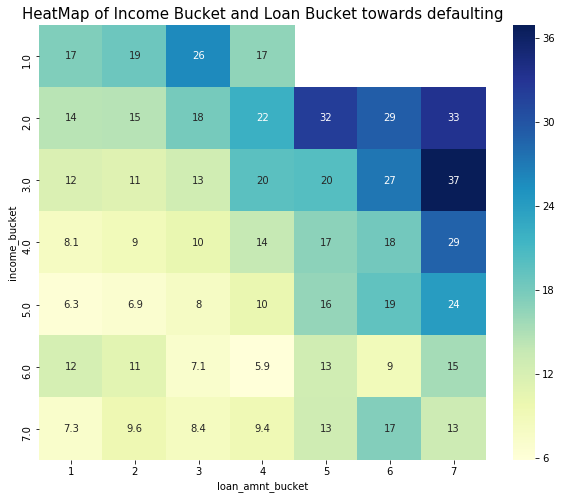

In [214]:
## lets also get a heatmap for better understanding
plt.figure(figsize=(10,8))
sns.heatmap(def_percs.pivot('income_bucket','loan_amnt_bucket','def_perc'),annot=True,cmap="YlGnBu")
plt.title("HeatMap of Income Bucket and Loan Bucket towards defaulting",size=15)
plt.show()

- We see that under each income bucket, as the **loan amount increases** generally in most of them the **defaulting percentage is also increasing**. Especially is observed in income brackets **2,3,4,5**
- If we look at **income bucket 1**(0-5000 annual income) , we see that **most of the defaulters lie in loan-amount-bucket of 3(10000-15000)**.
- On an average, we see that **income bracket 6(125000-150000) has the least average defaulting percentage** done over all loan_amount brackets.
- Borrowers with income **5000-10000** are having the **highest defaulting percentage of 23.4%**
- As the income bracket increases after 125000 INR, the trend in the defaulting among the loan_buckets is not so evidently pleasing. But based on the heatmap we can see that thicker colours are there in dark blue around income bucket of two and loan_amnt_bucket of 5,6,7
- Recorded 37% defaulting in income bucket of 50-75K and loan_amnt in range of 30-35K 

### ii) tenure paid across all the income buckets V/S Defaulting Behaviour

### since writing describe across each sector is little over data to read, lets simplify by looking at the box plots

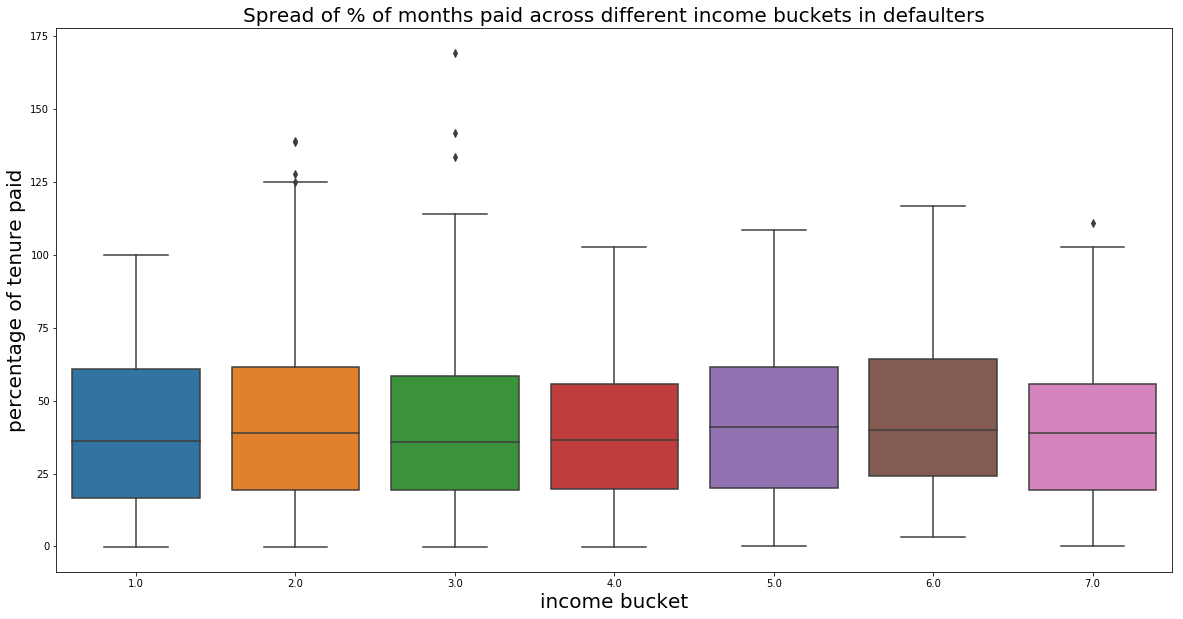

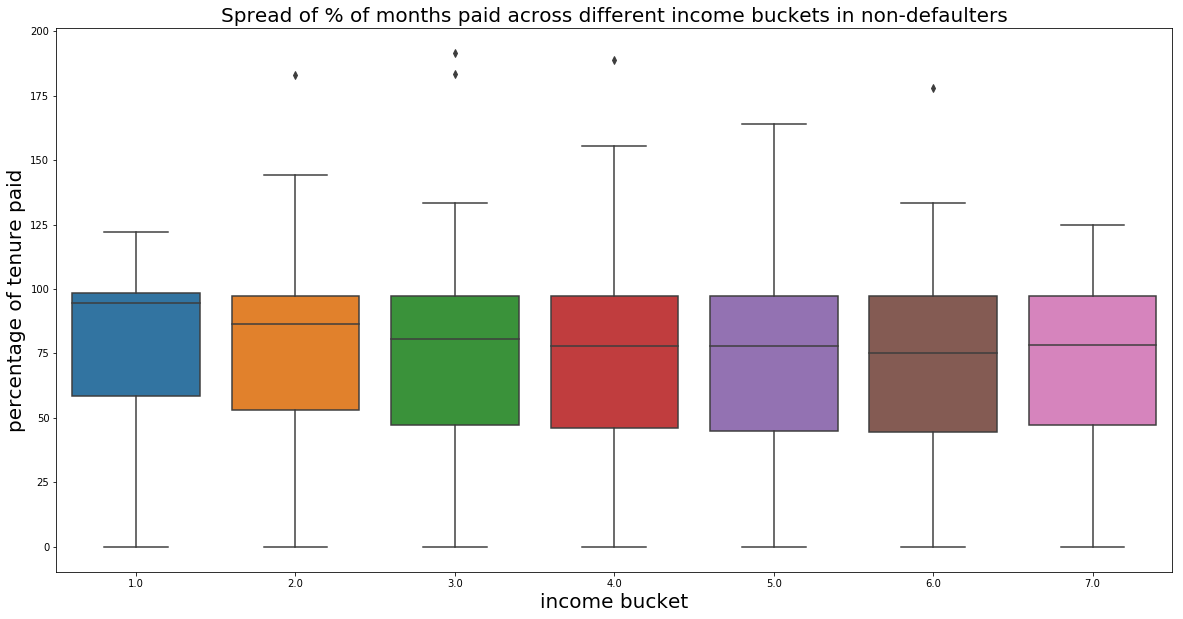

In [215]:
## lets plot box plots across each income bucket in defaulters for percentage of tenure paid
plt.figure(figsize=(20,10))
sns.boxplot(data=def_df,x="income_bucket",y="tenure_paid")
plt.title("Spread of % of months paid across different income buckets in defaulters",fontsize=20)
plt.xlabel("income bucket",fontsize=20)
plt.ylabel("percentage of tenure paid",fontsize=20) 
plt.show()


## lets plot box plots across each income bucket in non-defaulters for percentage of tenure paid
plt.figure(figsize=(20,10))
sns.boxplot(data=ndef_df,x="income_bucket",y="tenure_paid")
plt.title("Spread of % of months paid across different income buckets in non-defaulters",fontsize=20)
plt.xlabel("income bucket",fontsize=20)
plt.ylabel("percentage of tenure paid",fontsize=20) 
plt.show()

- We can clearly see that **Median tenure paid percentage of defaulters is almost same across all income brackets**, somewhere near **37%**, but where as in **non-defaulters** its **greater than 75%**
- Among the **non-defaulters**, the income bracket **1(0-25000) has higher median tenure paid percentage**. 
- We are seeing whiskers above 100% because people would have paid for more months than their tenure, due to lot of factors.

### iii) principal_amount percentage across all the income buckets V/S Defaulting Behaviour

In [216]:
##lets see medians of different buckets of income for total principal perc paid
medians = def_df.groupby("income_bucket")["total_prncp_paid_perc"].median().to_frame()
medians


,total_prncp_paid_perc
income_bucket,
1.0,35.49
2.0,37.48
3.0,33.12
4.0,34.98
5.0,41.42
6.0,49.51
7.0,33.65


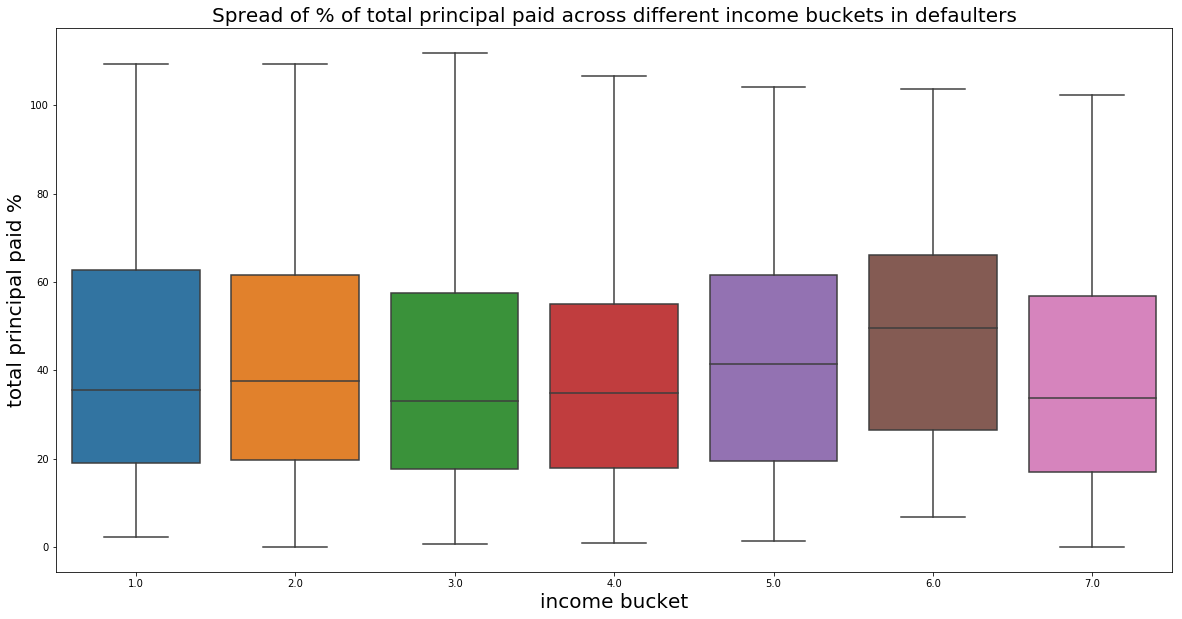

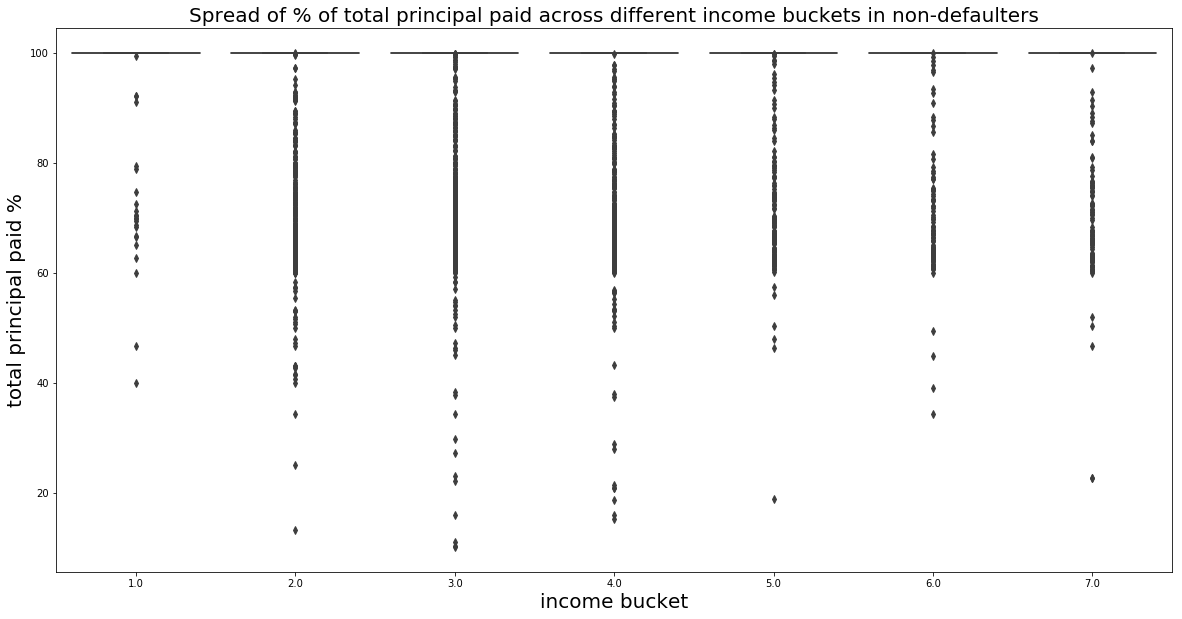

In [217]:
## lets plot box plots across each income bucket in defaulters for percentage of tenure paid
plt.figure(figsize=(20,10))
sns.boxplot(data=def_df,x="income_bucket",y="total_prncp_paid_perc")
plt.title("Spread of % of total principal paid across different income buckets in defaulters",fontsize=20)
plt.xlabel("income bucket",fontsize=20)
plt.ylabel("total principal paid %",fontsize=20) 
plt.show()


## lets plot box plots across each income bucket in non-defaulters for percentage of tenure paid
plt.figure(figsize=(20,10))
sns.boxplot(data=ndef_df,x="income_bucket",y="total_prncp_paid_perc")
plt.title("Spread of % of total principal paid across different income buckets in non-defaulters",fontsize=20)
plt.xlabel("income bucket",fontsize=20)
plt.ylabel("total principal paid %",fontsize=20) 
plt.show()

- We can clearly see that median of all the **non defaulters** in all the income buckets is **100% principal paid**
- In **defaulters** we can observe that, apart from income bracket **5(41%) and 6(49%)** who are usually paying more than other income brackets, **all others** have their median paid percentage near **~35%**, which is **lot lesser** to what non-defaulters are paying. 

## 3) employment analysis

### i) employment length v/s loan_bucket analysis for defaulting

In [218]:
##creating a new dataframe with defaulting percentages in each loan_amnt_bucket within a emp_length

def_percs = loan_default_percentage_bivariate("emp_length","loan_amnt_bucket")
def_percs

,emp_length,loan_amnt_bucket,count1,sum1,def_perc,ndef_perc
6,1 year,7,30,2,6.666667,93.333333
63,9 years,1,238,22,9.243697,90.756303
15,2 years,2,1533,165,10.763209,89.236791
47,6 years,6,46,5,10.869565,89.130435
57,8 years,2,473,52,10.993658,89.006342
35,5 years,1,717,79,11.018131,88.981869
65,9 years,3,290,32,11.034483,88.965517
22,3 years,2,1382,153,11.070912,88.929088
61,8 years,6,35,4,11.428571,88.571429
29,4 years,2,1134,132,11.640212,88.359788


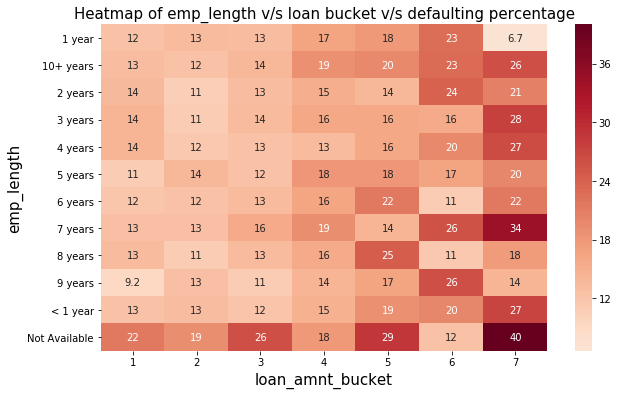

In [219]:
##drawing a heatmap to understand defaulting percentage (0 being white and red being highest)
plt.figure(figsize = (10,6))
sns.heatmap(data= def_percs.pivot("emp_length","loan_amnt_bucket","def_perc"),annot=True,center=1,cmap="RdBu_r")
plt.title("Heatmap of emp_length v/s loan bucket v/s defaulting percentage",size=15)
plt.xlabel("loan_amnt_bucket",size = 15)
plt.ylabel("emp_length",size = 15)
plt.show()

- Borrowers with **one year** experience taking the loan amount in the **highest bucket** seem to **default less around 6.7%**
- We can observe **more defaulting in 30000-35000** loan bracket(7) across all emp_length
- Amongst the emp_length **NA are defaulting more** across all the loan_amnt_buckets.

### ii) employment length v/s interest_bucket analysis for defaulting

In [220]:
## getting categories in emp_length
emp_lengths = list(df.emp_length.unique())
emp_lengths

['10+ years',
 '< 1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '1 year',
 '6 years',
 '2 years',
 '7 years',
 'Not Available']

In [221]:
##creating a new dataframe with defaulting percentages in each loan_amnt_bucket within a emp_length

def_percs = loan_default_percentage_bivariate("emp_length","interest_bucket")
def_percs

,emp_length,interest_bucket,count1,sum1,def_perc,ndef_perc
22,7 years,Low,503,25,4.970179,95.029821
7,2 years,Low,1245,66,5.301205,94.698795
10,3 years,Low,1187,65,5.475990,94.524010
16,5 years,Low,994,55,5.533199,94.466801
19,6 years,Low,690,40,5.797101,94.202899
13,4 years,Low,1001,62,6.193806,93.806194
1,1 year,Low,903,57,6.312292,93.687708
4,10+ years,Low,2709,173,6.386120,93.613880
28,9 years,Low,400,26,6.500000,93.500000
25,8 years,Low,486,32,6.584362,93.415638


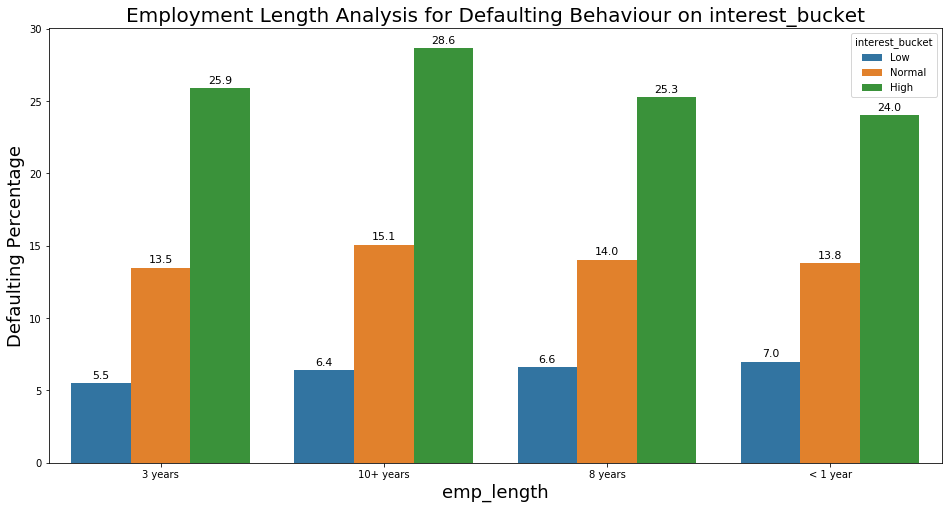

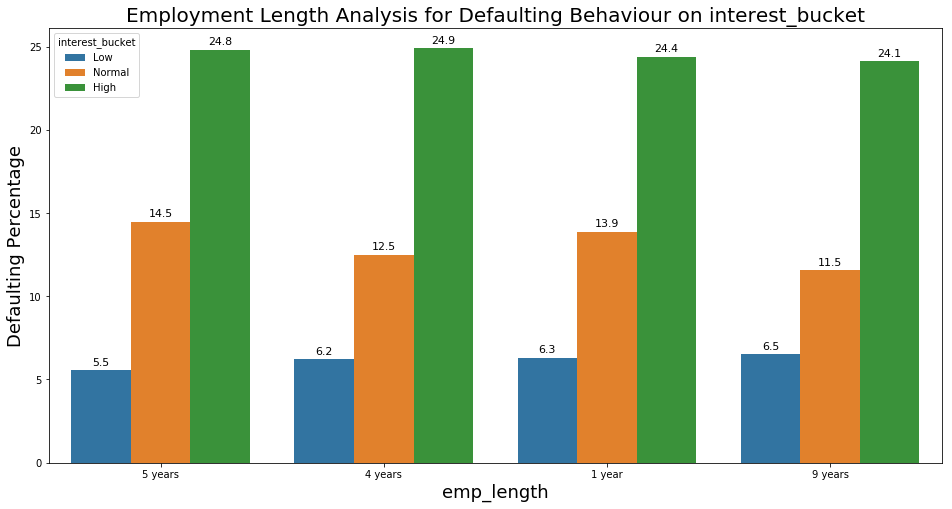

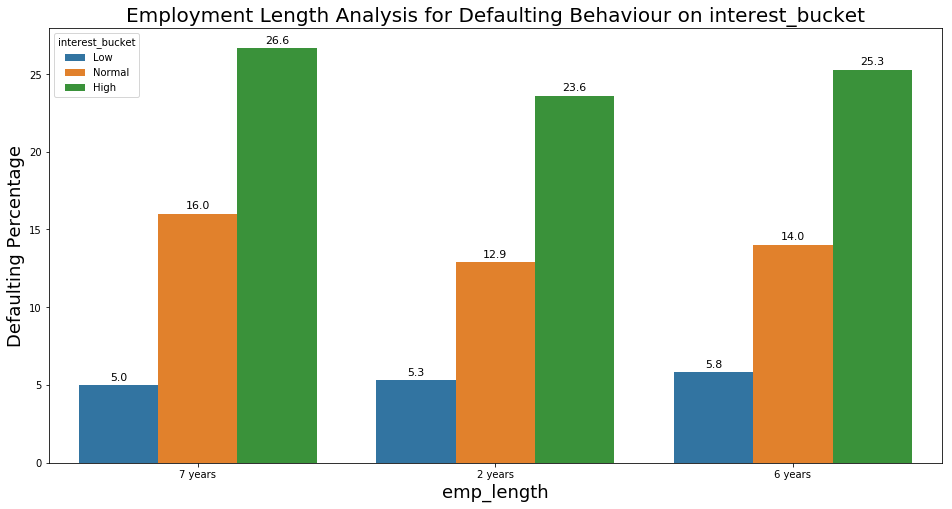

In [222]:
##drawing a neat barplot of defaulting percentages for each interest_bucket within a purpose

###lets call it over groups of purposes


plot_loan_default_percentage_bivariate(def_percs[def_percs.emp_length.isin(emp_lengths[0:4])],"emp_length","interest_bucket",xlabel="emp_length",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Employment Length Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.emp_length.isin(emp_lengths[4:8])],"emp_length","interest_bucket",xlabel="emp_length",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Employment Length Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


plot_loan_default_percentage_bivariate(def_percs[def_percs.emp_length.isin(emp_lengths[8:11])],"emp_length","interest_bucket",xlabel="emp_length",ylabel="Defaulting Percentage",figsize=(16,8),
                                           plot_title="Employment Length Analysis for Defaulting Behaviour on interest_bucket",perc_fontsize=11,
                                           perc_precision=1)


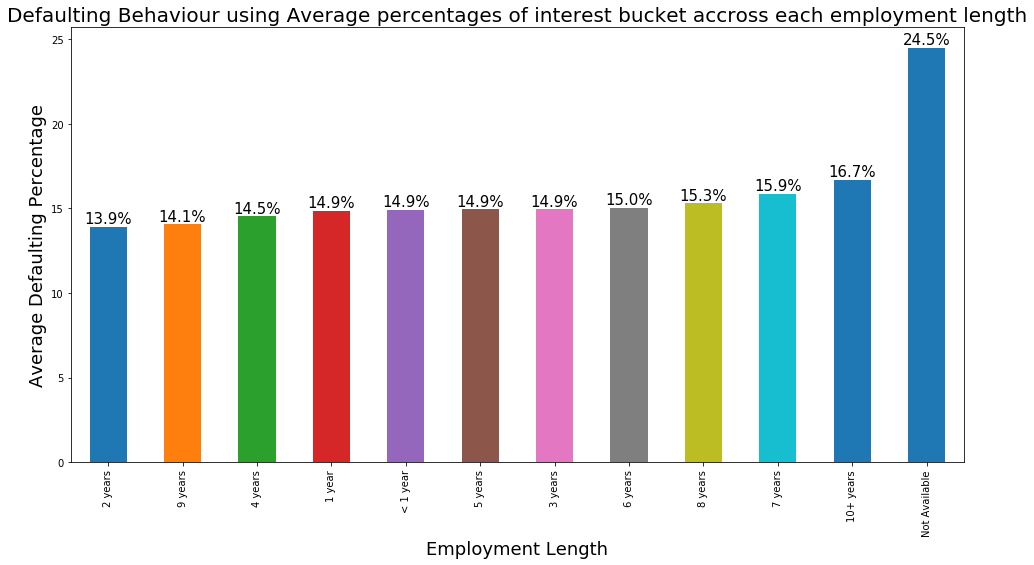

Difference between min and max avg.defaulting percentages = 10.54


In [223]:
## lets draw a mean defaulting percentage of all the interest_buckets in a emp_length 
plot_loan_default_percentage_bivariate(def_percs,"emp_length",xlabel="Employment Length",ylabel="Average Defaulting Percentage", 
                                       plottype="meanplot",figsize=(16,8),
                                       plot_title="Defaulting Behaviour using Average percentages of interest bucket accross each employment length",
                                       perc_fontsize=15,show_perc_label=True,perc_precision=1)

#storing variation in the defaulter map
default_map["emplength_interest"] = round(defaulting_range_bivariate(def_percs,"emp_length"),2)
print("Difference between min and max avg.defaulting percentages =",round(defaulting_range_bivariate(def_percs,"emp_length"),2))

- We see that people in **low interest bucket** tend to default less in all the employment lengths
- We also see that **Not Available** category tend to default **higher** than any other categories. 
- The variation in average defaulting percentage is around **10.6%** which is a good metric to decide upon.

### iii) employment length v/s income_bucket analysis for defaulting

In [224]:
##creating a new dataframe with defaulting percentages in each income_bucket within a emp_length

def_percs = loan_default_percentage_bivariate("emp_length","income_bucket")
def_percs

,emp_length,income_bucket,count1,sum1,def_perc,ndef_perc
81,Not Available,5.0,25,0,0.000000,100.000000
82,Not Available,6.0,7,0,0.000000,100.000000
6,1 year,7.0,96,5,5.208333,94.791667
67,9 years,5.0,103,6,5.825243,94.174757
54,7 years,6.0,44,3,6.818182,93.181818
32,4 years,5.0,216,15,6.944444,93.055556
26,3 years,6.0,132,10,7.575758,92.424242
17,2 years,4.0,531,43,8.097928,91.902072
69,9 years,7.0,54,5,9.259259,90.740741
47,6 years,6.0,64,6,9.375000,90.625000


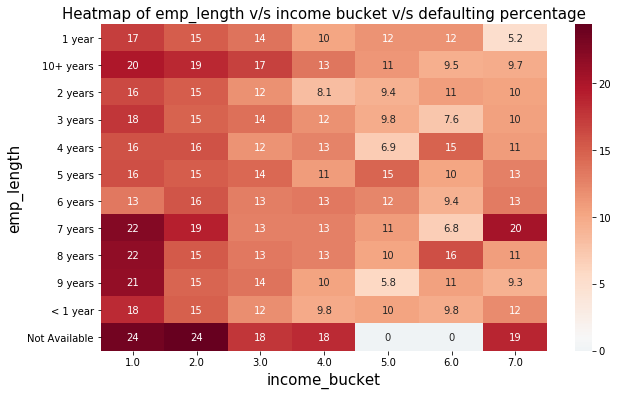

In [225]:
##drawing a heatmap to understand defaulting percentage (0 being white and red being highest)
plt.figure(figsize = (10,6))
sns.heatmap(data= def_percs.pivot("emp_length","income_bucket","def_perc"),annot=True,center=1,cmap="RdBu_r")
plt.title("Heatmap of emp_length v/s income bucket v/s defaulting percentage",size=15)
plt.xlabel("income_bucket",size = 15)
plt.ylabel("emp_length",size = 15)
plt.show()

- borrowers with income in 1st bucket i.e., **0-5000** are having **high default percentage** across most of the employment years.
- Since 7th income bracket is >150000 and if we look **only below 150000**, we observe that, as **income increases** the **defaulting rate is decreasing**. Redness of the heatmap is evidently gradient
- Highest defaulting rate is seen in NA, interestingly we see **0% defaulting for income brackets 5 and 6** .

## Automating Feature selection
#### <font color='Green'>The criteria of selecting the top features is to get the difference between the maximum and minimum defaulting percentages grouped by the variable name. Then followed by checking the variables which have high variation in these percentages which make more insightful and easier to the lending club to decide on the loan borrower.</font>

In [260]:
##converting the default variation dictionary to a dataframe
auto = pd.DataFrame(default_map,index = [0])
auto = auto.T
auto = auto.rename(columns={0:"default_variance"})
auto = auto.sort_values("default_variance",ascending=False)

In [261]:
## bivariate variables are separated by underscore. variable1_varaiable2
auto

,default_variance
delinq_2yrs,50.00
sub_grade,45.11
grade_subgrades,28.62
grade,27.00
pub_rec_bankruptcies,26.21
pub_rec,22.22
interest_bucket,19.52
home_ownership,18.75
purpose_loan_buckets,17.25
purpose,16.43


## Recommendations:

### Grade and Subgrade:
    - These have shown a lot of variation in the defaulting percentages, thereby being a strong indicator.
    - We can recommend to go with any subgrade within lower grades like A and B as we have seen the trend that as the grade increases, the defualting percentage also increases.
    - Within a grade, we can go for lower subgrade number for less defaulting percentage. A1 instead of A5 etc..

### Interest Rate:
    - When grouped into three categories, we have observed that the higher the interest rate, more the defaulters.
    - So its better to give loans in the normal or lower range. 
    - recommended to keep the interest rate below 15%
    - Higher the interest , more the defaulting across all employment lengths.

### Home Ownership:
    - Though we see a variation of 18% in this, actually its because there are 0% defaulters in NONE category which has only 3 records. 
    - If we ignore that we see a similar range of 14-18% defaulting in other categories like rental, mortgage, individual.
    - This is **NOT** a strong indicator
    
### Purpose:
    - We have received a lot of good insight with this particular column
    - When seen alone, 
        - we saw that borrowers taking loans for **small businesses** end up defaulting around 25% of the times.
        - Where as giving loans in categories like **marriage, major_purchase, car and credit_card** have very less risk.
    - When looked along with some other categories:
        - Verification-status: **small businesses** tend to default more, so not recommended to give to them.
        - Interest-Rate : Lower the interest rate, less the defaulting percentage across all the categories.
        - Loan-amnt : We see that avg default rate in **major purchase** across all the loan buckets is very less. Small businesses tend to have more avg default rate. So avoiding small_business loans is better.
        - Income-bucket : car loans have less default rates. Small business end up defaulting more across all income buckets.
        
### Term:
    - It's recommended to give loan for 3 years instead of 5 years , as we see a default spike from 10% to 25% between these two.
    
### Loan Amnt :
    - We can observe more defaulting in **30000-35000** loan bracket(7) across all emp_length, recommended to give loans below 30000
    - If the loan amount is below 15000, then we see less defaulting.
    - As the loan amount increases the defaulting rate is also increasing.

### Employment length:
    - defaulting percentage in 10 out of 12 categories is almost near to 13%
    - When looked at only defaulter, we see that 10+ years had 23% of them. 

### Income Bucket:
    - We see less defaulting in between 75000 to 150000 i.e., buckets 4-5-6, good to give loans in this range. 
    - Higher the salary, lesser the default rate.
    - Borrowers with income 5000-10000 are having the highest defaulting percentage of 23.4%, so better avoid loans in this range.
    
    
- We can ignore delinq_2years as its more behavioural aspect of the borrower which isnt known during the loan processing.
- We can ignore pub_rec_bankruptcies and pub_rec as these information are more behavioural in nature. 
- We can avoid verification status as there is just 4% variation in defaulting rate